pip install optuna (in terminal)

In [1]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


Define the objective function 

In [2]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return np.sin(x**2) + 3*y
    
def objective(trial):
    noise = 5*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

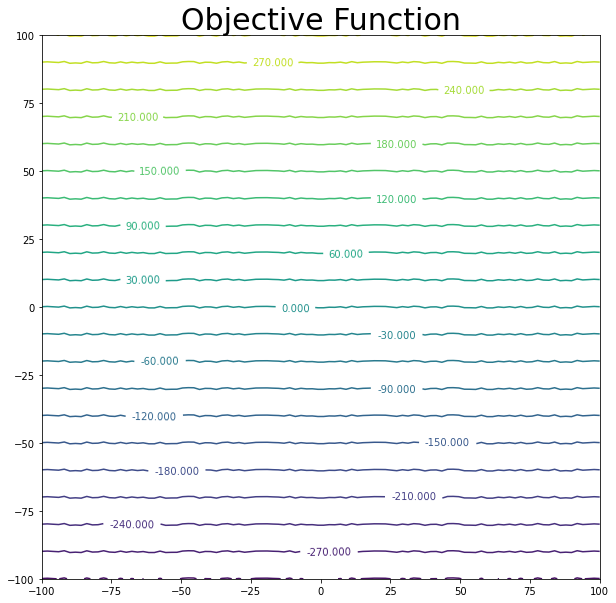

In [3]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

In [4]:
study = optuna.create_study()
study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=10)

[I 2021-03-03 11:30:49,894] A new study created in memory with name: no-name-f3760d6c-8744-4e32-adce-0936b29eccee
[I 2021-03-03 11:30:49,901] A new study created in memory with name: no-name-90759182-d397-442d-b92c-2c41bc3b4bbd
[I 2021-03-03 11:30:49,915] Trial 0 finished with value: -111.9108411193164 and parameters: {'x': -24.866188770331348, 'y': 37.67373869401064}. Best is trial 0 with value: -111.9108411193164.
[I 2021-03-03 11:30:50,021] Trial 1 finished with value: 131.34230824249653 and parameters: {'x': -0.1819728685568533, 'y': -44.537905265214974}. Best is trial 0 with value: -111.9108411193164.
[I 2021-03-03 11:30:50,032] Trial 2 finished with value: 35.04370657104085 and parameters: {'x': -10.174238435106908, 'y': -12.515716096200917}. Best is trial 0 with value: -111.9108411193164.
[I 2021-03-03 11:30:50,041] Trial 3 finished with value: 58.15746942754229 and parameters: {'x': -6.93073558121861, 'y': -19.276888163706957}. Best is trial 0 with value: -111.9108411193164.
[I

### Extract the Best Parameters

In [5]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: -24.866188770331348, f: 113.55782121889443
Found y: 37.67373869401064, f: 113.55782121889443


In [6]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is CmaEsSampler


# Data Generator

Code runs 100 trials to obtain the actual max value of the objective function. This will be used in the next code to calculate the accuracy which is the (calculated max value / actual max value). **This code only needs to be executed if the objective function is changed.**

In [48]:
max_ = []
for i in range(10): #How many iterations per datapoint 
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
    study.optimize(objective, n_trials=100)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    max_.append(func(found_x, found_y))
max_value = np.max(max_)
    

[I 2021-03-03 12:02:33,493] A new study created in memory with name: no-name-0e60acc9-4ea3-4644-b693-ee7fa3adad3e
[I 2021-03-03 12:02:33,500] A new study created in memory with name: no-name-f75e5df9-51cc-4340-b84f-5e60ee893d49
[I 2021-03-03 12:02:33,508] Trial 0 finished with value: 252.91367894401407 and parameters: {'x': -42.20461356251746, 'y': -83.88203130386327}. Best is trial 0 with value: 252.91367894401407.
[I 2021-03-03 12:02:33,516] Trial 1 finished with value: 75.30291131727255 and parameters: {'x': -13.406080154983712, 'y': -24.579923875451748}. Best is trial 1 with value: 75.30291131727255.
[I 2021-03-03 12:02:33,527] Trial 2 finished with value: -75.87284149517562 and parameters: {'x': -18.612773245532853, 'y': 25.806835256149423}. Best is trial 2 with value: -75.87284149517562.
[I 2021-03-03 12:02:33,545] Trial 3 finished with value: 125.36418942149203 and parameters: {'x': 19.74104667029483, 'y': -41.56046133171191}. Best is trial 2 with value: -75.87284149517562.
[I 2

[I 2021-03-03 12:02:34,116] Trial 39 finished with value: -272.2066857631486 and parameters: {'x': 4.088101086186724, 'y': 90.56224492937267}. Best is trial 26 with value: -296.3611588327865.
[I 2021-03-03 12:02:34,133] Trial 40 finished with value: -289.48578376890015 and parameters: {'x': -5.926424414049739, 'y': 96.8804725977059}. Best is trial 26 with value: -296.3611588327865.
[I 2021-03-03 12:02:34,145] Trial 41 finished with value: -160.3686049852291 and parameters: {'x': -4.596671488651685, 'y': 52.707339954886834}. Best is trial 26 with value: -296.3611588327865.
[I 2021-03-03 12:02:34,167] Trial 42 finished with value: -232.15436062523713 and parameters: {'x': 14.862103253712073, 'y': 76.5410405770624}. Best is trial 26 with value: -296.3611588327865.
[I 2021-03-03 12:02:34,178] Trial 43 finished with value: -293.2391063400774 and parameters: {'x': -2.090432705661433, 'y': 97.97476150069492}. Best is trial 26 with value: -296.3611588327865.
[I 2021-03-03 12:02:34,190] Trial 4

[I 2021-03-03 12:02:34,857] Trial 79 finished with value: -294.26221323675503 and parameters: {'x': -14.319279738492584, 'y': 99.03104364558314}. Best is trial 57 with value: -302.39529506488907.
[I 2021-03-03 12:02:34,871] Trial 80 finished with value: -287.5378697059252 and parameters: {'x': -17.50734945753284, 'y': 95.72356862607222}. Best is trial 57 with value: -302.39529506488907.
[I 2021-03-03 12:02:34,891] Trial 81 finished with value: -267.09054702832447 and parameters: {'x': 7.196930907012426, 'y': 88.44406329184044}. Best is trial 57 with value: -302.39529506488907.
[I 2021-03-03 12:02:34,919] Trial 82 finished with value: -273.58572943797896 and parameters: {'x': -39.83920459262043, 'y': 91.72420949622928}. Best is trial 57 with value: -302.39529506488907.
[I 2021-03-03 12:02:34,936] Trial 83 finished with value: -289.1349346751777 and parameters: {'x': -14.578676783049962, 'y': 96.91158579854307}. Best is trial 57 with value: -302.39529506488907.
[I 2021-03-03 12:02:34,954

Found x: -28.929866048972503, (x - 2)^2: 300.7870503368203
Found y: 99.94363908328161, (x - 2)^2: 300.7870503368203


[I 2021-03-03 12:02:35,517] Trial 9 finished with value: -273.70546061612635 and parameters: {'x': 7.93356834409507, 'y': 91.72956308049878}. Best is trial 9 with value: -273.70546061612635.
[I 2021-03-03 12:02:35,546] Trial 10 finished with value: -134.8031003382677 and parameters: {'x': -69.1084724321089, 'y': 44.78134602561142}. Best is trial 9 with value: -273.70546061612635.
[I 2021-03-03 12:02:35,563] Trial 11 finished with value: -272.0235096520502 and parameters: {'x': -47.11057666183034, 'y': 90.62618732354295}. Best is trial 9 with value: -273.70546061612635.
[I 2021-03-03 12:02:35,580] Trial 12 finished with value: -41.52804502984485 and parameters: {'x': 5.828927833506919, 'y': 13.811085586753457}. Best is trial 9 with value: -273.70546061612635.
[I 2021-03-03 12:02:35,615] Trial 13 finished with value: -293.60191426184025 and parameters: {'x': -44.422261167212454, 'y': 97.33991313725855}. Best is trial 13 with value: -293.60191426184025.
[I 2021-03-03 12:02:35,639] Trial 1

[I 2021-03-03 12:02:36,287] Trial 49 finished with value: -245.19060867951245 and parameters: {'x': 22.54117500930591, 'y': 82.2989160416534}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:36,305] Trial 50 finished with value: -243.33251762881537 and parameters: {'x': 25.874674119821155, 'y': 80.78075060220846}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:36,322] Trial 51 finished with value: -229.74697947992814 and parameters: {'x': 63.284264782087035, 'y': 76.11944452629147}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:36,337] Trial 52 finished with value: -217.9320370783522 and parameters: {'x': 24.07984637957092, 'y': 72.11219957397493}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:36,353] Trial 53 finished with value: -227.07929559650762 and parameters: {'x': 33.36517995324391, 'y': 75.10507326785455}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:36,364] Trial 5

[I 2021-03-03 12:02:37,037] Trial 89 finished with value: -276.9243904483285 and parameters: {'x': 5.243805911079413, 'y': 91.96426956784376}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:37,054] Trial 90 finished with value: -286.44658776230784 and parameters: {'x': 24.56557442723672, 'y': 95.88258574723572}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:37,084] Trial 91 finished with value: -295.72648710695546 and parameters: {'x': 19.218781757291005, 'y': 98.99099031890896}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:37,100] Trial 92 finished with value: -278.5547960542724 and parameters: {'x': 41.860057877921605, 'y': 92.7952126090896}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:37,122] Trial 93 finished with value: -276.5911824133356 and parameters: {'x': -24.351056645970264, 'y': 92.72140378044108}. Best is trial 34 with value: -296.9722093235213.
[I 2021-03-03 12:02:37,129] Trial 9

Found x: -8.72895897757476, (x - 2)^2: 295.0813588251601
Found y: 98.12214826508298, (x - 2)^2: 295.0813588251601


[I 2021-03-03 12:02:37,436] Trial 11 finished with value: -119.63609141891114 and parameters: {'x': -30.875585069813923, 'y': 39.961098644212406}. Best is trial 7 with value: -243.53077548366244.
[I 2021-03-03 12:02:37,453] Trial 12 finished with value: -251.04918377362245 and parameters: {'x': -27.851871699320466, 'y': 84.23853492498199}. Best is trial 12 with value: -251.04918377362245.
[I 2021-03-03 12:02:37,483] Trial 13 finished with value: -27.38360127046722 and parameters: {'x': 22.70586776225916, 'y': 9.389829386515672}. Best is trial 12 with value: -251.04918377362245.
[I 2021-03-03 12:02:37,500] Trial 14 finished with value: 74.57258102649887 and parameters: {'x': -36.7562266156088, 'y': -24.519238381145215}. Best is trial 12 with value: -251.04918377362245.
[I 2021-03-03 12:02:37,515] Trial 15 finished with value: -241.47972693000904 and parameters: {'x': -17.416431152342533, 'y': 79.90468576060357}. Best is trial 12 with value: -251.04918377362245.
[I 2021-03-03 12:02:37,53

[I 2021-03-03 12:02:38,151] Trial 51 finished with value: -161.37516290272018 and parameters: {'x': 62.05893632479407, 'y': 54.04140282931915}. Best is trial 43 with value: -291.79974610053426.
[I 2021-03-03 12:02:38,182] Trial 52 finished with value: -241.2382619616488 and parameters: {'x': -40.645895126833864, 'y': 81.05839493506062}. Best is trial 43 with value: -291.79974610053426.
[I 2021-03-03 12:02:38,190] Trial 53 finished with value: -274.4525725865529 and parameters: {'x': -23.60883290997858, 'y': 92.45135589370783}. Best is trial 43 with value: -291.79974610053426.
[I 2021-03-03 12:02:38,208] Trial 54 finished with value: -265.32931915765465 and parameters: {'x': 18.2691484413971, 'y': 88.33095455067654}. Best is trial 43 with value: -291.79974610053426.
[I 2021-03-03 12:02:38,227] Trial 55 finished with value: -274.39261052511137 and parameters: {'x': -83.75343765080594, 'y': 91.510046012761}. Best is trial 43 with value: -291.79974610053426.
[I 2021-03-03 12:02:38,236] Tri

[I 2021-03-03 12:02:38,855] Trial 91 finished with value: -275.0284356762121 and parameters: {'x': -49.24888416952076, 'y': 91.13818050927858}. Best is trial 80 with value: -294.08424258199585.
[I 2021-03-03 12:02:38,875] Trial 92 finished with value: -285.82815867736923 and parameters: {'x': -37.71897664956488, 'y': 94.6369689612461}. Best is trial 80 with value: -294.08424258199585.
[I 2021-03-03 12:02:38,885] Trial 93 finished with value: -291.66716221624364 and parameters: {'x': -69.3499355096171, 'y': 97.10613551233979}. Best is trial 80 with value: -294.08424258199585.
[I 2021-03-03 12:02:38,903] Trial 94 finished with value: -289.5450880379057 and parameters: {'x': -45.64543925997213, 'y': 96.6852676459612}. Best is trial 80 with value: -294.08424258199585.
[I 2021-03-03 12:02:38,921] Trial 95 finished with value: -288.6014253365085 and parameters: {'x': -52.578022027735734, 'y': 96.06621298064772}. Best is trial 80 with value: -294.08424258199585.
[I 2021-03-03 12:02:38,937] Tr

Found x: -56.22112243867997, (x - 2)^2: 296.265788441467
Found y: 98.63397920944523, (x - 2)^2: 296.265788441467


[I 2021-03-03 12:02:39,231] Trial 10 finished with value: -83.28480365902244 and parameters: {'x': 0.1321437881228622, 'y': 28.51975770998812}. Best is trial 5 with value: -201.73402175077499.
[I 2021-03-03 12:02:39,247] Trial 11 finished with value: 140.98953960410645 and parameters: {'x': 31.79743653599186, 'y': -47.6541124102102}. Best is trial 5 with value: -201.73402175077499.
[I 2021-03-03 12:02:39,257] Trial 12 finished with value: 163.5428737292318 and parameters: {'x': -25.452971015343145, 'y': -54.61292472570314}. Best is trial 5 with value: -201.73402175077499.
[I 2021-03-03 12:02:39,303] Trial 13 finished with value: -20.520825732742672 and parameters: {'x': 20.57715830366964, 'y': 6.1534147767785825}. Best is trial 5 with value: -201.73402175077499.
[I 2021-03-03 12:02:39,326] Trial 14 finished with value: -48.58331646600052 and parameters: {'x': -26.382854633061342, 'y': 17.291640240379014}. Best is trial 5 with value: -201.73402175077499.
[I 2021-03-03 12:02:39,353] Tria

[I 2021-03-03 12:02:40,082] Trial 50 finished with value: -155.7239747377106 and parameters: {'x': 30.84660742861599, 'y': 52.42773024447335}. Best is trial 43 with value: -294.8660561289148.
[I 2021-03-03 12:02:40,100] Trial 51 finished with value: -208.49788580076074 and parameters: {'x': 8.944237217759621, 'y': 69.8890184009029}. Best is trial 43 with value: -294.8660561289148.
[I 2021-03-03 12:02:40,127] Trial 52 finished with value: -274.5340230329299 and parameters: {'x': 61.65621726812236, 'y': 91.792696226529}. Best is trial 43 with value: -294.8660561289148.
[I 2021-03-03 12:02:40,147] Trial 53 finished with value: -199.6736892825422 and parameters: {'x': 64.54926568235041, 'y': 66.26019729197313}. Best is trial 43 with value: -294.8660561289148.
[I 2021-03-03 12:02:40,157] Trial 54 finished with value: -76.09425483521105 and parameters: {'x': 74.17371850757206, 'y': 25.056809209877855}. Best is trial 43 with value: -294.8660561289148.
[I 2021-03-03 12:02:40,186] Trial 55 fini

[I 2021-03-03 12:02:40,945] Trial 90 finished with value: -275.21448379580653 and parameters: {'x': -41.261819403446836, 'y': 92.41968252544643}. Best is trial 85 with value: -295.58167416691015.
[I 2021-03-03 12:02:40,975] Trial 91 finished with value: -285.4152203305255 and parameters: {'x': -13.112628031315083, 'y': 94.14002882159484}. Best is trial 85 with value: -295.58167416691015.
[I 2021-03-03 12:02:40,991] Trial 92 finished with value: -231.60115051037948 and parameters: {'x': -12.067657766256808, 'y': 76.79392037100104}. Best is trial 85 with value: -295.58167416691015.
[I 2021-03-03 12:02:41,009] Trial 93 finished with value: -244.85259894147828 and parameters: {'x': -24.999775050590287, 'y': 82.29149978389728}. Best is trial 85 with value: -295.58167416691015.
[I 2021-03-03 12:02:41,026] Trial 94 finished with value: -251.35978956490396 and parameters: {'x': 35.54863714624054, 'y': 84.35840663476895}. Best is trial 85 with value: -295.58167416691015.
[I 2021-03-03 12:02:41,

Found x: 26.89476131563653, (x - 2)^2: 297.36495788636535
Found y: 98.89155931158875, (x - 2)^2: 297.36495788636535


[I 2021-03-03 12:02:41,338] Trial 8 finished with value: -45.838649371363395 and parameters: {'x': -89.40850168978291, 'y': 15.509743450243883}. Best is trial 7 with value: -136.8079577330546.
[I 2021-03-03 12:02:41,356] Trial 9 finished with value: 3.4991833191733677 and parameters: {'x': -9.401699575481913, 'y': -2.06105267712573}. Best is trial 7 with value: -136.8079577330546.
[I 2021-03-03 12:02:41,374] Trial 10 finished with value: -165.1652769521971 and parameters: {'x': -74.83737273768621, 'y': 55.348485549336985}. Best is trial 10 with value: -165.1652769521971.
[I 2021-03-03 12:02:41,401] Trial 11 finished with value: -188.6610674803439 and parameters: {'x': -71.77842970282883, 'y': 62.97881373911504}. Best is trial 11 with value: -188.6610674803439.
[I 2021-03-03 12:02:41,420] Trial 12 finished with value: -283.74779367977004 and parameters: {'x': -34.42551010030928, 'y': 94.65752137120472}. Best is trial 12 with value: -283.74779367977004.
[I 2021-03-03 12:02:41,443] Trial 

[I 2021-03-03 12:02:42,176] Trial 48 finished with value: -19.18623705328593 and parameters: {'x': 95.00063708781576, 'y': 5.665033159561688}. Best is trial 42 with value: -299.7703280666081.
[I 2021-03-03 12:02:42,208] Trial 49 finished with value: -261.03593994951785 and parameters: {'x': 87.19557589416786, 'y': 86.83400741024067}. Best is trial 42 with value: -299.7703280666081.
[I 2021-03-03 12:02:42,224] Trial 50 finished with value: -294.3843355686242 and parameters: {'x': -12.313710827211565, 'y': 98.20978264171951}. Best is trial 42 with value: -299.7703280666081.
[I 2021-03-03 12:02:42,241] Trial 51 finished with value: -194.75436222588536 and parameters: {'x': 96.06540930546505, 'y': 64.47806810525489}. Best is trial 42 with value: -299.7703280666081.
[I 2021-03-03 12:02:42,260] Trial 52 finished with value: -159.7888106155589 and parameters: {'x': 44.76235812784477, 'y': 53.167444058929085}. Best is trial 42 with value: -299.7703280666081.
[I 2021-03-03 12:02:42,288] Trial 5

[I 2021-03-03 12:02:43,009] Trial 88 finished with value: -270.6158743183831 and parameters: {'x': -25.899978715441474, 'y': 91.1847090629834}. Best is trial 71 with value: -300.3431920714347.
[I 2021-03-03 12:02:43,027] Trial 89 finished with value: -270.96117495859625 and parameters: {'x': -18.35214283649485, 'y': 90.06594923924966}. Best is trial 71 with value: -300.3431920714347.
[I 2021-03-03 12:02:43,045] Trial 90 finished with value: -281.45623235950376 and parameters: {'x': -37.035188764451114, 'y': 93.73806848720177}. Best is trial 71 with value: -300.3431920714347.
[I 2021-03-03 12:02:43,073] Trial 91 finished with value: -292.732400557268 and parameters: {'x': 15.670916283677844, 'y': 97.30212426656269}. Best is trial 71 with value: -300.3431920714347.
[I 2021-03-03 12:02:43,090] Trial 92 finished with value: -269.3408982463905 and parameters: {'x': -10.586605474961068, 'y': 90.40011266508513}. Best is trial 71 with value: -300.3431920714347.
[I 2021-03-03 12:02:43,106] Tria

Found x: -75.07185055148037, (x - 2)^2: 298.6325979773835
Found y: 99.62164355614415, (x - 2)^2: 298.6325979773835


[I 2021-03-03 12:02:43,455] Trial 10 finished with value: 90.7299324876274 and parameters: {'x': 0.051445350899211206, 'y': -30.023921687125295}. Best is trial 2 with value: -35.59135634021611.
[I 2021-03-03 12:02:43,474] Trial 11 finished with value: 9.251355831711294 and parameters: {'x': 54.98089494171537, 'y': -3.7352909121971116}. Best is trial 2 with value: -35.59135634021611.
[I 2021-03-03 12:02:43,501] Trial 12 finished with value: -11.684233482109292 and parameters: {'x': -0.015700049283132955, 'y': 3.685763609255258}. Best is trial 2 with value: -35.59135634021611.
[I 2021-03-03 12:02:43,531] Trial 13 finished with value: 40.39248665920358 and parameters: {'x': -10.91515158092551, 'y': -13.761561549617575}. Best is trial 2 with value: -35.59135634021611.
[I 2021-03-03 12:02:43,542] Trial 14 finished with value: -14.439650609157635 and parameters: {'x': 27.754465327621496, 'y': 5.440787230530881}. Best is trial 2 with value: -35.59135634021611.
[I 2021-03-03 12:02:43,559] Tria

[I 2021-03-03 12:02:44,249] Trial 50 finished with value: -219.559149084834 and parameters: {'x': -27.318779157109617, 'y': 73.44278163689992}. Best is trial 34 with value: -284.15523822985375.
[I 2021-03-03 12:02:44,266] Trial 51 finished with value: 46.29193670034293 and parameters: {'x': 70.16416124291113, 'y': -14.843373088308738}. Best is trial 34 with value: -284.15523822985375.
[I 2021-03-03 12:02:44,284] Trial 52 finished with value: -230.32328705247292 and parameters: {'x': 18.704906555633666, 'y': 76.79268711518611}. Best is trial 34 with value: -284.15523822985375.
[I 2021-03-03 12:02:44,299] Trial 53 finished with value: -268.7479176241212 and parameters: {'x': -22.66696758870917, 'y': 90.33696768321673}. Best is trial 34 with value: -284.15523822985375.
[I 2021-03-03 12:02:44,318] Trial 54 finished with value: -206.23340294698906 and parameters: {'x': -42.859375217600466, 'y': 68.31664015499565}. Best is trial 34 with value: -284.15523822985375.
[I 2021-03-03 12:02:44,336]

[I 2021-03-03 12:02:45,086] Trial 90 finished with value: -294.19908888284135 and parameters: {'x': -51.38584452093744, 'y': 96.9286346083674}. Best is trial 81 with value: -298.76969943556855.
[I 2021-03-03 12:02:45,105] Trial 91 finished with value: -260.8410454445484 and parameters: {'x': -46.985641552350096, 'y': 87.02685378154248}. Best is trial 81 with value: -298.76969943556855.
[I 2021-03-03 12:02:45,126] Trial 92 finished with value: -253.31857134961317 and parameters: {'x': -72.29998514561385, 'y': 85.21686758751427}. Best is trial 81 with value: -298.76969943556855.
[I 2021-03-03 12:02:45,142] Trial 93 finished with value: -292.40084002428745 and parameters: {'x': -54.52108966979841, 'y': 98.01512585524966}. Best is trial 81 with value: -298.76969943556855.
[I 2021-03-03 12:02:45,160] Trial 94 finished with value: -288.3062418950253 and parameters: {'x': -90.8057193794093, 'y': 95.78345477801702}. Best is trial 81 with value: -298.76969943556855.
[I 2021-03-03 12:02:45,168] 

Found x: -32.40465873256119, (x - 2)^2: 298.26154699942737
Found y: 99.18847985419423, (x - 2)^2: 298.26154699942737


[I 2021-03-03 12:02:45,494] Trial 11 finished with value: -83.75908364679887 and parameters: {'x': -13.637816768913673, 'y': 28.23053151657218}. Best is trial 7 with value: -273.95350447713304.
[I 2021-03-03 12:02:45,502] Trial 12 finished with value: -103.04810026050804 and parameters: {'x': 76.03986097563363, 'y': 34.09600991409992}. Best is trial 7 with value: -273.95350447713304.
[I 2021-03-03 12:02:45,531] Trial 13 finished with value: -278.2532445184204 and parameters: {'x': 40.0985555438364, 'y': 93.1350936182125}. Best is trial 13 with value: -278.2532445184204.
[I 2021-03-03 12:02:45,547] Trial 14 finished with value: -185.88138204614313 and parameters: {'x': 66.34635435171835, 'y': 62.43047639917097}. Best is trial 13 with value: -278.2532445184204.
[I 2021-03-03 12:02:45,564] Trial 15 finished with value: -83.31311764717739 and parameters: {'x': 16.650405432263934, 'y': 27.415500942786863}. Best is trial 13 with value: -278.2532445184204.
[I 2021-03-03 12:02:45,584] Trial 16

[I 2021-03-03 12:02:46,272] Trial 51 finished with value: -257.2086782891696 and parameters: {'x': 72.23699286882353, 'y': 86.11205032154295}. Best is trial 18 with value: -293.2513906894264.
[I 2021-03-03 12:02:46,288] Trial 52 finished with value: -268.33795707051456 and parameters: {'x': 71.18110514333306, 'y': 89.09270669547521}. Best is trial 18 with value: -293.2513906894264.
[I 2021-03-03 12:02:46,306] Trial 53 finished with value: -236.4655670173314 and parameters: {'x': 49.72688431052221, 'y': 78.74172839873498}. Best is trial 18 with value: -293.2513906894264.
[I 2021-03-03 12:02:46,333] Trial 54 finished with value: -211.13303462642807 and parameters: {'x': 62.978110629781774, 'y': 70.61335622261467}. Best is trial 18 with value: -293.2513906894264.
[I 2021-03-03 12:02:46,352] Trial 55 finished with value: -258.39312221489087 and parameters: {'x': 56.76240258218276, 'y': 86.80864735287862}. Best is trial 18 with value: -293.2513906894264.
[I 2021-03-03 12:02:46,368] Trial 56

[I 2021-03-03 12:02:47,088] Trial 91 finished with value: -255.47593361739797 and parameters: {'x': 73.54009636496319, 'y': 85.5897242231368}. Best is trial 78 with value: -296.6442184401507.
[I 2021-03-03 12:02:47,105] Trial 92 finished with value: -288.7802048298442 and parameters: {'x': 75.95839580929133, 'y': 95.11193522371555}. Best is trial 78 with value: -296.6442184401507.
[I 2021-03-03 12:02:47,123] Trial 93 finished with value: -277.66684825575356 and parameters: {'x': 82.3237287496927, 'y': 92.65188665843098}. Best is trial 78 with value: -296.6442184401507.
[I 2021-03-03 12:02:47,141] Trial 94 finished with value: -259.00237771974486 and parameters: {'x': 84.56116204874817, 'y': 85.81618148542671}. Best is trial 78 with value: -296.6442184401507.
[I 2021-03-03 12:02:47,169] Trial 95 finished with value: -267.9067920347788 and parameters: {'x': 76.17536769739203, 'y': 89.12623230895159}. Best is trial 78 with value: -296.6442184401507.
[I 2021-03-03 12:02:47,187] Trial 96 fi

Found x: 81.91266478566766, (x - 2)^2: 296.4718061511869
Found y: 99.05291196476153, (x - 2)^2: 296.4718061511869


[I 2021-03-03 12:02:47,442] Trial 8 finished with value: -107.78769238599781 and parameters: {'x': 30.184298192839822, 'y': 36.25505063668563}. Best is trial 4 with value: -224.65213714514746.
[I 2021-03-03 12:02:47,452] Trial 9 finished with value: 11.610821603203323 and parameters: {'x': -21.9393917364256, 'y': -4.404596652996105}. Best is trial 4 with value: -224.65213714514746.
[I 2021-03-03 12:02:47,483] Trial 10 finished with value: -55.61781175303944 and parameters: {'x': -29.09720837779048, 'y': 18.78231611808492}. Best is trial 4 with value: -224.65213714514746.
[I 2021-03-03 12:02:47,502] Trial 11 finished with value: -205.10579528282958 and parameters: {'x': 6.313341619689854, 'y': 68.74224706702377}. Best is trial 4 with value: -224.65213714514746.
[I 2021-03-03 12:02:47,520] Trial 12 finished with value: -269.256128297373 and parameters: {'x': 44.17175179487416, 'y': 89.62047266899808}. Best is trial 12 with value: -269.256128297373.
[I 2021-03-03 12:02:47,543] Trial 13 fi

[I 2021-03-03 12:02:48,190] Trial 48 finished with value: -221.80208946970822 and parameters: {'x': 51.80409837059198, 'y': 73.46540125029853}. Best is trial 23 with value: -298.1341510457292.
[I 2021-03-03 12:02:48,217] Trial 49 finished with value: -187.05157742202422 and parameters: {'x': 44.51409026080381, 'y': 62.56050555255629}. Best is trial 23 with value: -298.1341510457292.
[I 2021-03-03 12:02:48,235] Trial 50 finished with value: -281.6537006652105 and parameters: {'x': 19.678031295915897, 'y': 93.98769273775828}. Best is trial 23 with value: -298.1341510457292.
[I 2021-03-03 12:02:48,252] Trial 51 finished with value: -160.73412119146448 and parameters: {'x': 35.20789284876796, 'y': 52.74740461423082}. Best is trial 23 with value: -298.1341510457292.
[I 2021-03-03 12:02:48,268] Trial 52 finished with value: -265.89762516095396 and parameters: {'x': 64.14729807168011, 'y': 89.35375257580856}. Best is trial 23 with value: -298.1341510457292.
[I 2021-03-03 12:02:48,287] Trial 5

[I 2021-03-03 12:02:49,022] Trial 88 finished with value: -283.3514617879675 and parameters: {'x': 13.85395185439755, 'y': 94.42150494565986}. Best is trial 80 with value: -301.18484885697694.
[I 2021-03-03 12:02:49,039] Trial 89 finished with value: -268.04162079889136 and parameters: {'x': 24.577220992996175, 'y': 88.8889239334894}. Best is trial 80 with value: -301.18484885697694.
[I 2021-03-03 12:02:49,056] Trial 90 finished with value: -266.1617381472445 and parameters: {'x': 33.94831737175348, 'y': 87.76279058581754}. Best is trial 80 with value: -301.18484885697694.
[I 2021-03-03 12:02:49,088] Trial 91 finished with value: -297.9435265807571 and parameters: {'x': 26.114791531741044, 'y': 99.68382822013527}. Best is trial 80 with value: -301.18484885697694.
[I 2021-03-03 12:02:49,105] Trial 92 finished with value: -293.3113241518757 and parameters: {'x': 33.76345414922936, 'y': 98.22040837364497}. Best is trial 80 with value: -301.18484885697694.
[I 2021-03-03 12:02:49,131] Trial

Found x: 27.471116809978724, (x - 2)^2: 299.55660021396375
Found y: 99.6425967136932, (x - 2)^2: 299.55660021396375


[I 2021-03-03 12:02:49,501] Trial 10 finished with value: -141.06982380401823 and parameters: {'x': 26.688443214433747, 'y': 46.655155584576434}. Best is trial 9 with value: -182.53039083727728.
[I 2021-03-03 12:02:49,510] Trial 11 finished with value: -226.35748057448495 and parameters: {'x': 1.3415620889498392, 'y': 74.5461646257271}. Best is trial 11 with value: -226.35748057448495.
[I 2021-03-03 12:02:49,529] Trial 12 finished with value: -92.15331958917247 and parameters: {'x': 22.76161573260561, 'y': 30.128217512617635}. Best is trial 11 with value: -226.35748057448495.
[I 2021-03-03 12:02:49,549] Trial 13 finished with value: -132.97782698892084 and parameters: {'x': 7.948876583628474, 'y': 44.0988687945852}. Best is trial 11 with value: -226.35748057448495.
[I 2021-03-03 12:02:49,580] Trial 14 finished with value: -194.82433012301874 and parameters: {'x': 38.16889253426355, 'y': 65.03920345639355}. Best is trial 11 with value: -226.35748057448495.
[I 2021-03-03 12:02:49,597] Tr

[I 2021-03-03 12:02:50,288] Trial 50 finished with value: -286.19205734824084 and parameters: {'x': 62.50493838147205, 'y': 95.84543503624738}. Best is trial 50 with value: -286.19205734824084.
[I 2021-03-03 12:02:50,306] Trial 51 finished with value: -224.36675636098383 and parameters: {'x': 48.541548131428655, 'y': 74.4639949523397}. Best is trial 50 with value: -286.19205734824084.
[I 2021-03-03 12:02:50,322] Trial 52 finished with value: -212.7469745138562 and parameters: {'x': 55.80808667176922, 'y': 72.01337042307122}. Best is trial 50 with value: -286.19205734824084.
[I 2021-03-03 12:02:50,339] Trial 53 finished with value: -279.64487900113335 and parameters: {'x': 75.66375216711906, 'y': 93.74823187425885}. Best is trial 50 with value: -286.19205734824084.
[I 2021-03-03 12:02:50,365] Trial 54 finished with value: -248.5083013301128 and parameters: {'x': 79.8949985068727, 'y': 83.18069980947774}. Best is trial 50 with value: -286.19205734824084.
[I 2021-03-03 12:02:50,398] Trial

[I 2021-03-03 12:02:51,147] Trial 90 finished with value: -290.64239907423155 and parameters: {'x': 70.52848045749367, 'y': 96.45705418191001}. Best is trial 82 with value: -300.70597933449926.
[I 2021-03-03 12:02:51,170] Trial 91 finished with value: -297.23329101930017 and parameters: {'x': 79.79167809583905, 'y': 98.69056557694599}. Best is trial 82 with value: -300.70597933449926.
[I 2021-03-03 12:02:51,187] Trial 92 finished with value: -295.90419188585673 and parameters: {'x': 59.749409930165285, 'y': 98.03648641311923}. Best is trial 82 with value: -300.70597933449926.
[I 2021-03-03 12:02:51,216] Trial 93 finished with value: -283.37285728487154 and parameters: {'x': 62.06033022222002, 'y': 94.39542459752654}. Best is trial 82 with value: -300.70597933449926.
[I 2021-03-03 12:02:51,233] Trial 94 finished with value: -293.5820828515666 and parameters: {'x': 76.81578737585302, 'y': 97.43677085646685}. Best is trial 82 with value: -300.70597933449926.
[I 2021-03-03 12:02:51,252] Tr

Found x: 85.72683291431113, (x - 2)^2: 299.163995378684
Found y: 99.98340447458669, (x - 2)^2: 299.163995378684


[I 2021-03-03 12:02:51,555] Trial 7 finished with value: -111.39100437885101 and parameters: {'x': -20.317394310534322, 'y': 36.95006999009319}. Best is trial 0 with value: -168.49284728630928.
[I 2021-03-03 12:02:51,573] Trial 8 finished with value: 4.9492344434207745 and parameters: {'x': 23.3654658142391, 'y': -1.5430345127513965}. Best is trial 0 with value: -168.49284728630928.
[I 2021-03-03 12:02:51,589] Trial 9 finished with value: 9.745332644223526 and parameters: {'x': -24.929780809113137, 'y': -2.8390329214507277}. Best is trial 0 with value: -168.49284728630928.
[I 2021-03-03 12:02:51,617] Trial 10 finished with value: -42.728555724414186 and parameters: {'x': -21.805490926932965, 'y': 14.269463619422172}. Best is trial 0 with value: -168.49284728630928.
[I 2021-03-03 12:02:51,636] Trial 11 finished with value: -10.486753293283707 and parameters: {'x': 13.831422046712959, 'y': 2.8239458417505037}. Best is trial 0 with value: -168.49284728630928.
[I 2021-03-03 12:02:51,652] T

[I 2021-03-03 12:02:52,384] Trial 47 finished with value: -254.58736288384404 and parameters: {'x': -78.04770682996417, 'y': 85.05814988434031}. Best is trial 41 with value: -277.4506598706376.
[I 2021-03-03 12:02:52,402] Trial 48 finished with value: -190.83071298698746 and parameters: {'x': -92.18850536834928, 'y': 64.33100769179286}. Best is trial 41 with value: -277.4506598706376.
[I 2021-03-03 12:02:52,432] Trial 49 finished with value: -296.2552152829525 and parameters: {'x': -54.2970675398234, 'y': 98.80879421625295}. Best is trial 49 with value: -296.2552152829525.
[I 2021-03-03 12:02:52,451] Trial 50 finished with value: -298.9173515895932 and parameters: {'x': -94.55268551503681, 'y': 99.33589911083669}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:52,468] Trial 51 finished with value: -168.67860138698694 and parameters: {'x': -43.274287064111036, 'y': 55.720765615526005}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:52,499] Tri

[I 2021-03-03 12:02:53,294] Trial 87 finished with value: -298.56734867025926 and parameters: {'x': -44.6676183287998, 'y': 98.9589384080387}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:53,312] Trial 88 finished with value: -297.34338813730665 and parameters: {'x': -28.33497898192036, 'y': 98.75037706920641}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:53,327] Trial 89 finished with value: -277.00364069393845 and parameters: {'x': -35.19125524978152, 'y': 91.51772260057406}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:53,347] Trial 90 finished with value: -263.57199704617346 and parameters: {'x': -38.72598587098922, 'y': 87.5926418820539}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:53,378] Trial 91 finished with value: -294.03748079041713 and parameters: {'x': -49.573261739653155, 'y': 98.19819279021414}. Best is trial 50 with value: -298.9173515895932.
[I 2021-03-03 12:02:53,406] Tria

Found x: -34.00443020103172, (x - 2)^2: 300.12602666383566
Found y: 99.97736223547365, (x - 2)^2: 300.12602666383566


This code will generate the calculated max value for an optimization of 10 trials. It will divide that by the actual max value to find the accuracy. The mean_time is the average time taken to perform ONE trial. **Run this code everytime any setting of the optimizer is changed** 

In [71]:
accuracy = []
mean_time = []
for n in range(20): #Determines how many datapoints to generate 
    x = []
    y = []
    z = []
    itr_time = []
    for i in range(20): #How many iterations per datapoint 
        start = time.time()
        study = optuna.create_study()
        study = optuna.create_study(sampler=optuna.samplers.TPESampler())
        study.optimize(objective, n_trials=10)
        best_params = study.best_params
        found_x = best_params["x"]
        found_y = best_params["y"]
        print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
        print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
        x.append(found_x)
        y.append(found_y)
        z.append(func(found_x, found_y))
        end = time.time()
        timetaken = end - start
        itr_time.append(timetaken)
    mean_time.append(np.mean(itr_time)/10)
    acc = np.mean(z)/max_value
    accuracy.append(acc)

[I 2021-03-03 12:22:44,472] A new study created in memory with name: no-name-a8c40c54-80cf-49a4-beac-03d06bdc8b1d
[I 2021-03-03 12:22:44,480] A new study created in memory with name: no-name-6140ddaa-f592-40a3-9e8b-0e8921319f0a
[I 2021-03-03 12:22:44,484] Trial 0 finished with value: 287.47080619568646 and parameters: {'x': 75.92633850096095, 'y': -96.37579005963457}. Best is trial 0 with value: 287.47080619568646.
[I 2021-03-03 12:22:44,499] Trial 1 finished with value: -11.108625038183373 and parameters: {'x': 59.302548573518294, 'y': 4.2265772112024536}. Best is trial 1 with value: -11.108625038183373.
[I 2021-03-03 12:22:44,502] Trial 2 finished with value: -192.14990906443037 and parameters: {'x': 36.45740748693376, 'y': 64.42799091720073}. Best is trial 2 with value: -192.14990906443037.
[I 2021-03-03 12:22:44,505] Trial 3 finished with value: 4.309963283569509 and parameters: {'x': 8.395246895183277, 'y': -2.4856578269758245}. Best is trial 2 with value: -192.14990906443037.
[I 

Found x: -72.04828903795688, (x - 2)^2: 212.74079821993146
Found y: 70.62530970465647, (x - 2)^2: 212.74079821993146
Found x: -45.19949356265474, (x - 2)^2: 283.84556538769044
Found y: 94.34231716316799, (x - 2)^2: 283.84556538769044


[I 2021-03-03 12:22:44,768] A new study created in memory with name: no-name-f8a8046b-cba6-40c3-a024-e4a00557c88b
[I 2021-03-03 12:22:44,782] A new study created in memory with name: no-name-cd6ddaac-5620-46cd-b430-e5665cd65d22
[I 2021-03-03 12:22:44,811] Trial 0 finished with value: 151.6298132797117 and parameters: {'x': -14.897359272938758, 'y': -51.1177888557433}. Best is trial 0 with value: 151.6298132797117.
[I 2021-03-03 12:22:44,816] Trial 1 finished with value: 286.8354924230752 and parameters: {'x': -64.2956599253, 'y': -95.35395015398464}. Best is trial 0 with value: 151.6298132797117.
[I 2021-03-03 12:22:44,819] Trial 2 finished with value: -33.88313014403684 and parameters: {'x': 32.209398266655796, 'y': 11.683352373944714}. Best is trial 2 with value: -33.88313014403684.
[I 2021-03-03 12:22:44,824] Trial 3 finished with value: -106.21276450151669 and parameters: {'x': 84.09019827221397, 'y': 35.33425813838102}. Best is trial 3 with value: -106.21276450151669.
[I 2021-03-0

Found x: -69.55010028253136, (x - 2)^2: 229.95608717096218
Found y: 76.8994045027697, (x - 2)^2: 229.95608717096218
Found x: -97.46931974155318, (x - 2)^2: 247.0115725237328
Found y: 82.30653209171899, (x - 2)^2: 247.0115725237328


[I 2021-03-03 12:22:44,972] Trial 7 finished with value: -108.23427168269325 and parameters: {'x': 47.92626768278268, 'y': 35.49706095318987}. Best is trial 0 with value: -252.51809811945006.
[I 2021-03-03 12:22:44,980] Trial 8 finished with value: -182.4007930556344 and parameters: {'x': -21.858604262844096, 'y': 60.195318414834446}. Best is trial 0 with value: -252.51809811945006.
[I 2021-03-03 12:22:44,984] Trial 9 finished with value: 280.487713562211 and parameters: {'x': 62.12965557468107, 'y': -93.34410415198971}. Best is trial 0 with value: -252.51809811945006.
[I 2021-03-03 12:22:44,996] A new study created in memory with name: no-name-b95ce7aa-d170-44b6-a192-57177324cc2b
[I 2021-03-03 12:22:45,016] A new study created in memory with name: no-name-31086c1c-3163-42e0-899d-e3349e743f8d
[I 2021-03-03 12:22:45,026] Trial 0 finished with value: -208.63646239044795 and parameters: {'x': 89.23935220356404, 'y': 69.42628188129021}. Best is trial 0 with value: -208.63646239044795.
[I 2

Found x: -27.142926235236885, (x - 2)^2: 252.45196083828935
Found y: 83.81752404453223, (x - 2)^2: 252.45196083828935
Found x: -23.886649131082677, (x - 2)^2: 274.861778351537
Found y: 91.93101282967984, (x - 2)^2: 274.861778351537


[I 2021-03-03 12:22:45,203] Trial 8 finished with value: 178.46201927923636 and parameters: {'x': 54.40188619820907, 'y': -60.213420541836136}. Best is trial 4 with value: -212.75563098602993.
[I 2021-03-03 12:22:45,214] Trial 9 finished with value: -42.91592815600746 and parameters: {'x': -67.25006319867936, 'y': 15.089933940478645}. Best is trial 4 with value: -212.75563098602993.
[I 2021-03-03 12:22:45,217] A new study created in memory with name: no-name-73a8f8d3-1d12-464b-af93-68a33c8bac4b
[I 2021-03-03 12:22:45,231] A new study created in memory with name: no-name-5aa6f34b-ab7d-488b-8e62-0b780d562120
[I 2021-03-03 12:22:45,247] Trial 0 finished with value: -71.17499435267759 and parameters: {'x': -3.6669781276930706, 'y': 23.017103897508278}. Best is trial 0 with value: -71.17499435267759.
[I 2021-03-03 12:22:45,252] Trial 1 finished with value: 99.72795943579987 and parameters: {'x': 16.48366713817964, 'y': -34.33474063516893}. Best is trial 0 with value: -71.17499435267759.
[I 

Found x: -45.04041001922203, (x - 2)^2: 214.44980380849023
Found y: 71.72931692593522, (x - 2)^2: 214.44980380849023
Found x: -54.19597624292081, (x - 2)^2: 279.54853655080285
Found y: 93.12143493113899, (x - 2)^2: 279.54853655080285
Found x: -89.39789780139182, (x - 2)^2: 222.52710180325568
Found y: 74.25090727601057, (x - 2)^2: 222.52710180325568


[I 2021-03-03 12:22:45,424] A new study created in memory with name: no-name-3228fd62-bd1a-4a6a-86b4-b4e2fde80071
[I 2021-03-03 12:22:45,427] Trial 0 finished with value: -292.58520528551423 and parameters: {'x': -26.402090682827946, 'y': 98.34301519707032}. Best is trial 0 with value: -292.58520528551423.
[I 2021-03-03 12:22:45,435] Trial 1 finished with value: 205.62848999635364 and parameters: {'x': -26.229689790624562, 'y': -68.00946955880723}. Best is trial 0 with value: -292.58520528551423.
[I 2021-03-03 12:22:45,439] Trial 2 finished with value: 55.513151350866906 and parameters: {'x': -91.76606637000178, 'y': -19.00265225425268}. Best is trial 0 with value: -292.58520528551423.
[I 2021-03-03 12:22:45,443] Trial 3 finished with value: -75.0523556702882 and parameters: {'x': 49.12372913375992, 'y': 25.33941364112154}. Best is trial 0 with value: -292.58520528551423.
[I 2021-03-03 12:22:45,450] Trial 4 finished with value: -238.8669819145153 and parameters: {'x': 86.26825737436371

Found x: -26.402090682827946, (x - 2)^2: 294.67380010252225
Found y: 98.34301519707032, (x - 2)^2: 294.67380010252225
Found x: -32.38420499628903, (x - 2)^2: 247.4382059452296
Found y: 82.65511010366046, (x - 2)^2: 247.4382059452296


[I 2021-03-03 12:22:45,701] Trial 8 finished with value: 164.2996033480207 and parameters: {'x': -17.476589122466436, 'y': -54.93081940913957}. Best is trial 5 with value: -268.66686339069753.
[I 2021-03-03 12:22:45,717] Trial 9 finished with value: -91.06000395002816 and parameters: {'x': 12.047031775482054, 'y': 29.672017996896756}. Best is trial 5 with value: -268.66686339069753.
[I 2021-03-03 12:22:45,721] A new study created in memory with name: no-name-c8259214-593e-44c0-aca0-bee2a763b39a
[I 2021-03-03 12:22:45,729] A new study created in memory with name: no-name-2b75ef1f-a9d6-41f7-9a1d-88824de279b2
[I 2021-03-03 12:22:45,733] Trial 0 finished with value: 27.62817550561232 and parameters: {'x': -65.0393669211302, 'y': -8.987845677567961}. Best is trial 0 with value: 27.62817550561232.
[I 2021-03-03 12:22:45,749] Trial 1 finished with value: 245.94387291946555 and parameters: {'x': -4.3667886469478105, 'y': -81.41208569603462}. Best is trial 0 with value: 27.62817550561232.
[I 20

Found x: 68.47422786549643, (x - 2)^2: 269.98114004816813
Found y: 89.66229183853801, (x - 2)^2: 269.98114004816813
Found x: 89.72593690800147, (x - 2)^2: 174.38104015391042
Found y: 57.821650157173735, (x - 2)^2: 174.38104015391042


[I 2021-03-03 12:22:45,939] A new study created in memory with name: no-name-ddfb96c2-4495-4c94-9d71-debe32bc433d
[I 2021-03-03 12:22:45,946] A new study created in memory with name: no-name-7779e763-8028-4e7d-b98d-b2c368eab2bc
[I 2021-03-03 12:22:45,949] Trial 0 finished with value: -182.67968408785404 and parameters: {'x': 0.32779379594154534, 'y': 60.20949521800517}. Best is trial 0 with value: -182.67968408785404.
[I 2021-03-03 12:22:45,956] Trial 1 finished with value: 207.7928269260655 and parameters: {'x': -25.681423345965953, 'y': -68.63358892060228}. Best is trial 0 with value: -182.67968408785404.
[I 2021-03-03 12:22:45,972] Trial 2 finished with value: -221.54731450905658 and parameters: {'x': -5.5114575778314645, 'y': 74.51628095083643}. Best is trial 2 with value: -221.54731450905658.
[I 2021-03-03 12:22:45,978] Trial 3 finished with value: 252.05461874955262 and parameters: {'x': -80.49696684106883, 'y': -84.59224255403734}. Best is trial 2 with value: -221.54731450905658

Found x: -34.90218004774701, (x - 2)^2: 278.5434235020753
Found y: 93.0812316111919, (x - 2)^2: 278.5434235020753
Found x: -84.54439388974791, (x - 2)^2: 277.350221800212
Found y: 92.64679238523414, (x - 2)^2: 277.350221800212
Found x: 15.09406976419416, (x - 2)^2: 292.2741655725077
Found y: 97.09210275749979, (x - 2)^2: 292.2741655725077


[I 2021-03-03 12:22:46,146] Trial 3 finished with value: 21.776054492467885 and parameters: {'x': 26.06358192678759, 'y': -7.452124004871138}. Best is trial 3 with value: 21.776054492467885.
[I 2021-03-03 12:22:46,149] Trial 4 finished with value: 276.7337824856885 and parameters: {'x': -87.66946724454428, 'y': -91.78939493414651}. Best is trial 3 with value: 21.776054492467885.
[I 2021-03-03 12:22:46,165] Trial 5 finished with value: -193.03956916811555 and parameters: {'x': -40.73005058727701, 'y': 63.580470979764186}. Best is trial 5 with value: -193.03956916811555.
[I 2021-03-03 12:22:46,168] Trial 6 finished with value: -184.26291458288966 and parameters: {'x': 18.555178903287455, 'y': 61.23160859499413}. Best is trial 5 with value: -193.03956916811555.
[I 2021-03-03 12:22:46,172] Trial 7 finished with value: -263.84077394870724 and parameters: {'x': -36.21759631211165, 'y': 87.47376592208502}. Best is trial 7 with value: -263.84077394870724.
[I 2021-03-03 12:22:46,176] Trial 8 fi

Found x: -72.86765115582669, (x - 2)^2: 280.9772158087643
Found y: 93.52834522386127, (x - 2)^2: 280.9772158087643
Found x: 50.24269969465644, (x - 2)^2: 259.0469320699433
Found y: 86.68172723799375, (x - 2)^2: 259.0469320699433


[I 2021-03-03 12:22:46,404] A new study created in memory with name: no-name-04960453-4ee6-450a-897d-3e213a0399f8
[I 2021-03-03 12:22:46,420] A new study created in memory with name: no-name-673dac08-7245-4f0a-a23b-cdac749fc584
[I 2021-03-03 12:22:46,434] Trial 0 finished with value: 173.12187906769427 and parameters: {'x': -8.274354335194715, 'y': -57.071953124954725}. Best is trial 0 with value: 173.12187906769427.
[I 2021-03-03 12:22:46,437] Trial 1 finished with value: 196.7798553684952 and parameters: {'x': 50.062519332939644, 'y': -65.43794925904704}. Best is trial 0 with value: 173.12187906769427.
[I 2021-03-03 12:22:46,449] Trial 2 finished with value: 75.60317085062718 and parameters: {'x': -89.17702967850674, 'y': -24.644354373858505}. Best is trial 2 with value: 75.60317085062718.
[I 2021-03-03 12:22:46,453] Trial 3 finished with value: -146.68015128758995 and parameters: {'x': -26.410448882628373, 'y': 48.72549901042359}. Best is trial 3 with value: -146.68015128758995.
[I 

Found x: 33.670392492816546, (x - 2)^2: 128.14681578048018
Found y: 42.579801591010636, (x - 2)^2: 128.14681578048018
Found x: 38.19853954979436, (x - 2)^2: 283.54962696398417
Found y: 94.18653406842452, (x - 2)^2: 283.54962696398417


[I 2021-03-03 12:22:46,625] A new study created in memory with name: no-name-c3d3d2ad-2960-4d6d-a05a-675d3e8ca401
[I 2021-03-03 12:22:46,641] A new study created in memory with name: no-name-d17d15fc-59e7-47a8-9ed6-2bb7dc47571f
[I 2021-03-03 12:22:46,646] Trial 0 finished with value: -177.0784033902749 and parameters: {'x': 13.549830951423743, 'y': 58.24690421071887}. Best is trial 0 with value: -177.0784033902749.
[I 2021-03-03 12:22:46,667] Trial 1 finished with value: 120.37992432638924 and parameters: {'x': 1.1285409515096063, 'y': -39.89761904269997}. Best is trial 0 with value: -177.0784033902749.
[I 2021-03-03 12:22:46,676] Trial 2 finished with value: 108.91537072835268 and parameters: {'x': 58.96424066810155, 'y': -36.76817253069966}. Best is trial 0 with value: -177.0784033902749.
[I 2021-03-03 12:22:46,690] Trial 3 finished with value: 126.42930057564776 and parameters: {'x': -2.938632302313863, 'y': -42.582359522337555}. Best is trial 0 with value: -177.0784033902749.
[I 20

Found x: -94.27113278064763, (x - 2)^2: 286.05236886375457
Found y: 95.18541138030432, (x - 2)^2: 286.05236886375457
Found x: 41.60656185961881, (x - 2)^2: 293.885398941114
Found y: 97.99124045160258, (x - 2)^2: 293.885398941114


[I 2021-03-03 12:22:46,816] Trial 9 finished with value: 10.777728547481885 and parameters: {'x': 86.93325319284503, 'y': -3.7027268697864315}. Best is trial 3 with value: -216.94353849084342.
[I 2021-03-03 12:22:46,834] A new study created in memory with name: no-name-1e99158b-082d-4692-89e5-3e7919513bf8
[I 2021-03-03 12:22:46,849] A new study created in memory with name: no-name-c3da521d-5e50-4006-b2f8-39ed2ff8bae7
[I 2021-03-03 12:22:46,853] Trial 0 finished with value: -108.38541948914171 and parameters: {'x': -67.56903403150042, 'y': 36.75431143005872}. Best is trial 0 with value: -108.38541948914171.
[I 2021-03-03 12:22:46,874] Trial 1 finished with value: 201.58203566302385 and parameters: {'x': 81.79631316390333, 'y': -67.37825336182996}. Best is trial 0 with value: -108.38541948914171.
[I 2021-03-03 12:22:46,877] Trial 2 finished with value: -49.73925447894024 and parameters: {'x': 89.13065746576254, 'y': 16.918688182863235}. Best is trial 0 with value: -108.38541948914171.
[I

Found x: -6.404503913588954, (x - 2)^2: 217.3754547664001
Found y: 72.51716614099615, (x - 2)^2: 217.3754547664001
Found x: 41.87459296296237, (x - 2)^2: 234.91837983309352
Found y: 78.15432255881558, (x - 2)^2: 234.91837983309352


[I 2021-03-03 12:22:47,046] Trial 9 finished with value: 117.48342611854316 and parameters: {'x': 68.22208141917366, 'y': -39.08125328341578}. Best is trial 7 with value: -190.87330455629507.
[I 2021-03-03 12:22:47,050] A new study created in memory with name: no-name-67488c73-1c7e-486f-be24-7390b11fea15
[I 2021-03-03 12:22:47,065] A new study created in memory with name: no-name-80e1d337-bbe4-43ec-a46c-58f7709b9084
[I 2021-03-03 12:22:47,077] Trial 0 finished with value: 134.66806635043008 and parameters: {'x': -79.79823479543215, 'y': -44.893901107252354}. Best is trial 0 with value: 134.66806635043008.
[I 2021-03-03 12:22:47,082] Trial 1 finished with value: -159.22999836395073 and parameters: {'x': 70.60615277549763, 'y': 53.37491967475319}. Best is trial 1 with value: -159.22999836395073.
[I 2021-03-03 12:22:47,094] Trial 2 finished with value: -232.15365224129312 and parameters: {'x': 20.954373097704988, 'y': 77.48680689915204}. Best is trial 2 with value: -232.15365224129312.
[I

Found x: 86.67169321928796, (x - 2)^2: 190.28686514878729
Found y: 63.569234944183194, (x - 2)^2: 190.28686514878729
Found x: 20.954373097704988, (x - 2)^2: 231.788188638786
Found y: 77.48680689915204, (x - 2)^2: 231.788188638786


[I 2021-03-03 12:22:47,256] Trial 4 finished with value: -168.84277673093533 and parameters: {'x': 98.21165191354322, 'y': 56.66972932251585}. Best is trial 4 with value: -168.84277673093533.
[I 2021-03-03 12:22:47,266] Trial 5 finished with value: 229.23021997928655 and parameters: {'x': -1.4302478079406598, 'y': -77.22374581474145}. Best is trial 4 with value: -168.84277673093533.
[I 2021-03-03 12:22:47,272] Trial 6 finished with value: 131.35897617165114 and parameters: {'x': -48.56748820174717, 'y': -44.39144301896676}. Best is trial 4 with value: -168.84277673093533.
[I 2021-03-03 12:22:47,285] Trial 7 finished with value: 87.49893365847896 and parameters: {'x': -83.76683954253792, 'y': -29.34990270906455}. Best is trial 4 with value: -168.84277673093533.
[I 2021-03-03 12:22:47,298] Trial 8 finished with value: -203.6851733641851 and parameters: {'x': 36.85714764289358, 'y': 67.79258540623209}. Best is trial 8 with value: -203.6851733641851.
[I 2021-03-03 12:22:47,302] Trial 9 fin

Found x: 36.85714764289358, (x - 2)^2: 204.33614571742928
Found y: 67.79258540623209, (x - 2)^2: 204.33614571742928
Found x: 43.33636655180362, (x - 2)^2: 234.0572288088665
Found y: 78.2159264653962, (x - 2)^2: 234.0572288088665


[I 2021-03-03 12:22:47,530] Trial 5 finished with value: 249.41038574178177 and parameters: {'x': -19.223698671395397, 'y': -82.12835749141064}. Best is trial 2 with value: -227.7434925038303.
[I 2021-03-03 12:22:47,542] Trial 6 finished with value: 184.41763565654165 and parameters: {'x': -3.4778949158158667, 'y': -61.80268030899907}. Best is trial 2 with value: -227.7434925038303.
[I 2021-03-03 12:22:47,554] Trial 7 finished with value: -78.5077418642341 and parameters: {'x': -20.96233811030544, 'y': 26.99784992231274}. Best is trial 2 with value: -227.7434925038303.
[I 2021-03-03 12:22:47,559] Trial 8 finished with value: -65.37377225151582 and parameters: {'x': 99.09118368675126, 'y': 22.34459123256778}. Best is trial 2 with value: -227.7434925038303.
[I 2021-03-03 12:22:47,573] Trial 9 finished with value: 178.17503343831177 and parameters: {'x': -62.36849398675095, 'y': -58.7758761191606}. Best is trial 2 with value: -227.7434925038303.
[I 2021-03-03 12:22:47,584] A new study cre

Found x: 3.4095847790216283, (x - 2)^2: 229.76591021760964
Found y: 76.85803930686171, (x - 2)^2: 229.76591021760964
Found x: 61.584648512125824, (x - 2)^2: 276.50583390857173
Found y: 92.3998412856165, (x - 2)^2: 276.50583390857173


[I 2021-03-03 12:22:47,797] Trial 6 finished with value: 65.1407054413573 and parameters: {'x': 6.351787749380605, 'y': -22.291336480635877}. Best is trial 4 with value: -127.0662812828464.
[I 2021-03-03 12:22:47,801] Trial 7 finished with value: 216.15105408277282 and parameters: {'x': 85.20917901212016, 'y': -71.35032456712372}. Best is trial 4 with value: -127.0662812828464.
[I 2021-03-03 12:22:47,818] Trial 8 finished with value: 96.9804549843175 and parameters: {'x': -7.594659720326916, 'y': -33.45770970506534}. Best is trial 4 with value: -127.0662812828464.
[I 2021-03-03 12:22:47,825] Trial 9 finished with value: -247.19436734077013 and parameters: {'x': 21.981681695757388, 'y': 83.27200580409388}. Best is trial 9 with value: -247.19436734077013.
[I 2021-03-03 12:22:47,842] A new study created in memory with name: no-name-0cd34657-b84d-4e33-bfa1-721127a33c73
[I 2021-03-03 12:22:47,862] A new study created in memory with name: no-name-ad326601-8569-4d82-8fd4-746a9cd55a9e
[I 2021-

Found x: 21.981681695757388, (x - 2)^2: 249.24238098192572
Found y: 83.27200580409388, (x - 2)^2: 249.24238098192572
Found x: 9.990277082387749, (x - 2)^2: 247.81765037616924
Found y: 82.827010612901, (x - 2)^2: 247.81765037616924


[I 2021-03-03 12:22:48,049] Trial 7 finished with value: -232.35952660923385 and parameters: {'x': -38.961194045443136, 'y': 77.74753957202549}. Best is trial 7 with value: -232.35952660923385.
[I 2021-03-03 12:22:48,072] Trial 8 finished with value: -6.413965633422383 and parameters: {'x': 49.062149327850506, 'y': 2.362304596883618}. Best is trial 7 with value: -232.35952660923385.
[I 2021-03-03 12:22:48,080] Trial 9 finished with value: 167.36336821590388 and parameters: {'x': 2.9402585726166564, 'y': -56.26623751791473}. Best is trial 7 with value: -232.35952660923385.
[I 2021-03-03 12:22:48,084] A new study created in memory with name: no-name-25cdcf7e-1764-4c85-a0fe-192aeeab8028
[I 2021-03-03 12:22:48,099] A new study created in memory with name: no-name-55b11881-eab3-41b3-91c5-675172275a8a
[I 2021-03-03 12:22:48,113] Trial 0 finished with value: 253.9086198132859 and parameters: {'x': 78.33437888707175, 'y': -84.16947438097574}. Best is trial 0 with value: 253.9086198132859.
[I 2

Found x: -38.961194045443136, (x - 2)^2: 232.69009442573812
Found y: 77.74753957202549, (x - 2)^2: 232.69009442573812
Found x: -73.77273959326085, (x - 2)^2: 246.32504145040087
Found y: 81.80031925356795, (x - 2)^2: 246.32504145040087


[I 2021-03-03 12:22:48,297] Trial 7 finished with value: 294.964042632956 and parameters: {'x': 71.30405631535609, 'y': -98.75758940479233}. Best is trial 1 with value: -281.4731253941412.
[I 2021-03-03 12:22:48,301] Trial 8 finished with value: -200.06611552802687 and parameters: {'x': 22.66006921974366, 'y': 67.65159887085366}. Best is trial 1 with value: -281.4731253941412.
[I 2021-03-03 12:22:48,314] Trial 9 finished with value: 15.96926858838895 and parameters: {'x': 49.58888000663478, 'y': -5.294690696081588}. Best is trial 1 with value: -281.4731253941412.
[I 2021-03-03 12:22:48,317] A new study created in memory with name: no-name-5b41c9c8-2a1f-421d-825b-2ef64d5588a3
[I 2021-03-03 12:22:48,347] A new study created in memory with name: no-name-603fed18-01a8-4a53-a319-95f98c1edf52
[I 2021-03-03 12:22:48,352] Trial 0 finished with value: 49.76421218623292 and parameters: {'x': -64.94822040573445, 'y': -16.031063989185697}. Best is trial 0 with value: 49.76421218623292.
[I 2021-03-

Found x: 34.723520301462116, (x - 2)^2: 281.13479676456706
Found y: 93.91298705979366, (x - 2)^2: 281.13479676456706
Found x: -17.13399406308494, (x - 2)^2: 206.02746123737717
Found y: 69.0046177360594, (x - 2)^2: 206.02746123737717


[I 2021-03-03 12:22:48,529] Trial 5 finished with value: 240.29698553815234 and parameters: {'x': -70.1130156500482, 'y': -80.45573062901279}. Best is trial 3 with value: -232.46427137074963.
[I 2021-03-03 12:22:48,544] Trial 6 finished with value: 115.47891837189474 and parameters: {'x': -70.64026786109258, 'y': -39.61040428082754}. Best is trial 3 with value: -232.46427137074963.
[I 2021-03-03 12:22:48,548] Trial 7 finished with value: 217.49318584710264 and parameters: {'x': -68.30741435441266, 'y': -72.58984263916022}. Best is trial 3 with value: -232.46427137074963.
[I 2021-03-03 12:22:48,563] Trial 8 finished with value: -24.820567594228834 and parameters: {'x': 88.62800622264604, 'y': 7.90743448604357}. Best is trial 3 with value: -232.46427137074963.
[I 2021-03-03 12:22:48,567] Trial 9 finished with value: 133.1325016704612 and parameters: {'x': -92.62396342669929, 'y': -44.288646659856944}. Best is trial 3 with value: -232.46427137074963.
[I 2021-03-03 12:22:48,577] A new stud

Found x: -41.76156851204054, (x - 2)^2: 233.08242829716298
Found y: 77.83753299475032, (x - 2)^2: 233.08242829716298
Found x: 56.505696072039, (x - 2)^2: 240.96558732047484
Found y: 80.03514767002818, (x - 2)^2: 240.96558732047484


[I 2021-03-03 12:22:48,784] Trial 4 finished with value: 281.93789815212347 and parameters: {'x': 85.51543123300249, 'y': -93.23537038631476}. Best is trial 0 with value: -276.5244877275431.
[I 2021-03-03 12:22:48,794] Trial 5 finished with value: 124.44049914851668 and parameters: {'x': 42.52707616913466, 'y': -40.9804383255292}. Best is trial 0 with value: -276.5244877275431.
[I 2021-03-03 12:22:48,798] Trial 6 finished with value: -128.42099535604459 and parameters: {'x': 97.9153530148107, 'y': 42.7353093740399}. Best is trial 0 with value: -276.5244877275431.
[I 2021-03-03 12:22:48,802] Trial 7 finished with value: -128.35988815945757 and parameters: {'x': -64.18402834843712, 'y': 43.23191648063357}. Best is trial 0 with value: -276.5244877275431.
[I 2021-03-03 12:22:48,815] Trial 8 finished with value: -45.84493988580244 and parameters: {'x': -44.423437687127375, 'y': 14.759232748849783}. Best is trial 0 with value: -276.5244877275431.
[I 2021-03-03 12:22:48,819] Trial 9 finished 

Found x: -27.427884490695376, (x - 2)^2: 277.65903086607256
Found y: 92.88384192104132, (x - 2)^2: 277.65903086607256
Found x: -71.94596180832085, (x - 2)^2: 265.7511236559377
Found y: 88.88421502877401, (x - 2)^2: 265.7511236559377


[I 2021-03-03 12:22:49,045] Trial 8 finished with value: 143.42838851468576 and parameters: {'x': -71.30591802440239, 'y': -48.2164666939751}. Best is trial 2 with value: -160.00373737443954.
[I 2021-03-03 12:22:49,065] Trial 9 finished with value: -160.56292590392204 and parameters: {'x': -82.11117954069789, 'y': 53.519266147303284}. Best is trial 9 with value: -160.56292590392204.
[I 2021-03-03 12:22:49,069] A new study created in memory with name: no-name-9698c2a9-d8dd-45b0-8a64-7f5d569a86fe
[I 2021-03-03 12:22:49,087] A new study created in memory with name: no-name-fbaedc08-b06b-474b-a28d-1b43f51c8d60
[I 2021-03-03 12:22:49,099] Trial 0 finished with value: 284.0445172927061 and parameters: {'x': 32.98886239641561, 'y': -95.07384031188923}. Best is trial 0 with value: 284.0445172927061.
[I 2021-03-03 12:22:49,103] Trial 1 finished with value: 251.06517644705087 and parameters: {'x': 43.22917844896557, 'y': -83.42890803529926}. Best is trial 1 with value: 251.06517644705087.
[I 202

Found x: -82.11117954069789, (x - 2)^2: 160.93610939917497
Found y: 53.519266147303284, (x - 2)^2: 160.93610939917497
Found x: -18.08904211494047, (x - 2)^2: 287.2012262941819
Found y: 95.57751167442822, (x - 2)^2: 287.2012262941819


[I 2021-03-03 12:22:49,273] Trial 8 finished with value: 62.08297763359738 and parameters: {'x': 57.940535893342116, 'y': -21.317173524735097}. Best is trial 0 with value: -264.6192410026261.
[I 2021-03-03 12:22:49,283] Trial 9 finished with value: 57.157949070596274 and parameters: {'x': 5.987243946955871, 'y': -19.05868985848312}. Best is trial 0 with value: -264.6192410026261.
[I 2021-03-03 12:22:49,294] A new study created in memory with name: no-name-f1c93809-4f54-47d9-b82c-a9df6f1faf24
[I 2021-03-03 12:22:49,305] A new study created in memory with name: no-name-0710e2a7-6dea-4624-bc92-3ef648ed86de
[I 2021-03-03 12:22:49,316] Trial 0 finished with value: -79.32011220529996 and parameters: {'x': -41.96084325885643, 'y': 26.647862824570296}. Best is trial 0 with value: -79.32011220529996.
[I 2021-03-03 12:22:49,325] Trial 1 finished with value: -262.0860162939315 and parameters: {'x': -52.4842222876289, 'y': 87.50761049350984}. Best is trial 1 with value: -262.0860162939315.
[I 2021

Found x: 93.79463204940743, (x - 2)^2: 265.8810593863134
Found y: 88.3513867071616, (x - 2)^2: 265.8810593863134
Found x: -73.38480811801651, (x - 2)^2: 263.8181502267926
Found y: 87.74025028656726, (x - 2)^2: 263.8181502267926


[I 2021-03-03 12:22:49,508] Trial 4 finished with value: -137.56359087284864 and parameters: {'x': 81.57149053890117, 'y': 45.907347711248036}. Best is trial 2 with value: -280.61152768246257.
[I 2021-03-03 12:22:49,512] Trial 5 finished with value: 198.70966681201324 and parameters: {'x': 3.907523109927496, 'y': -66.63362758092055}. Best is trial 2 with value: -280.61152768246257.
[I 2021-03-03 12:22:49,524] Trial 6 finished with value: -110.85449053438902 and parameters: {'x': -78.7745340188682, 'y': 36.96567974413145}. Best is trial 2 with value: -280.61152768246257.
[I 2021-03-03 12:22:49,528] Trial 7 finished with value: 75.25284164137423 and parameters: {'x': -40.09438648727068, 'y': -24.868009898465672}. Best is trial 2 with value: -280.61152768246257.
[I 2021-03-03 12:22:49,541] Trial 8 finished with value: -155.13858237812838 and parameters: {'x': 9.104173036864509, 'y': 50.87281016125229}. Best is trial 2 with value: -280.61152768246257.
[I 2021-03-03 12:22:49,546] Trial 9 fi

Found x: -6.020057622855418, (x - 2)^2: 279.88459672500306
Found y: 93.62608133131803, (x - 2)^2: 279.88459672500306
Found x: 82.85432567707437, (x - 2)^2: 242.66531941335458
Found y: 81.03622394142283, (x - 2)^2: 242.66531941335458


[I 2021-03-03 12:22:49,774] Trial 6 finished with value: 277.98280738860444 and parameters: {'x': 94.21992479474392, 'y': -93.10804672897942}. Best is trial 3 with value: -205.61605769066833.
[I 2021-03-03 12:22:49,778] Trial 7 finished with value: -101.20516937209709 and parameters: {'x': -17.00276923707385, 'y': 34.31633616689672}. Best is trial 3 with value: -205.61605769066833.
[I 2021-03-03 12:22:49,790] Trial 8 finished with value: 210.12948644898157 and parameters: {'x': -2.862630261383117, 'y': -70.58246767923231}. Best is trial 3 with value: -205.61605769066833.
[I 2021-03-03 12:22:49,794] Trial 9 finished with value: -186.09440641968533 and parameters: {'x': 5.090840490014429, 'y': 62.53804570517778}. Best is trial 3 with value: -205.61605769066833.
[I 2021-03-03 12:22:49,805] A new study created in memory with name: no-name-baddbe6b-42b4-442f-92cc-646c35b7da71
[I 2021-03-03 12:22:49,822] A new study created in memory with name: no-name-3341ff10-5d63-44b9-97b2-d9a25a19f636
[I

Found x: 22.257442650493758, (x - 2)^2: 206.56406705343434
Found y: 69.13112832756636, (x - 2)^2: 206.56406705343434
Found x: 28.907124060506476, (x - 2)^2: 258.3361976233974
Found y: 86.12600327868813, (x - 2)^2: 258.3361976233974


[I 2021-03-03 12:22:50,007] Trial 4 finished with value: 22.996376829439427 and parameters: {'x': 78.85755007609717, 'y': -7.027597896287446}. Best is trial 2 with value: -229.31187217879196.
[I 2021-03-03 12:22:50,034] Trial 5 finished with value: -33.899409030763564 and parameters: {'x': 17.750656195107922, 'y': 10.788612067111728}. Best is trial 2 with value: -229.31187217879196.
[I 2021-03-03 12:22:50,038] Trial 6 finished with value: -243.49385745616672 and parameters: {'x': 98.32267688253319, 'y': 81.9648434046266}. Best is trial 6 with value: -243.49385745616672.
[I 2021-03-03 12:22:50,053] Trial 7 finished with value: -230.51181834564383 and parameters: {'x': 79.57998771950946, 'y': 77.46838649847311}. Best is trial 6 with value: -243.49385745616672.
[I 2021-03-03 12:22:50,066] Trial 8 finished with value: 297.7652075553652 and parameters: {'x': -89.7875152167511, 'y': -99.19087623487535}. Best is trial 6 with value: -243.49385745616672.
[I 2021-03-03 12:22:50,070] Trial 9 fini

Found x: 98.32267688253319, (x - 2)^2: 245.27496062351415
Found y: 81.9648434046266, (x - 2)^2: 245.27496062351415
Found x: -63.235676884958195, (x - 2)^2: 264.99981400694304
Found y: 88.1744533791337, (x - 2)^2: 264.99981400694304


[I 2021-03-03 12:22:50,279] Trial 6 finished with value: -172.01897297657874 and parameters: {'x': -35.667504265979204, 'y': 56.86114209422732}. Best is trial 6 with value: -172.01897297657874.
[I 2021-03-03 12:22:50,290] Trial 7 finished with value: 181.8359918356429 and parameters: {'x': -71.74701903190316, 'y': -61.55064828282557}. Best is trial 6 with value: -172.01897297657874.
[I 2021-03-03 12:22:50,299] Trial 8 finished with value: -200.44401279974787 and parameters: {'x': -45.139771755635834, 'y': 66.32718397735957}. Best is trial 8 with value: -200.44401279974787.
[I 2021-03-03 12:22:50,309] Trial 9 finished with value: -81.99537349875045 and parameters: {'x': 95.57619353746597, 'y': 26.89037213481005}. Best is trial 8 with value: -200.44401279974787.
[I 2021-03-03 12:22:50,313] A new study created in memory with name: no-name-0f69b814-57b1-47b8-9a24-90475dde1fd0
[I 2021-03-03 12:22:50,340] A new study created in memory with name: no-name-9a40c5ff-338c-4222-bb56-d769d67e9900
[

Found x: -45.139771755635834, (x - 2)^2: 199.9436619519049
Found y: 66.32718397735957, (x - 2)^2: 199.9436619519049
Found x: 57.448309928571234, (x - 2)^2: 186.9588270147091
Found y: 61.986984601850736, (x - 2)^2: 186.9588270147091


[I 2021-03-03 12:22:50,537] Trial 4 finished with value: 275.665898027063 and parameters: {'x': 98.14058724227667, 'y': -91.19112777793637}. Best is trial 2 with value: -160.0338470071824.
[I 2021-03-03 12:22:50,549] Trial 5 finished with value: -235.57152552093302 and parameters: {'x': 84.87286705020759, 'y': 77.78409976107812}. Best is trial 5 with value: -235.57152552093302.
[I 2021-03-03 12:22:50,561] Trial 6 finished with value: 245.0842547245286 and parameters: {'x': -93.56273509931448, 'y': -82.49965483416217}. Best is trial 5 with value: -235.57152552093302.
[I 2021-03-03 12:22:50,566] Trial 7 finished with value: 55.08163546676275 and parameters: {'x': -28.199116193113056, 'y': -18.278402033110012}. Best is trial 5 with value: -235.57152552093302.
[I 2021-03-03 12:22:50,593] Trial 8 finished with value: -155.54889245770596 and parameters: {'x': 72.20795206028131, 'y': 52.12933388167204}. Best is trial 5 with value: -235.57152552093302.
[I 2021-03-03 12:22:50,607] Trial 9 finis

Found x: 84.87286705020759, (x - 2)^2: 233.61748194267264
Found y: 77.78409976107812, (x - 2)^2: 233.61748194267264
Found x: -72.31009093378691, (x - 2)^2: 289.124238297851
Found y: 96.07199711617636, (x - 2)^2: 289.124238297851


[I 2021-03-03 12:22:50,821] Trial 4 finished with value: 35.24687215466441 and parameters: {'x': 94.04684868854699, 'y': -11.661191106211149}. Best is trial 1 with value: -241.4027945591605.
[I 2021-03-03 12:22:50,833] Trial 5 finished with value: 155.90246937657972 and parameters: {'x': -86.80474395369258, 'y': -53.00322381074483}. Best is trial 1 with value: -241.4027945591605.
[I 2021-03-03 12:22:50,838] Trial 6 finished with value: -111.73769939833286 and parameters: {'x': -21.496880696374987, 'y': 36.61680179869876}. Best is trial 1 with value: -241.4027945591605.
[I 2021-03-03 12:22:50,851] Trial 7 finished with value: 8.170219683003484 and parameters: {'x': 57.718051793114086, 'y': -3.366971039659532}. Best is trial 1 with value: -241.4027945591605.
[I 2021-03-03 12:22:50,866] Trial 8 finished with value: -29.67714689659408 and parameters: {'x': -77.41723434641312, 'y': 10.925403453115834}. Best is trial 1 with value: -241.4027945591605.
[I 2021-03-03 12:22:50,881] Trial 9 finis

Found x: 89.90541894979523, (x - 2)^2: 242.76321072300357
Found y: 80.81193988568057, (x - 2)^2: 242.76321072300357
Found x: 38.85507895103618, (x - 2)^2: 282.22297988692657
Found y: 93.7464921202278, (x - 2)^2: 282.22297988692657


[I 2021-03-03 12:22:51,091] Trial 2 finished with value: -140.3038820320084 and parameters: {'x': 62.93646506426879, 'y': 46.429434400020995}. Best is trial 1 with value: -257.0434879676123.
[I 2021-03-03 12:22:51,095] Trial 3 finished with value: 108.21881654413981 and parameters: {'x': 80.2323037702146, 'y': -36.759616318296075}. Best is trial 1 with value: -257.0434879676123.
[I 2021-03-03 12:22:51,102] Trial 4 finished with value: 224.2012697540067 and parameters: {'x': -98.31885671703571, 'y': -75.53241688410182}. Best is trial 1 with value: -257.0434879676123.
[I 2021-03-03 12:22:51,112] Trial 5 finished with value: -283.7677675224825 and parameters: {'x': 5.573118989798104, 'y': 95.49350503061004}. Best is trial 5 with value: -283.7677675224825.
[I 2021-03-03 12:22:51,119] Trial 6 finished with value: -275.9659272286601 and parameters: {'x': -95.6749656321717, 'y': 92.10762925762134}. Best is trial 5 with value: -283.7677675224825.
[I 2021-03-03 12:22:51,143] Trial 7 finished wi

Found x: 5.573118989798104, (x - 2)^2: 286.13173301395204
Found y: 95.49350503061004, (x - 2)^2: 286.13173301395204
Found x: 37.73295633411783, (x - 2)^2: 278.7100879300212
Found y: 93.10096008647344, (x - 2)^2: 278.7100879300212


[I 2021-03-03 12:22:51,382] Trial 8 finished with value: -4.482326063881301 and parameters: {'x': -3.5623748278903236, 'y': 1.6983101624231267}. Best is trial 2 with value: -179.49177713270723.
[I 2021-03-03 12:22:51,393] Trial 9 finished with value: 18.30863264196401 and parameters: {'x': -94.3771752621893, 'y': -6.356755367446823}. Best is trial 2 with value: -179.49177713270723.
[I 2021-03-03 12:22:51,396] A new study created in memory with name: no-name-f4e68ea5-34c6-49a0-a209-d64a97ce7006
[I 2021-03-03 12:22:51,412] A new study created in memory with name: no-name-6fe3a4cd-663d-4002-9087-06814dd5a105
[I 2021-03-03 12:22:51,425] Trial 0 finished with value: -126.56519838061638 and parameters: {'x': -86.93677645890989, 'y': 41.77021596433562}. Best is trial 0 with value: -126.56519838061638.
[I 2021-03-03 12:22:51,430] Trial 1 finished with value: 2.2261741043637078 and parameters: {'x': 18.14167861751237, 'y': -1.765391448792954}. Best is trial 0 with value: -126.56519838061638.
[I

Found x: 88.27280955959762, (x - 2)^2: 181.4812007131863
Found y: 60.224719338870614, (x - 2)^2: 181.4812007131863
Found x: 96.44612468134014, (x - 2)^2: 285.34137229889717
Found y: 94.98371414686983, (x - 2)^2: 285.34137229889717


[I 2021-03-03 12:22:51,606] Trial 7 finished with value: -197.81097824074251 and parameters: {'x': 41.46115609361533, 'y': 66.9340951936824}. Best is trial 1 with value: -242.8656658570663.
[I 2021-03-03 12:22:51,618] Trial 8 finished with value: 287.0710602484957 and parameters: {'x': 19.60561033113926, 'y': -96.33316971215913}. Best is trial 1 with value: -242.8656658570663.
[I 2021-03-03 12:22:51,632] Trial 9 finished with value: -180.38493028225622 and parameters: {'x': 68.91980126611656, 'y': 60.64101832063909}. Best is trial 1 with value: -242.8656658570663.
[I 2021-03-03 12:22:51,636] A new study created in memory with name: no-name-a1b85abe-539c-4060-b37a-ceaf0bd7b890
[I 2021-03-03 12:22:51,664] A new study created in memory with name: no-name-cb7f5783-39ef-4ded-8028-c945d4421c57
[I 2021-03-03 12:22:51,669] Trial 0 finished with value: -57.00348084058538 and parameters: {'x': -30.8506269923283, 'y': 19.667712992904285}. Best is trial 0 with value: -57.00348084058538.
[I 2021-03

Found x: -19.237639159778055, (x - 2)^2: 242.23024207397174
Found y: 80.93741041840144, (x - 2)^2: 242.23024207397174
Found x: 25.119586079692596, (x - 2)^2: 227.42544413189015
Found y: 75.65855484316197, (x - 2)^2: 227.42544413189015


[I 2021-03-03 12:22:51,840] Trial 5 finished with value: -101.1839059392891 and parameters: {'x': 61.947561356923586, 'y': 33.628398663916016}. Best is trial 5 with value: -101.1839059392891.
[I 2021-03-03 12:22:51,844] Trial 6 finished with value: 249.98925261024672 and parameters: {'x': -24.473182140133716, 'y': -82.7997071773068}. Best is trial 5 with value: -101.1839059392891.
[I 2021-03-03 12:22:51,856] Trial 7 finished with value: -144.71159021861723 and parameters: {'x': -75.01185347794285, 'y': 48.88222548868754}. Best is trial 7 with value: -144.71159021861723.
[I 2021-03-03 12:22:51,860] Trial 8 finished with value: -274.9278474681304 and parameters: {'x': -4.478497807429392, 'y': 91.48305889440772}. Best is trial 8 with value: -274.9278474681304.
[I 2021-03-03 12:22:51,872] Trial 9 finished with value: -168.74255960457512 and parameters: {'x': -91.01375090891885, 'y': 56.44476246834006}. Best is trial 8 with value: -274.9278474681304.
[I 2021-03-03 12:22:51,876] A new study 

Found x: -4.478497807429392, (x - 2)^2: 275.38386694171595
Found y: 91.48305889440772, (x - 2)^2: 275.38386694171595
Found x: 53.67884087221134, (x - 2)^2: 273.1586689717126
Found y: 91.23486501665755, (x - 2)^2: 273.1586689717126


[I 2021-03-03 12:22:52,092] Trial 6 finished with value: 266.1244582188629 and parameters: {'x': 94.77656694157932, 'y': -88.23265359103813}. Best is trial 5 with value: -186.56475336751404.
[I 2021-03-03 12:22:52,097] Trial 7 finished with value: 236.0856122753351 and parameters: {'x': 17.36453357335492, 'y': -78.9006636335288}. Best is trial 5 with value: -186.56475336751404.
[I 2021-03-03 12:22:52,108] Trial 8 finished with value: 231.94651195301915 and parameters: {'x': 5.913960704016688, 'y': -76.93511199061449}. Best is trial 5 with value: -186.56475336751404.
[I 2021-03-03 12:22:52,113] Trial 9 finished with value: -167.5914336543407 and parameters: {'x': 78.77063644892473, 'y': 55.85456387971021}. Best is trial 5 with value: -186.56475336751404.
[I 2021-03-03 12:22:52,125] A new study created in memory with name: no-name-d56d8cf4-8f5e-44ed-b377-5cc50c4d1111
[I 2021-03-03 12:22:52,143] A new study created in memory with name: no-name-57b309a1-671a-49d4-b68b-0126b01ed7a3
[I 2021-

Found x: -31.52525006557684, (x - 2)^2: 188.3269913816842
Found y: 62.47888048985939, (x - 2)^2: 188.3269913816842
Found x: 98.15804717189295, (x - 2)^2: 275.38214466362166
Found y: 91.70756768768965, (x - 2)^2: 275.38214466362166


[I 2021-03-03 12:22:52,329] Trial 5 finished with value: -13.616896799607547 and parameters: {'x': -66.23759079598528, 'y': 4.927216282742947}. Best is trial 4 with value: -261.54013474507434.
[I 2021-03-03 12:22:52,342] Trial 6 finished with value: -8.410697298304544 and parameters: {'x': -28.17804671532329, 'y': 1.8215163160933514}. Best is trial 4 with value: -261.54013474507434.
[I 2021-03-03 12:22:52,357] Trial 7 finished with value: -157.85447608630707 and parameters: {'x': -3.0314227123367914, 'y': 53.27614511270434}. Best is trial 4 with value: -261.54013474507434.
[I 2021-03-03 12:22:52,520] Trial 8 finished with value: -247.26039375673315 and parameters: {'x': -60.23406859404774, 'y': 82.50481696675195}. Best is trial 4 with value: -261.54013474507434.
[I 2021-03-03 12:22:52,524] Trial 9 finished with value: -22.03866407844211 and parameters: {'x': -39.33744054829737, 'y': 6.549010520537777}. Best is trial 4 with value: -261.54013474507434.
[I 2021-03-03 12:22:52,527] A new s

Found x: 6.312908259711023, (x - 2)^2: 259.94805506053524
Found y: 86.371062195125, (x - 2)^2: 259.94805506053524
Found x: -82.60604563146248, (x - 2)^2: 298.0682082231407
Found y: 99.28347868540101, (x - 2)^2: 298.0682082231407


[I 2021-03-03 12:22:52,748] Trial 8 finished with value: 200.81963963214864 and parameters: {'x': 79.59444744615624, 'y': -67.15181777679871}. Best is trial 6 with value: -248.43585485245515.
[I 2021-03-03 12:22:52,752] Trial 9 finished with value: 286.9102156250212 and parameters: {'x': 13.072754210275605, 'y': -96.29900474405207}. Best is trial 6 with value: -248.43585485245515.
[I 2021-03-03 12:22:52,763] A new study created in memory with name: no-name-876b20e3-17ee-4426-b149-d21ea9bff8a3
[I 2021-03-03 12:22:52,783] A new study created in memory with name: no-name-0c774f68-995e-4ccb-91aa-32bfc9371773
[I 2021-03-03 12:22:52,805] Trial 0 finished with value: 142.04709491317166 and parameters: {'x': 93.03868262794188, 'y': -47.30969569730641}. Best is trial 0 with value: 142.04709491317166.
[I 2021-03-03 12:22:52,809] Trial 1 finished with value: 218.50312341723452 and parameters: {'x': 82.5172291308962, 'y': -72.39011098331338}. Best is trial 0 with value: 142.04709491317166.
[I 2021

Found x: 36.72292422729316, (x - 2)^2: 246.52783243290148
Found y: 82.421902238663, (x - 2)^2: 246.52783243290148
Found x: -54.72154950552564, (x - 2)^2: 162.80805363969625
Found y: 54.43212973571946, (x - 2)^2: 162.80805363969625


[I 2021-03-03 12:22:52,976] Trial 5 finished with value: -21.290743454960392 and parameters: {'x': -46.09146798010349, 'y': 7.681792302017158}. Best is trial 3 with value: -281.340710590639.
[I 2021-03-03 12:22:52,989] Trial 6 finished with value: -101.57367881949463 and parameters: {'x': -19.108573197272392, 'y': 33.90950902622248}. Best is trial 3 with value: -281.340710590639.
[I 2021-03-03 12:22:52,993] Trial 7 finished with value: -246.0093383437001 and parameters: {'x': 75.09012103234329, 'y': 81.65939399643858}. Best is trial 3 with value: -281.340710590639.
[I 2021-03-03 12:22:53,013] Trial 8 finished with value: -188.8736249204142 and parameters: {'x': -73.51547838563152, 'y': 63.175788076993314}. Best is trial 3 with value: -281.340710590639.
[I 2021-03-03 12:22:53,019] Trial 9 finished with value: 253.75927848042247 and parameters: {'x': 89.63113669283916, 'y': -83.68664745798047}. Best is trial 3 with value: -281.340710590639.
[I 2021-03-03 12:22:53,027] A new study created

Found x: -48.52491596127282, (x - 2)^2: 281.12956130032217
Found y: 94.04286777333019, (x - 2)^2: 281.12956130032217
Found x: -80.74790315690927, (x - 2)^2: 182.954390278144
Found y: 61.314302550812215, (x - 2)^2: 182.954390278144


[I 2021-03-03 12:22:53,232] Trial 5 finished with value: 5.818574778250744 and parameters: {'x': 89.88913452558734, 'y': -2.446992555370329}. Best is trial 2 with value: -21.29628433445722.
[I 2021-03-03 12:22:53,258] Trial 6 finished with value: 283.6334908199496 and parameters: {'x': 4.105291902184845, 'y': -94.31515804925954}. Best is trial 2 with value: -21.29628433445722.
[I 2021-03-03 12:22:53,263] Trial 7 finished with value: -248.8048116904601 and parameters: {'x': 64.45766618016978, 'y': 82.47844106678556}. Best is trial 7 with value: -248.8048116904601.
[I 2021-03-03 12:22:53,276] Trial 8 finished with value: 96.8090624108016 and parameters: {'x': 6.05289616509792, 'y': -31.64883652877471}. Best is trial 7 with value: -248.8048116904601.
[I 2021-03-03 12:22:53,280] Trial 9 finished with value: 221.10666025757774 and parameters: {'x': 77.86858608738308, 'y': -73.63604916516289}. Best is trial 7 with value: -248.8048116904601.
[I 2021-03-03 12:22:53,293] A new study created in 

Found x: 64.45766618016978, (x - 2)^2: 248.43473002924793
Found y: 82.47844106678556, (x - 2)^2: 248.43473002924793
Found x: -80.68616489049249, (x - 2)^2: 300.7119803831424
Found y: 99.98100386884272, (x - 2)^2: 300.7119803831424


[I 2021-03-03 12:22:53,496] Trial 6 finished with value: -0.6931056561808803 and parameters: {'x': -72.33580220688029, 'y': 0.1939222570271255}. Best is trial 0 with value: -152.21246893555684.
[I 2021-03-03 12:22:53,509] Trial 7 finished with value: 130.26437424174478 and parameters: {'x': -9.989145974908539, 'y': -43.848307542478125}. Best is trial 0 with value: -152.21246893555684.
[I 2021-03-03 12:22:53,514] Trial 8 finished with value: -283.3854508116356 and parameters: {'x': 58.06318310737922, 'y': 95.12528468244543}. Best is trial 8 with value: -283.3854508116356.
[I 2021-03-03 12:22:53,557] Trial 9 finished with value: -84.31843119441804 and parameters: {'x': -62.361501147472055, 'y': 28.930044119673823}. Best is trial 8 with value: -283.3854508116356.
[I 2021-03-03 12:22:53,561] A new study created in memory with name: no-name-44de8326-5aeb-4ea3-bf2c-58b31dc1b084
[I 2021-03-03 12:22:53,576] A new study created in memory with name: no-name-79b05722-3ed2-4d68-9379-53e651742b1d
[

Found x: 58.06318310737922, (x - 2)^2: 284.9824647261996
Found y: 95.12528468244543, (x - 2)^2: 284.9824647261996
Found x: 90.45423282370649, (x - 2)^2: 288.93099701330976
Found y: 95.99287058823404, (x - 2)^2: 288.93099701330976


[I 2021-03-03 12:22:53,763] Trial 4 finished with value: -191.34132153127388 and parameters: {'x': -55.67665743546999, 'y': 62.813940713061555}. Best is trial 4 with value: -191.34132153127388.
[I 2021-03-03 12:22:53,772] Trial 5 finished with value: -9.571435123561903 and parameters: {'x': 70.03902746970843, 'y': 3.183270313791752}. Best is trial 4 with value: -191.34132153127388.
[I 2021-03-03 12:22:53,779] Trial 6 finished with value: 84.73351239817089 and parameters: {'x': -94.07871539156454, 'y': -27.394072466610737}. Best is trial 4 with value: -191.34132153127388.
[I 2021-03-03 12:22:53,783] Trial 7 finished with value: 217.9573942405543 and parameters: {'x': 76.47123630365354, 'y': -72.13039583793226}. Best is trial 4 with value: -191.34132153127388.
[I 2021-03-03 12:22:53,796] Trial 8 finished with value: 102.86200580299278 and parameters: {'x': 15.102205797410463, 'y': -35.387422951957376}. Best is trial 4 with value: -191.34132153127388.
[I 2021-03-03 12:22:53,800] Trial 9 f

Found x: -55.67665743546999, (x - 2)^2: 189.2008156633768
Found y: 62.813940713061555, (x - 2)^2: 189.2008156633768
Found x: 78.85532155669583, (x - 2)^2: 239.317133040342
Found y: 80.04349220570444, (x - 2)^2: 239.317133040342


[I 2021-03-03 12:22:54,016] Trial 8 finished with value: 19.149700268804267 and parameters: {'x': 2.8450525541426686, 'y': -7.319682331986229}. Best is trial 2 with value: -229.2909625938227.
[I 2021-03-03 12:22:54,036] Trial 9 finished with value: -290.1483644982424 and parameters: {'x': -35.596746372606276, 'y': 96.5200308443728}. Best is trial 9 with value: -290.1483644982424.
[I 2021-03-03 12:22:54,047] A new study created in memory with name: no-name-6b002e4b-f7ff-4367-9f52-1697f8be6921
[I 2021-03-03 12:22:54,066] A new study created in memory with name: no-name-0c513df6-3746-476c-a8d6-41e2f9d2678d
[I 2021-03-03 12:22:54,079] Trial 0 finished with value: 279.07192032989315 and parameters: {'x': 16.38968624330495, 'y': -92.33146776014803}. Best is trial 0 with value: 279.07192032989315.
[I 2021-03-03 12:22:54,083] Trial 1 finished with value: 196.36604027185504 and parameters: {'x': -66.39702617120176, 'y': -65.10109637984837}. Best is trial 1 with value: 196.36604027185504.
[I 202

Found x: -35.596746372606276, (x - 2)^2: 288.68457159079816
Found y: 96.5200308443728, (x - 2)^2: 288.68457159079816
Found x: -3.775184436457238, (x - 2)^2: 264.61834261125836
Found y: 87.8749768978378, (x - 2)^2: 264.61834261125836


[I 2021-03-03 12:22:54,252] Trial 6 finished with value: -175.8344298629322 and parameters: {'x': -70.90935889198792, 'y': 57.47277321942056}. Best is trial 2 with value: -264.6912597154343.
[I 2021-03-03 12:22:54,264] Trial 7 finished with value: 138.7761727726696 and parameters: {'x': 68.47476921250541, 'y': -46.86538612692883}. Best is trial 2 with value: -264.6912597154343.
[I 2021-03-03 12:22:54,269] Trial 8 finished with value: 66.31792377186747 and parameters: {'x': 39.28259797255507, 'y': -21.993379947932908}. Best is trial 2 with value: -264.6912597154343.
[I 2021-03-03 12:22:54,285] Trial 9 finished with value: -241.54610731402516 and parameters: {'x': -26.81782690673448, 'y': 80.55061092740428}. Best is trial 2 with value: -264.6912597154343.
[I 2021-03-03 12:22:54,288] A new study created in memory with name: no-name-4ee983fa-4206-4043-ab8f-f9ff78ba8752
[I 2021-03-03 12:22:54,302] A new study created in memory with name: no-name-4ef50307-164a-419e-88b4-4bf579ced3b2
[I 2021-

Found x: -58.982186497017075, (x - 2)^2: 265.1028330447228
Found y: 88.67257718565332, (x - 2)^2: 265.1028330447228
Found x: 23.756213109399255, (x - 2)^2: 242.14195939145947
Found y: 81.01531715271685, (x - 2)^2: 242.14195939145947


[I 2021-03-03 12:22:54,507] Trial 5 finished with value: -249.83385292003177 and parameters: {'x': 40.989953236228104, 'y': 83.06901711601066}. Best is trial 5 with value: -249.83385292003177.
[I 2021-03-03 12:22:54,512] Trial 6 finished with value: -126.80460737109973 and parameters: {'x': -94.37789140856003, 'y': 43.095370705994185}. Best is trial 5 with value: -249.83385292003177.
[I 2021-03-03 12:22:54,533] Trial 7 finished with value: 199.7530626041442 and parameters: {'x': 35.3509605290123, 'y': -66.23383060860405}. Best is trial 5 with value: -249.83385292003177.
[I 2021-03-03 12:22:54,537] Trial 8 finished with value: 154.2280568750926 and parameters: {'x': 22.82656344966503, 'y': -50.74670345311938}. Best is trial 5 with value: -249.83385292003177.
[I 2021-03-03 12:22:54,547] Trial 9 finished with value: -171.25468262164833 and parameters: {'x': 34.525849148735546, 'y': 56.58709779444712}. Best is trial 5 with value: -249.83385292003177.
[I 2021-03-03 12:22:54,550] A new study

Found x: 40.989953236228104, (x - 2)^2: 249.7515601386692
Found y: 83.06901711601066, (x - 2)^2: 249.7515601386692
Found x: -23.3605900210799, (x - 2)^2: 294.5057226741498
Found y: 98.43376579664195, (x - 2)^2: 294.5057226741498


[I 2021-03-03 12:22:54,760] Trial 6 finished with value: -103.0219761373649 and parameters: {'x': -49.46330124156311, 'y': 34.05205557953181}. Best is trial 4 with value: -252.86246003349626.
[I 2021-03-03 12:22:54,786] Trial 7 finished with value: 238.70081490794573 and parameters: {'x': 40.109151554673616, 'y': -79.488521183574}. Best is trial 4 with value: -252.86246003349626.
[I 2021-03-03 12:22:54,791] Trial 8 finished with value: -3.749301494866138 and parameters: {'x': -97.71002628973264, 'y': 1.8643866093248675}. Best is trial 4 with value: -252.86246003349626.
[I 2021-03-03 12:22:54,796] Trial 9 finished with value: -183.29672345341967 and parameters: {'x': 60.66166514063195, 'y': 61.52963651753214}. Best is trial 4 with value: -252.86246003349626.
[I 2021-03-03 12:22:54,808] A new study created in memory with name: no-name-d1dbfe86-7c48-4cb2-afe1-404e375ae3ab
[I 2021-03-03 12:22:54,819] A new study created in memory with name: no-name-c7808e79-2525-41b3-9b0c-09c7892e6d88
[I 2

Found x: -42.77050708844563, (x - 2)^2: 251.75335658502544
Found y: 83.65475019571866, (x - 2)^2: 251.75335658502544
Found x: -63.89297316147433, (x - 2)^2: 267.11808672109964
Found y: 89.36684502031497, (x - 2)^2: 267.11808672109964


[I 2021-03-03 12:22:55,014] Trial 5 finished with value: 226.41943605713493 and parameters: {'x': 83.17056978788781, 'y': -75.60555258297398}. Best is trial 1 with value: -273.779655463949.
[I 2021-03-03 12:22:55,018] Trial 6 finished with value: -156.33982803143903 and parameters: {'x': -8.908324748184015, 'y': 52.413925023315954}. Best is trial 1 with value: -273.779655463949.
[I 2021-03-03 12:22:55,028] Trial 7 finished with value: 232.82664538628754 and parameters: {'x': 48.16897006448701, 'y': -77.91007915572656}. Best is trial 1 with value: -273.779655463949.
[I 2021-03-03 12:22:55,033] Trial 8 finished with value: -144.2774230696484 and parameters: {'x': 82.6686867201011, 'y': 49.204232778621474}. Best is trial 1 with value: -273.779655463949.
[I 2021-03-03 12:22:55,045] Trial 9 finished with value: 140.905030927191 and parameters: {'x': 31.402593132459884, 'y': -47.68907885102283}. Best is trial 1 with value: -273.779655463949.
[I 2021-03-03 12:22:55,062] A new study created in

Found x: -35.703391184842516, (x - 2)^2: 274.37197541575443
Found y: 91.68562727885185, (x - 2)^2: 274.37197541575443
Found x: -28.338159817024632, (x - 2)^2: 294.9313351384355
Found y: 98.62069003362237, (x - 2)^2: 294.9313351384355


[I 2021-03-03 12:22:55,266] Trial 7 finished with value: 34.581524323725475 and parameters: {'x': -11.323353694707649, 'y': -10.97958778927945}. Best is trial 3 with value: -173.3831488146704.
[I 2021-03-03 12:22:55,285] Trial 8 finished with value: -164.72493233007924 and parameters: {'x': -13.502275779170802, 'y': 55.55445911195167}. Best is trial 3 with value: -173.3831488146704.
[I 2021-03-03 12:22:55,294] Trial 9 finished with value: 51.1699113669332 and parameters: {'x': -36.48040988367194, 'y': -16.397894617783294}. Best is trial 3 with value: -173.3831488146704.
[I 2021-03-03 12:22:55,300] A new study created in memory with name: no-name-7a1ab228-de1f-4d29-9185-bbe76a202aa5
[I 2021-03-03 12:22:55,316] A new study created in memory with name: no-name-1202b81c-7d2e-4136-8f08-6dda9f73adef
[I 2021-03-03 12:22:55,320] Trial 0 finished with value: -74.07600812385091 and parameters: {'x': 67.00466710141137, 'y': 24.973616945085155}. Best is trial 0 with value: -74.07600812385091.
[I 2

Found x: -26.244300377430733, (x - 2)^2: 171.82037926776792
Found y: 57.50177061656126, (x - 2)^2: 171.82037926776792
Found x: 58.91030674775274, (x - 2)^2: 230.57076975565735
Found y: 76.57019342550447, (x - 2)^2: 230.57076975565735


[I 2021-03-03 12:22:55,510] Trial 9 finished with value: -108.53298964567946 and parameters: {'x': 58.545394013546115, 'y': 36.33266059500892}. Best is trial 7 with value: -294.1947631868127.
[I 2021-03-03 12:22:55,514] A new study created in memory with name: no-name-2bf979bb-653b-478b-998b-b51c190286f5
[I 2021-03-03 12:22:55,530] A new study created in memory with name: no-name-5149f608-a5ea-4b93-b9c1-014c4451259a
[I 2021-03-03 12:22:55,543] Trial 0 finished with value: -242.86834001634065 and parameters: {'x': 24.559167681761565, 'y': 81.27766621046374}. Best is trial 0 with value: -242.86834001634065.
[I 2021-03-03 12:22:55,548] Trial 1 finished with value: 229.65491942419672 and parameters: {'x': 69.68821835386382, 'y': -76.47902542412919}. Best is trial 0 with value: -242.86834001634065.
[I 2021-03-03 12:22:55,562] Trial 2 finished with value: -1.2166062402543871 and parameters: {'x': 32.938876702277724, 'y': 1.3285261749082906}. Best is trial 0 with value: -242.86834001634065.
[

Found x: 95.60360654689268, (x - 2)^2: 296.47860719030643
Found y: 99.13134311004802, (x - 2)^2: 296.47860719030643
Found x: 24.559167681761565, (x - 2)^2: 243.79993239163932
Found y: 81.27766621046374, (x - 2)^2: 243.79993239163932


[I 2021-03-03 12:22:55,726] Trial 6 finished with value: -86.0166412602568 and parameters: {'x': -38.28070432117594, 'y': 28.820117640868858}. Best is trial 5 with value: -268.2013355613109.
[I 2021-03-03 12:22:55,731] Trial 7 finished with value: 187.9075673275115 and parameters: {'x': -14.904549335637498, 'y': -63.17361713620575}. Best is trial 5 with value: -268.2013355613109.
[I 2021-03-03 12:22:55,741] Trial 8 finished with value: -78.66567795980534 and parameters: {'x': 37.388380532910304, 'y': 26.661601825294184}. Best is trial 5 with value: -268.2013355613109.
[I 2021-03-03 12:22:55,745] Trial 9 finished with value: 77.6249723802739 and parameters: {'x': -88.52987609635593, 'y': -26.702910716982146}. Best is trial 5 with value: -268.2013355613109.
[I 2021-03-03 12:22:55,757] A new study created in memory with name: no-name-05e7c907-7b3c-465e-84c3-7fec92e61631
[I 2021-03-03 12:22:55,764] A new study created in memory with name: no-name-cf81e2e2-bcde-4217-a046-165a1fa06d77
[I 202

Found x: -12.238176232049483, (x - 2)^2: 270.5594832979023
Found y: 90.4711375381369, (x - 2)^2: 270.5594832979023
Found x: -48.38503918376902, (x - 2)^2: 233.54348320540575
Found y: 78.04299256374077, (x - 2)^2: 233.54348320540575


[I 2021-03-03 12:22:55,958] Trial 3 finished with value: -293.91777309232253 and parameters: {'x': 23.412564845659517, 'y': 97.7626698284796}. Best is trial 3 with value: -293.91777309232253.
[I 2021-03-03 12:22:55,964] Trial 4 finished with value: 186.71538984629947 and parameters: {'x': 13.981099216865744, 'y': -62.086041330058265}. Best is trial 3 with value: -293.91777309232253.
[I 2021-03-03 12:22:55,975] Trial 5 finished with value: 33.5553433147774 and parameters: {'x': 57.15804512117714, 'y': -10.981673332166594}. Best is trial 3 with value: -293.91777309232253.
[I 2021-03-03 12:22:55,980] Trial 6 finished with value: -225.05070326190443 and parameters: {'x': 69.34305416294325, 'y': 75.50134509089327}. Best is trial 3 with value: -293.91777309232253.
[I 2021-03-03 12:22:55,992] Trial 7 finished with value: 122.21613344463994 and parameters: {'x': 98.36075620761156, 'y': -41.05579702769695}. Best is trial 3 with value: -293.91777309232253.
[I 2021-03-03 12:22:56,006] Trial 8 fin

Found x: 46.757605746960195, (x - 2)^2: 294.7999059394429
Found y: 98.35708413576134, (x - 2)^2: 294.7999059394429
Found x: 89.84434900915068, (x - 2)^2: 295.4248415933435
Found y: 98.79185096177844, (x - 2)^2: 295.4248415933435


[I 2021-03-03 12:22:56,212] Trial 6 finished with value: 172.49078519805357 and parameters: {'x': -76.78227514648609, 'y': -57.310068966161865}. Best is trial 3 with value: -260.2281754519395.
[I 2021-03-03 12:22:56,235] Trial 7 finished with value: -130.4174031406102 and parameters: {'x': -63.83632447141396, 'y': 44.340511413993454}. Best is trial 3 with value: -260.2281754519395.
[I 2021-03-03 12:22:56,239] Trial 8 finished with value: -289.6279772774576 and parameters: {'x': 86.55036107117519, 'y': 95.68088314220023}. Best is trial 8 with value: -289.6279772774576.
[I 2021-03-03 12:22:56,251] Trial 9 finished with value: 196.00462164605565 and parameters: {'x': 53.53742108235352, 'y': -66.3059459432422}. Best is trial 8 with value: -289.6279772774576.
[I 2021-03-03 12:22:56,255] A new study created in memory with name: no-name-5a3df880-a9ff-4865-89fc-6963df2e0522
[I 2021-03-03 12:22:56,269] A new study created in memory with name: no-name-18d21e1b-d195-4fcb-aa1b-27dd32df17de
[I 2021

Found x: 86.55036107117519, (x - 2)^2: 288.0294460410806
Found y: 95.68088314220023, (x - 2)^2: 288.0294460410806
Found x: -68.66640552707501, (x - 2)^2: 198.6253702651669
Found y: 66.06187200439697, (x - 2)^2: 198.6253702651669


[I 2021-03-03 12:22:56,477] Trial 9 finished with value: -211.49629031956613 and parameters: {'x': 43.72333644266644, 'y': 69.6331018467059}. Best is trial 8 with value: -268.9204122312905.
[I 2021-03-03 12:22:56,485] A new study created in memory with name: no-name-fa640acd-ee68-45da-83c0-3af330d485d7
[I 2021-03-03 12:22:56,505] A new study created in memory with name: no-name-7ebdf5dc-2e7a-42aa-bbdf-50ceaa9d0524
[I 2021-03-03 12:22:56,519] Trial 0 finished with value: 85.16260906334006 and parameters: {'x': -62.41763998925529, 'y': -29.152888074064577}. Best is trial 0 with value: 85.16260906334006.
[I 2021-03-03 12:22:56,523] Trial 1 finished with value: -251.983931644629 and parameters: {'x': -33.10727820619472, 'y': 83.24065109579936}. Best is trial 1 with value: -251.983931644629.
[I 2021-03-03 12:22:56,536] Trial 2 finished with value: 146.9282887536184 and parameters: {'x': -86.69865515141876, 'y': -48.83681471333947}. Best is trial 1 with value: -251.983931644629.
[I 2021-03-0

Found x: 48.18760707492643, (x - 2)^2: 268.0969119830254
Found y: 89.49804980253805, (x - 2)^2: 268.0969119830254
Found x: -33.10727820619472, (x - 2)^2: 250.04028191856335
Found y: 83.24065109579936, (x - 2)^2: 250.04028191856335


[I 2021-03-03 12:22:56,699] Trial 7 finished with value: 298.41611033436084 and parameters: {'x': -26.554663016030418, 'y': -99.6837568692497}. Best is trial 0 with value: -295.96342065593893.
[I 2021-03-03 12:22:56,714] Trial 8 finished with value: -218.3713785255081 and parameters: {'x': 66.58284300034822, 'y': 72.41860291674527}. Best is trial 0 with value: -295.96342065593893.
[I 2021-03-03 12:22:56,718] Trial 9 finished with value: -236.681411937925 and parameters: {'x': -94.77425008001919, 'y': 79.0510362695218}. Best is trial 0 with value: -295.96342065593893.
[I 2021-03-03 12:22:56,733] A new study created in memory with name: no-name-7cd16c1d-95c0-4f6c-95e2-6b2f1efc9b5a
[I 2021-03-03 12:22:56,746] A new study created in memory with name: no-name-d02b8994-8dd2-4f99-ba40-1da037d752da
[I 2021-03-03 12:22:56,750] Trial 0 finished with value: 166.84556813348055 and parameters: {'x': -63.303017786910765, 'y': -56.014646987965435}. Best is trial 0 with value: 166.84556813348055.
[I 2

Found x: -44.714072899942096, (x - 2)^2: 295.3682991887254
Found y: 98.13532835167888, (x - 2)^2: 295.3682991887254
Found x: -78.81853327582206, (x - 2)^2: 249.60174226153129
Found y: 83.53073205205757, (x - 2)^2: 249.60174226153129


[I 2021-03-03 12:22:56,941] Trial 4 finished with value: 286.9247585580214 and parameters: {'x': 36.16096309054248, 'y': -95.62354815043923}. Best is trial 3 with value: -166.19928860271196.
[I 2021-03-03 12:22:56,953] Trial 5 finished with value: 57.30621573592811 and parameters: {'x': -3.8019794098372586, 'y': -19.269652451500605}. Best is trial 3 with value: -166.19928860271196.
[I 2021-03-03 12:22:56,967] Trial 6 finished with value: 155.99623539496173 and parameters: {'x': -71.09900162622517, 'y': -51.9946057406635}. Best is trial 3 with value: -166.19928860271196.
[I 2021-03-03 12:22:56,972] Trial 7 finished with value: 178.75659364026066 and parameters: {'x': -42.19213337498682, 'y': -59.86506391610153}. Best is trial 3 with value: -166.19928860271196.
[I 2021-03-03 12:22:56,984] Trial 8 finished with value: 37.22930757474619 and parameters: {'x': -21.628190514653795, 'y': -12.661863936034791}. Best is trial 3 with value: -166.19928860271196.
[I 2021-03-03 12:22:56,989] Trial 9 

Found x: -33.698070309242695, (x - 2)^2: 198.87533101285996
Found y: 66.62247613625118, (x - 2)^2: 198.87533101285996
Found x: -95.4923980513555, (x - 2)^2: 223.97995339033628
Found y: 74.34414439931197, (x - 2)^2: 223.97995339033628


[I 2021-03-03 12:22:57,211] Trial 5 finished with value: 290.0866139063243 and parameters: {'x': -83.58685474111795, 'y': -96.1422983236057}. Best is trial 0 with value: -207.34335033850533.
[I 2021-03-03 12:22:57,223] Trial 6 finished with value: -194.80057545664454 and parameters: {'x': -84.11359262519093, 'y': 64.65985380548784}. Best is trial 0 with value: -207.34335033850533.
[I 2021-03-03 12:22:57,227] Trial 7 finished with value: 216.28964679861002 and parameters: {'x': 26.66157954685869, 'y': -72.60166557859054}. Best is trial 0 with value: -207.34335033850533.
[I 2021-03-03 12:22:57,239] Trial 8 finished with value: 118.01149435635448 and parameters: {'x': 65.67744130482347, 'y': -39.97789812343038}. Best is trial 0 with value: -207.34335033850533.
[I 2021-03-03 12:22:57,243] Trial 9 finished with value: 89.35955328883382 and parameters: {'x': 93.14768127051659, 'y': -29.225137947802864}. Best is trial 0 with value: -207.34335033850533.
[I 2021-03-03 12:22:57,256] A new study 

Found x: 9.327242696342438, (x - 2)^2: 209.3092762375522
Found y: 70.04418022614885, (x - 2)^2: 209.3092762375522
Found x: -47.40716079732348, (x - 2)^2: 280.6088988519062
Found y: 93.84699713079203, (x - 2)^2: 280.6088988519062


[I 2021-03-03 12:22:57,471] Trial 5 finished with value: -212.3195456338141 and parameters: {'x': 74.20164567890586, 'y': 70.0022154642214}. Best is trial 1 with value: -291.8884606720937.
[I 2021-03-03 12:22:57,477] Trial 6 finished with value: -296.75150830230496 and parameters: {'x': 11.06210531189005, 'y': 98.46241358893627}. Best is trial 6 with value: -296.75150830230496.
[I 2021-03-03 12:22:57,481] Trial 7 finished with value: -200.82790900778295 and parameters: {'x': 20.55415421551095, 'y': 66.9348529760463}. Best is trial 6 with value: -296.75150830230496.
[I 2021-03-03 12:22:57,493] Trial 8 finished with value: 128.16813115872705 and parameters: {'x': 95.28093353248636, 'y': -42.06596925089734}. Best is trial 6 with value: -296.75150830230496.
[I 2021-03-03 12:22:57,497] Trial 9 finished with value: -202.96006816250824 and parameters: {'x': 46.93925731649554, 'y': 68.32722499716502}. Best is trial 6 with value: -296.75150830230496.
[I 2021-03-03 12:22:57,515] A new study crea

Found x: 11.06210531189005, (x - 2)^2: 295.53859639649824
Found y: 98.46241358893627, (x - 2)^2: 295.53859639649824
Found x: -64.05814790449577, (x - 2)^2: 252.43901442833763
Found y: 83.97889018574546, (x - 2)^2: 252.43901442833763


[I 2021-03-03 12:22:57,721] Trial 6 finished with value: -10.650311413750103 and parameters: {'x': 87.11568213147359, 'y': 4.470492301456289}. Best is trial 3 with value: -283.397620629808.
[I 2021-03-03 12:22:57,725] Trial 7 finished with value: 86.82816917625892 and parameters: {'x': 58.31513724844325, 'y': -28.58773269188535}. Best is trial 3 with value: -283.397620629808.
[I 2021-03-03 12:22:57,736] Trial 8 finished with value: 179.7750418012728 and parameters: {'x': 3.7801643016013458, 'y': -60.73068616085073}. Best is trial 3 with value: -283.397620629808.
[I 2021-03-03 12:22:57,749] Trial 9 finished with value: -150.72681077392025 and parameters: {'x': -7.316260847095265, 'y': 50.56731491107368}. Best is trial 3 with value: -283.397620629808.
[I 2021-03-03 12:22:57,752] A new study created in memory with name: no-name-3bdcf976-1553-4a16-a323-848ede4fc1a2
[I 2021-03-03 12:22:57,767] A new study created in memory with name: no-name-32eb66cd-6466-40fb-a631-a1aa0e6cebc4
[I 2021-03-0

Found x: -4.3387732618240165, (x - 2)^2: 284.7389651287569
Found y: 94.92118838364601, (x - 2)^2: 284.7389651287569
Found x: 17.17376430287601, (x - 2)^2: 267.2326795946738
Found y: 89.19857341043917, (x - 2)^2: 267.2326795946738


[I 2021-03-03 12:22:57,956] Trial 6 finished with value: 45.88570691323366 and parameters: {'x': 17.355762418797198, 'y': -15.425402473767463}. Best is trial 5 with value: -218.87471012809124.
[I 2021-03-03 12:22:57,968] Trial 7 finished with value: -145.0358830391236 and parameters: {'x': 25.604507601452255, 'y': 48.876623417754814}. Best is trial 5 with value: -218.87471012809124.
[I 2021-03-03 12:22:57,972] Trial 8 finished with value: -151.8285629964148 and parameters: {'x': -94.22541833343409, 'y': 51.22800314260613}. Best is trial 5 with value: -218.87471012809124.
[I 2021-03-03 12:22:57,993] Trial 9 finished with value: 261.9016258077275 and parameters: {'x': 55.05433911975578, 'y': -87.38338013533047}. Best is trial 5 with value: -218.87471012809124.
[I 2021-03-03 12:22:57,996] A new study created in memory with name: no-name-e27634e2-a7f4-485a-ab06-b32a28c32224
[I 2021-03-03 12:22:58,011] A new study created in memory with name: no-name-a34db460-cf78-48f3-a5c0-f9d8d521ff78
[I 

Found x: -46.358652227357844, (x - 2)^2: 221.2404975861027
Found y: 73.65623306477812, (x - 2)^2: 221.2404975861027
Found x: 96.32246768848671, (x - 2)^2: 274.3022885095582
Found y: 91.69409819980095, (x - 2)^2: 274.3022885095582


[I 2021-03-03 12:22:58,223] Trial 6 finished with value: -21.5891656744339 and parameters: {'x': 97.54361985089656, 'y': 6.56908672599603}. Best is trial 0 with value: -197.95051326802636.
[I 2021-03-03 12:22:58,227] Trial 7 finished with value: 283.4374200695968 and parameters: {'x': 12.208980749862448, 'y': -93.9183173268091}. Best is trial 0 with value: -197.95051326802636.
[I 2021-03-03 12:22:58,242] Trial 8 finished with value: -174.56925055166377 and parameters: {'x': -72.61831593630137, 'y': 58.497181103878575}. Best is trial 0 with value: -197.95051326802636.
[I 2021-03-03 12:22:58,256] Trial 9 finished with value: 36.49748135751926 and parameters: {'x': -3.52122582860801, 'y': -12.385944167366006}. Best is trial 0 with value: -197.95051326802636.
[I 2021-03-03 12:22:58,272] A new study created in memory with name: no-name-2c5f0b42-3da2-4cc4-9d15-8d2792ef3820
[I 2021-03-03 12:22:58,290] A new study created in memory with name: no-name-dccd6bc6-3da4-4865-87a8-c0c03c9f2135
[I 202

Found x: -59.422402808621236, (x - 2)^2: 195.75589655180943
Found y: 65.29457762161434, (x - 2)^2: 195.75589655180943
Found x: 44.2756032823643, (x - 2)^2: 299.1198535688561
Found y: 99.71487361958663, (x - 2)^2: 299.1198535688561


[I 2021-03-03 12:22:58,466] Trial 7 finished with value: -15.603641506942765 and parameters: {'x': -14.958381383918578, 'y': 5.747408070430112}. Best is trial 1 with value: -165.13838625374575.
[I 2021-03-03 12:22:58,471] Trial 8 finished with value: -218.50264676575597 and parameters: {'x': -93.19919179670593, 'y': 73.2467481383396}. Best is trial 8 with value: -218.50264676575597.
[I 2021-03-03 12:22:58,475] Trial 9 finished with value: -164.3759158277084 and parameters: {'x': -14.5381168983876, 'y': 55.49556634983074}. Best is trial 8 with value: -218.50264676575597.
[I 2021-03-03 12:22:58,503] A new study created in memory with name: no-name-09b1579e-c97a-44ff-9067-108b5553497d
[I 2021-03-03 12:22:58,518] A new study created in memory with name: no-name-7d3c3da4-c762-45fa-ba7c-bc28cc0651ec
[I 2021-03-03 12:22:58,522] Trial 0 finished with value: -30.633600544977117 and parameters: {'x': 31.02501914872738, 'y': 9.55592882421115}. Best is trial 0 with value: -30.633600544977117.
[I 2

Found x: -93.19919179670593, (x - 2)^2: 220.14282626837203
Found y: 73.2467481383396, (x - 2)^2: 220.14282626837203
Found x: 79.33271483265912, (x - 2)^2: 274.97657649963037
Found y: 91.95118816711198, (x - 2)^2: 274.97657649963037


[I 2021-03-03 12:22:58,708] Trial 6 finished with value: 53.332369233838 and parameters: {'x': 94.5929678192816, 'y': -17.986721251019105}. Best is trial 5 with value: -199.21283961249233.
[I 2021-03-03 12:22:58,712] Trial 7 finished with value: -146.76976709548066 and parameters: {'x': 75.94104207835215, 'y': 48.79202082652324}. Best is trial 5 with value: -199.21283961249233.
[I 2021-03-03 12:22:58,715] Trial 8 finished with value: -287.35928847908497 and parameters: {'x': -80.88278546994651, 'y': 95.25746666189835}. Best is trial 8 with value: -287.35928847908497.
[I 2021-03-03 12:22:58,728] Trial 9 finished with value: -261.80479976256623 and parameters: {'x': 57.94196248559453, 'y': 86.24246213988428}. Best is trial 8 with value: -287.35928847908497.
[I 2021-03-03 12:22:58,731] A new study created in memory with name: no-name-299bed40-c61e-400d-86e3-546d44706db0
[I 2021-03-03 12:22:58,758] A new study created in memory with name: no-name-6695b673-121e-4439-90d4-2a9be62fbbee
[I 202

Found x: -80.88278546994651, (x - 2)^2: 286.7145810923156
Found y: 95.25746666189835, (x - 2)^2: 286.7145810923156
Found x: -40.31361821460786, (x - 2)^2: 279.3621141735639
Found y: 93.39835361374878, (x - 2)^2: 279.3621141735639


[I 2021-03-03 12:22:58,935] Trial 8 finished with value: 60.994249728337316 and parameters: {'x': 33.52750043323596, 'y': -19.557874721062916}. Best is trial 1 with value: -144.53058333254432.
[I 2021-03-03 12:22:58,939] Trial 9 finished with value: 235.16123548455263 and parameters: {'x': 5.054170530717556, 'y': -78.40802569461923}. Best is trial 1 with value: -144.53058333254432.
[I 2021-03-03 12:22:58,942] A new study created in memory with name: no-name-071b7db0-b0f9-4ffa-961f-48b1df74f294
[I 2021-03-03 12:22:58,955] A new study created in memory with name: no-name-6cb6e469-a1e4-45cf-bde2-6f889df86295
[I 2021-03-03 12:22:58,960] Trial 0 finished with value: -102.0951445454838 and parameters: {'x': -27.265495533904712, 'y': 33.37574949613955}. Best is trial 0 with value: -102.0951445454838.
[I 2021-03-03 12:22:58,971] Trial 1 finished with value: 248.36052569124786 and parameters: {'x': -2.94798182486322, 'y': -83.70725304011133}. Best is trial 0 with value: -102.0951445454838.
[I 2

Found x: 28.460668792849134, (x - 2)^2: 146.56754220454042
Found y: 49.0218316706428, (x - 2)^2: 146.56754220454042
Found x: -38.81123890107092, (x - 2)^2: 210.1514636703398
Found y: 70.38271717138255, (x - 2)^2: 210.1514636703398


[I 2021-03-03 12:22:59,154] Trial 8 finished with value: -58.68342266369253 and parameters: {'x': -43.72452655383412, 'y': 20.028471176122494}. Best is trial 1 with value: -291.3643686304092.
[I 2021-03-03 12:22:59,159] Trial 9 finished with value: -252.8475663908456 and parameters: {'x': 45.56104178970935, 'y': 84.49713014526304}. Best is trial 1 with value: -291.3643686304092.
[I 2021-03-03 12:22:59,172] A new study created in memory with name: no-name-ae575b61-cf99-4a62-abbf-b6778e8c888d
[I 2021-03-03 12:22:59,186] A new study created in memory with name: no-name-6d0fa14f-f98d-47a2-96bc-92ae99693dad
[I 2021-03-03 12:22:59,190] Trial 0 finished with value: -109.1721461187072 and parameters: {'x': 42.47459559095702, 'y': 36.538825190849934}. Best is trial 0 with value: -109.1721461187072.
[I 2021-03-03 12:22:59,202] Trial 1 finished with value: -183.23428281205221 and parameters: {'x': -39.0456356874223, 'y': 61.909687455761315}. Best is trial 1 with value: -183.23428281205221.
[I 202

Found x: 33.79238223453228, (x - 2)^2: 293.7239392153286
Found y: 98.24099290843634, (x - 2)^2: 293.7239392153286
Found x: -39.0456356874223, (x - 2)^2: 184.95247597371124
Found y: 61.909687455761315, (x - 2)^2: 184.95247597371124
Found x: -56.830408154495736, (x - 2)^2: 260.67875252121524
Found y: 86.84704913669714, (x - 2)^2: 260.67875252121524


[I 2021-03-03 12:22:59,391] A new study created in memory with name: no-name-4ed68696-f896-4636-ad0b-7a16d4ac4d83
[I 2021-03-03 12:22:59,395] Trial 0 finished with value: -281.29994306990375 and parameters: {'x': -66.06379108467044, 'y': 93.28581956155719}. Best is trial 0 with value: -281.29994306990375.
[I 2021-03-03 12:22:59,408] Trial 1 finished with value: -178.30549312702342 and parameters: {'x': -80.83527894070619, 'y': 58.65967350297598}. Best is trial 0 with value: -281.29994306990375.
[I 2021-03-03 12:22:59,423] Trial 2 finished with value: 224.19854243977323 and parameters: {'x': -71.31487320837894, 'y': -74.3007540697466}. Best is trial 0 with value: -281.29994306990375.
[I 2021-03-03 12:22:59,427] Trial 3 finished with value: 94.21145727303644 and parameters: {'x': -72.4735898989351, 'y': -31.343505964384292}. Best is trial 0 with value: -281.29994306990375.
[I 2021-03-03 12:22:59,440] Trial 4 finished with value: -236.97319326075882 and parameters: {'x': 85.5679196326567,

Found x: -66.06379108467044, (x - 2)^2: 279.1741412958571
Found y: 93.28581956155719, (x - 2)^2: 279.1741412958571
Found x: 41.51916723897074, (x - 2)^2: 287.6823200097364
Found y: 95.63442971927373, (x - 2)^2: 287.6823200097364


[I 2021-03-03 12:22:59,693] Trial 3 finished with value: 246.4860338230549 and parameters: {'x': -5.002988215415755, 'y': -82.86714323088562}. Best is trial 0 with value: -160.62283457669545.
[I 2021-03-03 12:22:59,706] Trial 4 finished with value: -33.01003412077852 and parameters: {'x': 43.561884463606134, 'y': 10.827680610924048}. Best is trial 0 with value: -160.62283457669545.
[I 2021-03-03 12:22:59,709] Trial 5 finished with value: 269.638709954713 and parameters: {'x': 96.92646406113283, 'y': -89.62401801341144}. Best is trial 0 with value: -160.62283457669545.
[I 2021-03-03 12:22:59,721] Trial 6 finished with value: -252.068914221701 and parameters: {'x': -14.217582986723954, 'y': 83.09422593139783}. Best is trial 6 with value: -252.068914221701.
[I 2021-03-03 12:22:59,725] Trial 7 finished with value: -250.4511178252087 and parameters: {'x': -43.87615659494133, 'y': 82.83760372792136}. Best is trial 6 with value: -252.068914221701.
[I 2021-03-03 12:22:59,738] Trial 8 finished 

Found x: -14.217582986723954, (x - 2)^2: 250.16356632744345
Found y: 83.09422593139783, (x - 2)^2: 250.16356632744345
Found x: 87.21493347196514, (x - 2)^2: 267.0764581362649
Found y: 89.22689790964878, (x - 2)^2: 267.0764581362649


[I 2021-03-03 12:22:59,956] Trial 9 finished with value: -284.3339160022264 and parameters: {'x': -0.17917901433260397, 'y': 94.14811585530472}. Best is trial 9 with value: -284.3339160022264.
[I 2021-03-03 12:22:59,960] A new study created in memory with name: no-name-4e60cad0-f159-409a-b9ea-79fdca2d119a
[I 2021-03-03 12:22:59,975] A new study created in memory with name: no-name-9a029679-988b-4685-a264-4fd5047f58c0
[I 2021-03-03 12:22:59,993] Trial 0 finished with value: -266.5810639898416 and parameters: {'x': 43.84092718813116, 'y': 88.81516756465732}. Best is trial 0 with value: -266.5810639898416.
[I 2021-03-03 12:22:59,997] Trial 1 finished with value: -109.93964781647354 and parameters: {'x': 29.14682779907085, 'y': 35.90391724275389}. Best is trial 0 with value: -266.5810639898416.
[I 2021-03-03 12:23:00,000] Trial 2 finished with value: -217.5664258128601 and parameters: {'x': -99.6552460859347, 'y': 73.10624473193653}. Best is trial 0 with value: -266.5810639898416.
[I 2021-

Found x: -0.17917901433260397, (x - 2)^2: 282.4764471700443
Found y: 94.14811585530472, (x - 2)^2: 282.4764471700443
Found x: 43.84092718813116, (x - 2)^2: 265.85813112743114
Found y: 88.81516756465732, (x - 2)^2: 265.85813112743114


[I 2021-03-03 12:23:00,166] A new study created in memory with name: no-name-2965a563-e697-4015-b5a4-d6546bc5e815
[I 2021-03-03 12:23:00,175] A new study created in memory with name: no-name-e660b2a6-bdbb-4459-a0e9-b12b5e4ee7f4
[I 2021-03-03 12:23:00,189] Trial 0 finished with value: -60.06642834214887 and parameters: {'x': -45.51790216813281, 'y': 20.86173820815094}. Best is trial 0 with value: -60.06642834214887.
[I 2021-03-03 12:23:00,193] Trial 1 finished with value: 242.87650834977708 and parameters: {'x': 40.68430207715858, 'y': -81.71937038541267}. Best is trial 0 with value: -60.06642834214887.
[I 2021-03-03 12:23:00,212] Trial 2 finished with value: -139.998118699347 and parameters: {'x': -74.67862448178232, 'y': 47.64840304703068}. Best is trial 2 with value: -139.998118699347.
[I 2021-03-03 12:23:00,226] Trial 3 finished with value: -73.5323117479618 and parameters: {'x': -88.1452499970108, 'y': 24.770719249976253}. Best is trial 2 with value: -139.998118699347.
[I 2021-03-0

Found x: -15.948943674579994, (x - 2)^2: 290.7918570215645
Found y: 96.89727466775778, (x - 2)^2: 290.7918570215645
Found x: 52.9582250169297, (x - 2)^2: 190.56523388898685
Found y: 63.26726029036999, (x - 2)^2: 190.56523388898685
Found x: 64.20926548792627, (x - 2)^2: 209.27113319821422
Found y: 69.46622453706246, (x - 2)^2: 209.27113319821422


[I 2021-03-03 12:23:00,496] Trial 6 finished with value: 255.3236098617904 and parameters: {'x': -22.504911103295996, 'y': -85.24444253041318}. Best is trial 2 with value: -156.99319314599302.
[I 2021-03-03 12:23:00,500] Trial 7 finished with value: 232.12675792569752 and parameters: {'x': 43.09856572842435, 'y': -76.87947073353718}. Best is trial 2 with value: -156.99319314599302.
[I 2021-03-03 12:23:00,504] Trial 8 finished with value: 16.080301037178927 and parameters: {'x': 88.42848204945577, 'y': -5.7398731190823895}. Best is trial 2 with value: -156.99319314599302.
[I 2021-03-03 12:23:00,511] Trial 9 finished with value: 163.09133684646352 and parameters: {'x': -82.66920297038553, 'y': -53.962651966468144}. Best is trial 2 with value: -156.99319314599302.
[I 2021-03-03 12:23:00,515] A new study created in memory with name: no-name-b7e0190c-1563-448a-8b05-e6d93552c9dc
[I 2021-03-03 12:23:00,534] A new study created in memory with name: no-name-865a2e2a-fb75-4cc4-aa66-ca750da354b7


Found x: 21.370527196509784, (x - 2)^2: 157.8386115455948
Found y: 52.91959168419129, (x - 2)^2: 157.8386115455948
Found x: -19.28827544072938, (x - 2)^2: 264.1120928284497
Found y: 87.7136770785458, (x - 2)^2: 264.1120928284497


[I 2021-03-03 12:23:00,728] Trial 8 finished with value: 196.15553642127384 and parameters: {'x': 79.55997487401737, 'y': -65.64574341599354}. Best is trial 2 with value: -291.44087956021593.
[I 2021-03-03 12:23:00,732] Trial 9 finished with value: 214.6833465768274 and parameters: {'x': 64.35714081636002, 'y': -71.17678867449641}. Best is trial 2 with value: -291.44087956021593.
[I 2021-03-03 12:23:00,736] A new study created in memory with name: no-name-6859ae11-e7ac-4b4f-a63d-1d7ed0c90423
[I 2021-03-03 12:23:00,753] A new study created in memory with name: no-name-005ca3b5-bf7a-4f9a-9bd9-7ee9c2c24310
[I 2021-03-03 12:23:00,757] Trial 0 finished with value: 159.17404289666084 and parameters: {'x': 95.79674101136249, 'y': -53.08485710231754}. Best is trial 0 with value: 159.17404289666084.
[I 2021-03-03 12:23:00,787] Trial 1 finished with value: 295.0102656174181 and parameters: {'x': -79.79708575857485, 'y': -99.05812140834907}. Best is trial 0 with value: 159.17404289666084.
[I 2021

Found x: 74.01793699338603, (x - 2)^2: 291.33903897494804
Found y: 97.20596129578703, (x - 2)^2: 291.33903897494804
Found x: 77.18068107532349, (x - 2)^2: 237.92172685317587
Found y: 79.17809347683666, (x - 2)^2: 237.92172685317587


[I 2021-03-03 12:23:00,945] Trial 3 finished with value: -177.57224626563107 and parameters: {'x': 37.95656439445369, 'y': 58.34724863224662}. Best is trial 1 with value: -225.2031412469042.
[I 2021-03-03 12:23:00,958] Trial 4 finished with value: 73.39792345975877 and parameters: {'x': -1.0089867719841266, 'y': -24.62000896722462}. Best is trial 1 with value: -225.2031412469042.
[I 2021-03-03 12:23:00,962] Trial 5 finished with value: 94.92906684741757 and parameters: {'x': 90.60406064219524, 'y': -31.516070360611323}. Best is trial 1 with value: -225.2031412469042.
[I 2021-03-03 12:23:00,976] Trial 6 finished with value: -195.8433952963618 and parameters: {'x': 93.37314877726084, 'y': 65.50893943349743}. Best is trial 1 with value: -225.2031412469042.
[I 2021-03-03 12:23:00,990] Trial 7 finished with value: 111.1826019860251 and parameters: {'x': -36.468033068046225, 'y': -37.45306149826089}. Best is trial 1 with value: -225.2031412469042.
[I 2021-03-03 12:23:00,994] Trial 8 finished

Found x: 7.097382521769873, (x - 2)^2: 226.71999746762253
Found y: 75.53761578854733, (x - 2)^2: 226.71999746762253
Found x: 21.525031874730004, (x - 2)^2: 269.0698449798373
Found y: 90.02272271067679, (x - 2)^2: 269.0698449798373


[I 2021-03-03 12:23:01,228] Trial 6 finished with value: -160.03126551435648 and parameters: {'x': -66.56054369108668, 'y': 53.95823366082348}. Best is trial 4 with value: -192.63559859667362.
[I 2021-03-03 12:23:01,232] Trial 7 finished with value: -206.54612065325435 and parameters: {'x': -13.584510784280468, 'y': 69.2285080355428}. Best is trial 7 with value: -206.54612065325435.
[I 2021-03-03 12:23:01,245] Trial 8 finished with value: 130.86894055436457 and parameters: {'x': -38.687438819060404, 'y': -43.4650437244807}. Best is trial 7 with value: -206.54612065325435.
[I 2021-03-03 12:23:01,249] Trial 9 finished with value: 44.39461464889463 and parameters: {'x': 38.357209000133395, 'y': -15.089234138623155}. Best is trial 7 with value: -206.54612065325435.
[I 2021-03-03 12:23:01,252] A new study created in memory with name: no-name-f9e34223-afe4-4f49-871e-58c2caece011
[I 2021-03-03 12:23:01,278] A new study created in memory with name: no-name-49c0547f-4bb8-466b-93a7-a493d6be2ce7


Found x: -13.584510784280468, (x - 2)^2: 208.41327255354577
Found y: 69.2285080355428, (x - 2)^2: 208.41327255354577
Found x: -92.13631839608267, (x - 2)^2: 241.57240562846727
Found y: 80.35914020475957, (x - 2)^2: 241.57240562846727


[I 2021-03-03 12:23:01,462] Trial 8 finished with value: 286.5997404053439 and parameters: {'x': 19.828993305023303, 'y': -94.81182959302963}. Best is trial 7 with value: -241.88261908096064.
[I 2021-03-03 12:23:01,487] Trial 9 finished with value: -57.38043851049527 and parameters: {'x': 27.87756746722998, 'y': 20.199702882122182}. Best is trial 7 with value: -241.88261908096064.
[I 2021-03-03 12:23:01,492] A new study created in memory with name: no-name-647dbf0d-630a-4266-851d-e510ca47858a
[I 2021-03-03 12:23:01,506] A new study created in memory with name: no-name-b253447d-9e8c-475f-90a6-3ac35c112891
[I 2021-03-03 12:23:01,520] Trial 0 finished with value: 110.70963926780455 and parameters: {'x': 73.89589763010491, 'y': -37.1286544378185}. Best is trial 0 with value: 110.70963926780455.
[I 2021-03-03 12:23:01,524] Trial 1 finished with value: 212.62510745956416 and parameters: {'x': -66.39782219367322, 'y': -69.8608606206333}. Best is trial 0 with value: 110.70963926780455.
[I 2021

Found x: 39.800505988621126, (x - 2)^2: 242.6703853462242
Found y: 80.67094077298441, (x - 2)^2: 242.6703853462242
Found x: -17.86981998928512, (x - 2)^2: 167.17557727833986
Found y: 56.024052168338756, (x - 2)^2: 167.17557727833986


[I 2021-03-03 12:23:01,701] Trial 8 finished with value: 252.9134196580612 and parameters: {'x': 45.23584465937347, 'y': -83.17362454570163}. Best is trial 3 with value: -103.6436404077974.
[I 2021-03-03 12:23:01,705] Trial 9 finished with value: -139.71931231686622 and parameters: {'x': 60.216013548012455, 'y': 45.61557529910735}. Best is trial 9 with value: -139.71931231686622.
[I 2021-03-03 12:23:01,729] A new study created in memory with name: no-name-4e29aa01-0617-4cfd-8345-b00d715926df
[I 2021-03-03 12:23:01,749] A new study created in memory with name: no-name-4eb484d3-b237-4402-82c7-9b9ab9d23676
[I 2021-03-03 12:23:01,764] Trial 0 finished with value: 135.79739212542057 and parameters: {'x': 27.649953594338484, 'y': -45.03182997756594}. Best is trial 0 with value: 135.79739212542057.
[I 2021-03-03 12:23:01,769] Trial 1 finished with value: -286.0574635210462 and parameters: {'x': 92.20926015558203, 'y': 94.58455633927963}. Best is trial 1 with value: -286.0574635210462.
[I 2021

Found x: 60.216013548012455, (x - 2)^2: 137.38666551690298
Found y: 45.61557529910735, (x - 2)^2: 137.38666551690298
Found x: 92.20926015558203, (x - 2)^2: 284.73876615088096
Found y: 94.58455633927963, (x - 2)^2: 284.73876615088096


[I 2021-03-03 12:23:01,917] Trial 4 finished with value: 213.3321944694027 and parameters: {'x': -8.615823034787667, 'y': -70.77970085546713}. Best is trial 2 with value: -258.71399778927736.
[I 2021-03-03 12:23:01,929] Trial 5 finished with value: -291.3577849899598 and parameters: {'x': -8.99945755201719, 'y': 97.61927445229276}. Best is trial 5 with value: -291.3577849899598.
[I 2021-03-03 12:23:01,933] Trial 6 finished with value: 137.7406569742458 and parameters: {'x': 78.01059314197732, 'y': -45.47433970268337}. Best is trial 5 with value: -291.3577849899598.
[I 2021-03-03 12:23:01,947] Trial 7 finished with value: 272.91877191185716 and parameters: {'x': -92.64398689213043, 'y': -91.04215927776238}. Best is trial 5 with value: -291.3577849899598.
[I 2021-03-03 12:23:01,961] Trial 8 finished with value: 141.74956377656926 and parameters: {'x': 38.6060565853264, 'y': -47.37769719230014}. Best is trial 5 with value: -291.3577849899598.
[I 2021-03-03 12:23:01,981] Trial 9 finished w

Found x: -8.99945755201719, (x - 2)^2: 292.2203821239844
Found y: 97.61927445229276, (x - 2)^2: 292.2203821239844
Found x: 20.528175396059936, (x - 2)^2: 217.55600248134354
Found y: 72.37893248691199, (x - 2)^2: 217.55600248134354


[I 2021-03-03 12:23:02,189] Trial 7 finished with value: 176.4938670760074 and parameters: {'x': -40.72177316161587, 'y': -58.01591761566001}. Best is trial 5 with value: -158.1192359335298.
[I 2021-03-03 12:23:02,194] Trial 8 finished with value: 194.2410801844893 and parameters: {'x': -72.8818639687345, 'y': -64.99137037488066}. Best is trial 5 with value: -158.1192359335298.
[I 2021-03-03 12:23:02,208] Trial 9 finished with value: -289.15984031993077 and parameters: {'x': 58.64436532471524, 'y': 96.22267428758798}. Best is trial 9 with value: -289.15984031993077.
[I 2021-03-03 12:23:02,220] A new study created in memory with name: no-name-e6d78bab-9305-4a93-89d5-75c316dffbcd
[I 2021-03-03 12:23:02,238] A new study created in memory with name: no-name-b444e1b9-c830-472a-bc41-23403afe7231
[I 2021-03-03 12:23:02,242] Trial 0 finished with value: 139.432333911678 and parameters: {'x': -39.31375795073861, 'y': -47.04101339807134}. Best is trial 0 with value: 139.432333911678.
[I 2021-03-

Found x: 58.64436532471524, (x - 2)^2: 289.4402704765848
Found y: 96.22267428758798, (x - 2)^2: 289.4402704765848
Found x: 6.309980620089448, (x - 2)^2: 260.98242264492234
Found y: 86.70926227079397, (x - 2)^2: 260.98242264492234


[I 2021-03-03 12:23:02,425] Trial 7 finished with value: 51.816657562168714 and parameters: {'x': 70.60712037773263, 'y': -16.96236387342755}. Best is trial 3 with value: -284.75598577990297.
[I 2021-03-03 12:23:02,438] Trial 8 finished with value: -239.6553718306057 and parameters: {'x': -12.816048270393736, 'y': 79.52284225202882}. Best is trial 3 with value: -284.75598577990297.
[I 2021-03-03 12:23:02,443] Trial 9 finished with value: 52.40141999009988 and parameters: {'x': 12.211928425917876, 'y': -17.070747065228502}. Best is trial 3 with value: -284.75598577990297.
[I 2021-03-03 12:23:02,459] A new study created in memory with name: no-name-303feb6e-cbef-40dd-a649-9f8b5c50353f
[I 2021-03-03 12:23:02,473] A new study created in memory with name: no-name-1dd20620-da24-486d-9a23-fedf9c05a80f
[I 2021-03-03 12:23:02,487] Trial 0 finished with value: -44.55890744775217 and parameters: {'x': 61.16476910064705, 'y': 14.697320521070452}. Best is trial 0 with value: -44.55890744775217.
[I 

Found x: 65.30094143638138, (x - 2)^2: 282.60290240925326
Found y: 94.49364272471203, (x - 2)^2: 282.60290240925326
Found x: 82.38575461618976, (x - 2)^2: 235.4557734182959
Found y: 78.15192491862882, (x - 2)^2: 235.4557734182959


[I 2021-03-03 12:23:02,675] Trial 7 finished with value: 95.92478342124326 and parameters: {'x': 55.35339423091571, 'y': -31.693829035391147}. Best is trial 2 with value: -160.60520763868698.
[I 2021-03-03 12:23:02,680] Trial 8 finished with value: 131.8298618499683 and parameters: {'x': -55.83248183415397, 'y': -44.50765559753593}. Best is trial 2 with value: -160.60520763868698.
[I 2021-03-03 12:23:02,684] Trial 9 finished with value: -49.49505156908209 and parameters: {'x': 70.92006704655768, 'y': 17.03902469626759}. Best is trial 2 with value: -160.60520763868698.
[I 2021-03-03 12:23:02,688] A new study created in memory with name: no-name-73062464-aa6d-4b33-80b2-c9c41070f0d7
[I 2021-03-03 12:23:02,705] A new study created in memory with name: no-name-220dabc3-e2ed-4647-a11a-8b4666b4d7d6
[I 2021-03-03 12:23:02,718] Trial 0 finished with value: 296.5212047200787 and parameters: {'x': 0.5886928433772312, 'y': -99.47554605303857}. Best is trial 0 with value: 296.5212047200787.
[I 2021

Found x: -49.99873390309257, (x - 2)^2: 158.84292935293283
Found y: 53.19459879700699, (x - 2)^2: 158.84292935293283
Found x: 66.79938360837241, (x - 2)^2: 205.72614825609335
Found y: 68.27890825213933, (x - 2)^2: 205.72614825609335


[I 2021-03-03 12:23:02,901] Trial 8 finished with value: -273.462651400551 and parameters: {'x': -43.5636832844527, 'y': 91.06125790988972}. Best is trial 7 with value: -279.3759361492689.
[I 2021-03-03 12:23:02,905] Trial 9 finished with value: -173.6671822658127 and parameters: {'x': 28.144670164258457, 'y': 57.9945692778922}. Best is trial 7 with value: -279.3759361492689.
[I 2021-03-03 12:23:02,923] A new study created in memory with name: no-name-f138227c-0b71-47ea-baa3-0891ee22c65c
[I 2021-03-03 12:23:02,934] A new study created in memory with name: no-name-06f0e126-d75a-4fff-afe5-abaf38d0a129
[I 2021-03-03 12:23:02,940] Trial 0 finished with value: -121.84380482271833 and parameters: {'x': -89.84416344394992, 'y': 41.690102076241175}. Best is trial 0 with value: -121.84380482271833.
[I 2021-03-03 12:23:02,951] Trial 1 finished with value: -241.73347635921073 and parameters: {'x': -21.564667403925156, 'y': 80.01234014120885}. Best is trial 1 with value: -241.73347635921073.
[I 20

Found x: 79.31614753123856, (x - 2)^2: 280.75364346807845
Found y: 93.25123837075506, (x - 2)^2: 280.75364346807845
Found x: 4.702184146843763, (x - 2)^2: 260.49872184818446
Found y: 86.87260853859175, (x - 2)^2: 260.49872184818446


[I 2021-03-03 12:23:03,128] Trial 9 finished with value: -164.94289396571992 and parameters: {'x': -2.3391268872980078, 'y': 54.93321966048259}. Best is trial 6 with value: -268.869452079453.
[I 2021-03-03 12:23:03,136] A new study created in memory with name: no-name-6c32bffd-bdcf-46d0-8444-92540e783fa6
[I 2021-03-03 12:23:03,145] A new study created in memory with name: no-name-934d2957-67bb-461b-9638-0a084dfebeb9
[I 2021-03-03 12:23:03,158] Trial 0 finished with value: 224.46434571303698 and parameters: {'x': -95.46700420375223, 'y': -74.07038812013982}. Best is trial 0 with value: 224.46434571303698.
[I 2021-03-03 12:23:03,161] Trial 1 finished with value: 173.1959495689679 and parameters: {'x': -51.791933059665254, 'y': -57.620224016868924}. Best is trial 1 with value: 173.1959495689679.
[I 2021-03-03 12:23:03,173] Trial 2 finished with value: 296.1374044620626 and parameters: {'x': -91.18737539691419, 'y': -99.30173023789453}. Best is trial 1 with value: 173.1959495689679.
[I 202

Found x: 28.509862882328605, (x - 2)^2: 268.04318686383186
Found y: 89.09506786030192, (x - 2)^2: 268.04318686383186
Found x: 56.678999309389724, (x - 2)^2: 244.88244741211682
Found y: 81.30296309445836, (x - 2)^2: 244.88244741211682


[I 2021-03-03 12:23:03,349] Trial 9 finished with value: -62.80048743387793 and parameters: {'x': -78.10231196790478, 'y': 21.529933886497687}. Best is trial 7 with value: -291.78234830220845.
[I 2021-03-03 12:23:03,352] A new study created in memory with name: no-name-2fd54785-0ae9-47af-ad3f-dd28ea422cb2
[I 2021-03-03 12:23:03,366] A new study created in memory with name: no-name-768a9b1e-0074-496b-882e-5f7c6c17e1e3
[I 2021-03-03 12:23:03,370] Trial 0 finished with value: -107.6056583830881 and parameters: {'x': 38.92428723648115, 'y': 36.07226250018053}. Best is trial 0 with value: -107.6056583830881.
[I 2021-03-03 12:23:03,397] Trial 1 finished with value: -202.64497465051122 and parameters: {'x': -14.709198689143804, 'y': 67.38927454800495}. Best is trial 1 with value: -202.64497465051122.
[I 2021-03-03 12:23:03,485] Trial 2 finished with value: -91.65936993799158 and parameters: {'x': -25.87338450331775, 'y': 31.45767572759928}. Best is trial 1 with value: -202.64497465051122.
[I 

Found x: 99.50743978833222, (x - 2)^2: 290.26515383717447
Found y: 96.93478011639701, (x - 2)^2: 290.26515383717447
Found x: 16.51716545371697, (x - 2)^2: 275.51831420017766
Found y: 91.67910144084442, (x - 2)^2: 275.51831420017766


[I 2021-03-03 12:23:03,564] A new study created in memory with name: no-name-c8efa468-43e0-4bf0-b98f-1cae6742dae2
[I 2021-03-03 12:23:03,578] Trial 0 finished with value: 266.8374807115938 and parameters: {'x': 45.834406027464325, 'y': -89.10071301822818}. Best is trial 0 with value: 266.8374807115938.
[I 2021-03-03 12:23:03,582] Trial 1 finished with value: 257.6721442491651 and parameters: {'x': -8.291584172180407, 'y': -86.0457122948065}. Best is trial 1 with value: 257.6721442491651.
[I 2021-03-03 12:23:03,593] Trial 2 finished with value: 243.03805374518765 and parameters: {'x': 48.25457843391186, 'y': -81.08162831233614}. Best is trial 2 with value: 243.03805374518765.
[I 2021-03-03 12:23:03,597] Trial 3 finished with value: -142.31254256227126 and parameters: {'x': -24.86231034833277, 'y': 47.85051836997323}. Best is trial 3 with value: -142.31254256227126.
[I 2021-03-03 12:23:03,608] Trial 4 finished with value: 132.30842334692207 and parameters: {'x': -57.76645246645822, 'y': 

Found x: 62.902725512468464, (x - 2)^2: 297.6988907387522
Found y: 99.56514746170436, (x - 2)^2: 297.6988907387522
Found x: -14.215888770928359, (x - 2)^2: 265.4842870176682
Found y: 88.2090709054776, (x - 2)^2: 265.4842870176682


[I 2021-03-03 12:23:03,860] Trial 6 finished with value: -236.03905481544135 and parameters: {'x': -43.293122215185505, 'y': 78.82442371120979}. Best is trial 6 with value: -236.03905481544135.
[I 2021-03-03 12:23:03,872] Trial 7 finished with value: 61.390077369787306 and parameters: {'x': -23.1361094325013, 'y': -21.325425295925044}. Best is trial 6 with value: -236.03905481544135.
[I 2021-03-03 12:23:03,876] Trial 8 finished with value: -284.23843092197137 and parameters: {'x': 40.74202198738624, 'y': 95.10522728778164}. Best is trial 8 with value: -284.23843092197137.
[I 2021-03-03 12:23:03,889] Trial 9 finished with value: -190.16025426422337 and parameters: {'x': 54.403958224457085, 'y': 63.21556432658403}. Best is trial 8 with value: -284.23843092197137.
[I 2021-03-03 12:23:03,891] A new study created in memory with name: no-name-dcf48f55-00bb-40cd-aa69-83a3ca6979d3
[I 2021-03-03 12:23:03,906] A new study created in memory with name: no-name-21d90d2d-6654-4007-9d08-6561c207ccf8


Found x: 40.74202198738624, (x - 2)^2: 286.22903084978265
Found y: 95.10522728778164, (x - 2)^2: 286.22903084978265
Found x: -22.67145698625275, (x - 2)^2: 288.5568871096753
Found y: 96.49937008614319, (x - 2)^2: 288.5568871096753


[I 2021-03-03 12:23:04,105] Trial 8 finished with value: 77.51937747962093 and parameters: {'x': -10.884918511439537, 'y': -25.7724212266006}. Best is trial 0 with value: -170.84489270026975.
[I 2021-03-03 12:23:04,116] Trial 9 finished with value: 249.13686383204953 and parameters: {'x': -55.173480395084205, 'y': -82.43033943820465}. Best is trial 0 with value: -170.84489270026975.
[I 2021-03-03 12:23:04,119] A new study created in memory with name: no-name-07f51d42-78cf-4750-bb5f-ca4a83c07b46
[I 2021-03-03 12:23:04,134] A new study created in memory with name: no-name-592ee59c-86b7-4526-bd4e-778f23cb490d
[I 2021-03-03 12:23:04,148] Trial 0 finished with value: -235.35421958771875 and parameters: {'x': 16.666725349779483, 'y': 78.06689670852452}. Best is trial 0 with value: -235.35421958771875.
[I 2021-03-03 12:23:04,152] Trial 1 finished with value: 250.2300163559601 and parameters: {'x': 88.81260458143245, 'y': -83.90149654302434}. Best is trial 0 with value: -235.35421958771875.
[I

Found x: 94.94797951399642, (x - 2)^2: 169.3946183677572
Found y: 56.78142123387508, (x - 2)^2: 169.3946183677572
Found x: -11.592988850924726, (x - 2)^2: 296.5616395497782
Found y: 98.64141976951981, (x - 2)^2: 296.5616395497782


[I 2021-03-03 12:23:04,340] Trial 9 finished with value: -287.0738132485569 and parameters: {'x': 78.78108570775404, 'y': 96.13408084330658}. Best is trial 9 with value: -287.0738132485569.
[I 2021-03-03 12:23:04,343] A new study created in memory with name: no-name-a73172b4-3531-4af5-9470-5396c5ba39a3
[I 2021-03-03 12:23:04,357] A new study created in memory with name: no-name-95e683c1-a2ad-494d-88bf-43fe342cffc0
[I 2021-03-03 12:23:04,371] Trial 0 finished with value: -232.61214776162993 and parameters: {'x': -14.33520134934578, 'y': 77.02990573366247}. Best is trial 0 with value: -232.61214776162993.
[I 2021-03-03 12:23:04,375] Trial 1 finished with value: 54.0328378486632 and parameters: {'x': -84.50635165873943, 'y': -17.39589697980773}. Best is trial 0 with value: -232.61214776162993.
[I 2021-03-03 12:23:04,379] Trial 2 finished with value: -3.264487377892911 and parameters: {'x': 10.726814215439731, 'y': 1.252081812711097}. Best is trial 0 with value: -232.61214776162993.
[I 202

Found x: 78.78108570775404, (x - 2)^2: 287.4316649081458
Found y: 96.13408084330658, (x - 2)^2: 287.4316649081458
Found x: -9.230126113278743, (x - 2)^2: 281.69654143564895
Found y: 94.0200772406642, (x - 2)^2: 281.69654143564895


[I 2021-03-03 12:23:04,568] Trial 8 finished with value: 122.98253101114254 and parameters: {'x': 86.51271885825597, 'y': -41.01283963641815}. Best is trial 3 with value: -285.94600573759305.
[I 2021-03-03 12:23:04,573] Trial 9 finished with value: -33.77704498172056 and parameters: {'x': 63.926691360985984, 'y': 11.539704581242532}. Best is trial 3 with value: -285.94600573759305.
[I 2021-03-03 12:23:04,577] A new study created in memory with name: no-name-628d4470-2c8a-44e2-ba40-d16960783be9
[I 2021-03-03 12:23:04,591] A new study created in memory with name: no-name-7dad6846-dc01-4b1f-9723-a588ac53cf6a
[I 2021-03-03 12:23:04,617] Trial 0 finished with value: -2.450891977590331 and parameters: {'x': -75.21905807274317, 'y': 1.3021038255219395}. Best is trial 0 with value: -2.450891977590331.
[I 2021-03-03 12:23:04,621] Trial 1 finished with value: -169.50203921084048 and parameters: {'x': 79.39998506535784, 'y': 55.44173858631859}. Best is trial 1 with value: -169.50203921084048.
[I 

Found x: -11.889062359573217, (x - 2)^2: 284.81264017394165
Found y: 94.93025876484177, (x - 2)^2: 284.81264017394165
Found x: -20.675150901018924, (x - 2)^2: 223.92073186188523
Found y: 74.57230211433733, (x - 2)^2: 223.92073186188523
Found x: 86.65113858130599, (x - 2)^2: 114.96527172974226
Found y: 38.31729892381958, (x - 2)^2: 114.96527172974226


[I 2021-03-03 12:23:04,803] A new study created in memory with name: no-name-7dbb8e68-0c6d-40c5-91ef-2f6bfd99e298
[I 2021-03-03 12:23:04,806] Trial 0 finished with value: 226.95254777935784 and parameters: {'x': 6.795246181413916, 'y': -75.97704166801007}. Best is trial 0 with value: 226.95254777935784.
[I 2021-03-03 12:23:04,834] Trial 1 finished with value: -93.33232734126551 and parameters: {'x': -62.38007599025035, 'y': 31.587438738411834}. Best is trial 1 with value: -93.33232734126551.
[I 2021-03-03 12:23:04,840] Trial 2 finished with value: -105.96791575021928 and parameters: {'x': -90.159063378378, 'y': 35.8693156283303}. Best is trial 2 with value: -105.96791575021928.
[I 2021-03-03 12:23:04,844] Trial 3 finished with value: -195.9288652687413 and parameters: {'x': -50.46009380470273, 'y': 64.49623492611298}. Best is trial 3 with value: -195.9288652687413.
[I 2021-03-03 12:23:04,851] Trial 4 finished with value: -199.51663094241192 and parameters: {'x': -93.93825373250104, 'y'

Found x: 77.55009103154401, (x - 2)^2: 292.78936659771364
Found y: 97.31448359659106, (x - 2)^2: 292.78936659771364
Found x: 81.97354917458881, (x - 2)^2: 292.5195546318687
Found y: 97.43901442092019, (x - 2)^2: 292.5195546318687


[I 2021-03-03 12:23:05,132] Trial 6 finished with value: -79.255389644886 and parameters: {'x': -51.59758872411189, 'y': 26.86768397126977}. Best is trial 2 with value: -272.00050099319617.
[I 2021-03-03 12:23:05,143] Trial 7 finished with value: 152.28181228730338 and parameters: {'x': -2.5501631477880835, 'y': -50.379268889791916}. Best is trial 2 with value: -272.00050099319617.
[I 2021-03-03 12:23:05,152] Trial 8 finished with value: 20.228507436100635 and parameters: {'x': 98.44916061486947, 'y': -6.546256560266926}. Best is trial 2 with value: -272.00050099319617.
[I 2021-03-03 12:23:05,159] Trial 9 finished with value: -188.49860322321655 and parameters: {'x': -12.553997032326293, 'y': 62.449345115405976}. Best is trial 2 with value: -272.00050099319617.
[I 2021-03-03 12:23:05,163] A new study created in memory with name: no-name-d8b1c131-4f64-4c1c-a09e-70858bafb249
[I 2021-03-03 12:23:05,191] A new study created in memory with name: no-name-791d6f7f-ecec-4c0e-bd6c-f36d6b513ce0


Found x: -29.119155199892106, (x - 2)^2: 272.7216311025973
Found y: 91.0072498788665, (x - 2)^2: 272.7216311025973
Found x: 54.74165920977293, (x - 2)^2: 187.74917173513373
Found y: 62.7220561374547, (x - 2)^2: 187.74917173513373


[I 2021-03-03 12:23:05,378] Trial 9 finished with value: -156.3261543402079 and parameters: {'x': 18.07122281410662, 'y': 52.72669964036896}. Best is trial 1 with value: -274.79704002167415.
[I 2021-03-03 12:23:05,381] A new study created in memory with name: no-name-0161e34a-f5cb-443c-aa72-c6ad931a5034
[I 2021-03-03 12:23:05,425] A new study created in memory with name: no-name-abf8e99f-6df5-4aad-b305-939869749c86
[I 2021-03-03 12:23:05,438] Trial 0 finished with value: -176.86713933869495 and parameters: {'x': 89.59248324567716, 'y': 58.55424387497112}. Best is trial 0 with value: -176.86713933869495.
[I 2021-03-03 12:23:05,442] Trial 1 finished with value: -177.84441836256602 and parameters: {'x': 72.39260761259908, 'y': 58.98686468411199}. Best is trial 1 with value: -177.84441836256602.
[I 2021-03-03 12:23:05,446] Trial 2 finished with value: -220.21694341309268 and parameters: {'x': -40.376360616266595, 'y': 73.24295707686517}. Best is trial 2 with value: -220.21694341309268.
[I 

Found x: -59.994615337395274, (x - 2)^2: 273.4205383242321
Found y: 91.40361544392951, (x - 2)^2: 273.4205383242321
Found x: -7.833759133899946, (x - 2)^2: 261.8721859317566
Found y: 87.62216539251853, (x - 2)^2: 261.8721859317566


[I 2021-03-03 12:23:05,602] Trial 8 finished with value: 111.5093444617221 and parameters: {'x': -1.6520861664078126, 'y': -36.94142219939669}. Best is trial 5 with value: -289.9460290845585.
[I 2021-03-03 12:23:05,617] Trial 9 finished with value: -50.55404191096391 and parameters: {'x': -77.87638509960698, 'y': 15.954593442547463}. Best is trial 5 with value: -289.9460290845585.
[I 2021-03-03 12:23:05,621] A new study created in memory with name: no-name-b1717e89-d645-465c-81c9-9bf47ee61f2f
[I 2021-03-03 12:23:05,646] A new study created in memory with name: no-name-2ab6c14e-1c8c-41a7-a59d-2d4f769931af
[I 2021-03-03 12:23:05,649] Trial 0 finished with value: 1.5912810529644799 and parameters: {'x': -62.50737994779021, 'y': 0.5737280240799123}. Best is trial 0 with value: 1.5912810529644799.
[I 2021-03-03 12:23:05,652] Trial 1 finished with value: -88.22307914148192 and parameters: {'x': 55.88477538341991, 'y': 29.345631499206547}. Best is trial 1 with value: -88.22307914148192.
[I 20

Found x: 29.166361733829604, (x - 2)^2: 288.474741900069
Found y: 95.94479769037773, (x - 2)^2: 288.474741900069
Found x: -86.22510129833319, (x - 2)^2: 242.052793048219
Found y: 80.3568717752758, (x - 2)^2: 242.052793048219


[I 2021-03-03 12:23:05,823] A new study created in memory with name: no-name-ecbc6565-8369-4a67-bbaa-07bbd1ed2cfb
[I 2021-03-03 12:23:05,836] A new study created in memory with name: no-name-b92e3756-1cdb-4d65-b646-61b44daff167
[I 2021-03-03 12:23:05,843] Trial 0 finished with value: 42.334923450051186 and parameters: {'x': -97.86208255503435, 'y': -14.30955096976632}. Best is trial 0 with value: 42.334923450051186.
[I 2021-03-03 12:23:05,846] Trial 1 finished with value: -134.00977762753962 and parameters: {'x': 9.154587837681063, 'y': 45.02406512435425}. Best is trial 1 with value: -134.00977762753962.
[I 2021-03-03 12:23:05,849] Trial 2 finished with value: 6.150395895476511 and parameters: {'x': 48.669064245256465, 'y': -2.4259929736200547}. Best is trial 1 with value: -134.00977762753962.
[I 2021-03-03 12:23:05,859] Trial 3 finished with value: -56.55107493835098 and parameters: {'x': -71.61854474616887, 'y': 18.587904398870165}. Best is trial 1 with value: -134.00977762753962.
[I

Found x: -33.98265969003951, (x - 2)^2: 263.74039295738476
Found y: 88.23327087493354, (x - 2)^2: 263.74039295738476
Found x: -87.70797025802128, (x - 2)^2: 194.18290177452792
Found y: 64.4348565773445, (x - 2)^2: 194.18290177452792
Found x: 49.74256752580314, (x - 2)^2: 238.68254309580385
Found y: 79.87738412580003, (x - 2)^2: 238.68254309580385


[I 2021-03-03 12:23:06,057] Trial 2 finished with value: 257.7502717272113 and parameters: {'x': -72.16422835438117, 'y': -84.79665995541117}. Best is trial 1 with value: -290.3446411507486.
[I 2021-03-03 12:23:06,061] Trial 3 finished with value: -32.12466916644266 and parameters: {'x': -91.45694925080974, 'y': 10.22812505242257}. Best is trial 1 with value: -290.3446411507486.
[I 2021-03-03 12:23:06,064] Trial 4 finished with value: 217.84941352381333 and parameters: {'x': 66.18158369720723, 'y': -73.03029371568472}. Best is trial 1 with value: -290.3446411507486.
[I 2021-03-03 12:23:06,083] Trial 5 finished with value: 241.46497687292828 and parameters: {'x': 14.234190423682463, 'y': -81.10115314600918}. Best is trial 1 with value: -290.3446411507486.
[I 2021-03-03 12:23:06,086] Trial 6 finished with value: 111.96064757966437 and parameters: {'x': 28.912062529876778, 'y': -37.7869474859418}. Best is trial 1 with value: -290.3446411507486.
[I 2021-03-03 12:23:06,092] Trial 7 finished

Found x: -62.960860475017476, (x - 2)^2: 292.3496967233613
Found y: 97.64357107538439, (x - 2)^2: 292.3496967233613
Found x: -88.5291324363041, (x - 2)^2: 289.05434012127546
Found y: 96.09744998431901, (x - 2)^2: 289.05434012127546


[I 2021-03-03 12:23:06,322] Trial 9 finished with value: 95.62785616507779 and parameters: {'x': 65.73434077680704, 'y': -31.25602070344246}. Best is trial 8 with value: -144.7746530976546.
[I 2021-03-03 12:23:06,325] A new study created in memory with name: no-name-846f8b9e-a808-48cf-942e-5c66967859b3
[I 2021-03-03 12:23:06,330] A new study created in memory with name: no-name-c7122c55-f020-44ad-95bf-fa2655e40212
[I 2021-03-03 12:23:06,338] Trial 0 finished with value: -70.95240630786914 and parameters: {'x': 45.21858140290104, 'y': 24.01960114422144}. Best is trial 0 with value: -70.95240630786914.
[I 2021-03-03 12:23:06,341] Trial 1 finished with value: -223.46424997940684 and parameters: {'x': 89.65915485894104, 'y': 74.10859766111477}. Best is trial 1 with value: -223.46424997940684.
[I 2021-03-03 12:23:06,380] Trial 2 finished with value: 158.88414822872505 and parameters: {'x': 85.00962816158537, 'y': -52.5075660352251}. Best is trial 1 with value: -223.46424997940684.
[I 2021-0

Found x: -12.671007192331047, (x - 2)^2: 142.33320242444069
Found y: 47.55342305755556, (x - 2)^2: 142.33320242444069
Found x: 89.65915485894104, (x - 2)^2: 222.8667297644208
Found y: 74.10859766111477, (x - 2)^2: 222.8667297644208


[I 2021-03-03 12:23:06,528] Trial 9 finished with value: -57.00228376727366 and parameters: {'x': 72.20095028266951, 'y': 19.578609935671935}. Best is trial 8 with value: -205.4676462088999.
[I 2021-03-03 12:23:06,540] A new study created in memory with name: no-name-e579213e-efff-4086-b284-cfbe01f9c280
[I 2021-03-03 12:23:06,546] A new study created in memory with name: no-name-63361218-d496-400a-8fa6-1adee13adf99
[I 2021-03-03 12:23:06,557] Trial 0 finished with value: 40.19361932108808 and parameters: {'x': -69.8308028167341, 'y': -12.757542997714083}. Best is trial 0 with value: 40.19361932108808.
[I 2021-03-03 12:23:06,560] Trial 1 finished with value: 100.66299284990859 and parameters: {'x': -4.046760656412545, 'y': -34.03526021412782}. Best is trial 0 with value: 40.19361932108808.
[I 2021-03-03 12:23:06,573] Trial 2 finished with value: 77.14864244361871 and parameters: {'x': -34.178726049181435, 'y': -25.717919405873573}. Best is trial 0 with value: 40.19361932108808.
[I 2021-

Found x: -45.405041940079016, (x - 2)^2: 203.17499628596568
Found y: 67.50195162488492, (x - 2)^2: 203.17499628596568
Found x: 36.24550345254488, (x - 2)^2: 231.67641069428433
Found y: 77.05101633420989, (x - 2)^2: 231.67641069428433
Found x: -47.109747260111256, (x - 2)^2: 270.47225011800487
Found y: 89.83119412408246, (x - 2)^2: 270.47225011800487


[I 2021-03-03 12:23:06,749] A new study created in memory with name: no-name-cb26e08f-2b9a-4dd5-aefd-695fb43d3604
[I 2021-03-03 12:23:06,753] Trial 0 finished with value: -269.29094133375577 and parameters: {'x': -33.64376005353532, 'y': 89.71852318484056}. Best is trial 0 with value: -269.29094133375577.
[I 2021-03-03 12:23:06,766] Trial 1 finished with value: 73.94118379093975 and parameters: {'x': -77.03923834613822, 'y': -24.175401493805637}. Best is trial 0 with value: -269.29094133375577.
[I 2021-03-03 12:23:06,770] Trial 2 finished with value: 42.07036265277319 and parameters: {'x': 99.49904956078731, 'y': -14.046241147721688}. Best is trial 0 with value: -269.29094133375577.
[I 2021-03-03 12:23:06,782] Trial 3 finished with value: -219.89518689556363 and parameters: {'x': 24.871819780471498, 'y': 73.85912312239446}. Best is trial 0 with value: -269.29094133375577.
[I 2021-03-03 12:23:06,786] Trial 4 finished with value: -274.60743081823296 and parameters: {'x': -54.179629742309

Found x: -54.17962974230959, (x - 2)^2: 272.3171732059942
Found y: 90.46359059743432, (x - 2)^2: 272.3171732059942
Found x: -95.09054079614513, (x - 2)^2: 296.04758682007133
Found y: 98.46593639263048, (x - 2)^2: 296.04758682007133


[I 2021-03-03 12:23:07,044] Trial 8 finished with value: 191.9513158276188 and parameters: {'x': 15.861567281187021, 'y': -63.266138391553504}. Best is trial 2 with value: -239.9979218401049.
[I 2021-03-03 12:23:07,049] Trial 9 finished with value: 113.95379758968807 and parameters: {'x': 78.43587812921874, 'y': -37.48164435468113}. Best is trial 2 with value: -239.9979218401049.
[I 2021-03-03 12:23:07,060] A new study created in memory with name: no-name-4ddf4a73-25b0-4a92-a158-4800bd058d48
[I 2021-03-03 12:23:07,071] A new study created in memory with name: no-name-03210efa-6726-4402-b901-8c6d43c92b6b
[I 2021-03-03 12:23:07,086] Trial 0 finished with value: -206.48943861664986 and parameters: {'x': -3.7159565312234974, 'y': 69.15386305778097}. Best is trial 0 with value: -206.48943861664986.
[I 2021-03-03 12:23:07,098] Trial 1 finished with value: 53.710499802810205 and parameters: {'x': -25.46487278394784, 'y': -18.714708938042236}. Best is trial 0 with value: -206.48943861664986.
[

Found x: 95.39823091931069, (x - 2)^2: 241.98386095633413
Found y: 80.54029648335569, (x - 2)^2: 241.98386095633413
Found x: -31.75533203943543, (x - 2)^2: 271.4056800996048
Found y: 90.45185740809035, (x - 2)^2: 271.4056800996048


[I 2021-03-03 12:23:07,271] Trial 9 finished with value: -82.1535344106473 and parameters: {'x': 43.46468388975276, 'y': 27.437150292570124}. Best is trial 4 with value: -247.85884792992053.
[I 2021-03-03 12:23:07,274] A new study created in memory with name: no-name-1e69f016-9131-47aa-b212-e202b0566326
[I 2021-03-03 12:23:07,288] A new study created in memory with name: no-name-57b1e841-803b-4d8a-a723-78121f64c761
[I 2021-03-03 12:23:07,292] Trial 0 finished with value: -88.67416000053993 and parameters: {'x': 29.887224173398636, 'y': 29.755758007207646}. Best is trial 0 with value: -88.67416000053993.
[I 2021-03-03 12:23:07,303] Trial 1 finished with value: 295.40388585239583 and parameters: {'x': 31.447287238413708, 'y': -98.85389256587817}. Best is trial 0 with value: -88.67416000053993.
[I 2021-03-03 12:23:07,322] Trial 2 finished with value: 153.71539360826384 and parameters: {'x': 17.774254738958177, 'y': -51.10932008221831}. Best is trial 0 with value: -88.67416000053993.
[I 20

Found x: -16.291498151910687, (x - 2)^2: 248.11266041056064
Found y: 82.3713316210538, (x - 2)^2: 248.11266041056064
Found x: -33.269674342972706, (x - 2)^2: 239.7939161820039
Found y: 79.64543326779426, (x - 2)^2: 239.7939161820039


[I 2021-03-03 12:23:07,480] Trial 4 finished with value: 229.5238371979619 and parameters: {'x': -25.06703550149389, 'y': -76.78432551615562}. Best is trial 3 with value: -283.0633209771598.
[I 2021-03-03 12:23:07,485] Trial 5 finished with value: 116.20911390745279 and parameters: {'x': 73.14167590162103, 'y': -38.34481803812522}. Best is trial 3 with value: -283.0633209771598.
[I 2021-03-03 12:23:07,495] Trial 6 finished with value: 97.63684180721633 and parameters: {'x': -18.817058361488435, 'y': -32.734752820376414}. Best is trial 3 with value: -283.0633209771598.
[I 2021-03-03 12:23:07,499] Trial 7 finished with value: 67.32528409549985 and parameters: {'x': -27.241950028847754, 'y': -23.060632174309575}. Best is trial 3 with value: -283.0633209771598.
[I 2021-03-03 12:23:07,503] Trial 8 finished with value: 178.85338126000633 and parameters: {'x': 51.173610433571724, 'y': -59.19964258838482}. Best is trial 3 with value: -283.0633209771598.
[I 2021-03-03 12:23:07,507] Trial 9 fini

Found x: -74.33008248809938, (x - 2)^2: 282.3916508723648
Found y: 93.83343356142151, (x - 2)^2: 282.3916508723648
Found x: 15.52899670459395, (x - 2)^2: 267.54666978856665
Found y: 88.954305051998, (x - 2)^2: 267.54666978856665


[I 2021-03-03 12:23:07,718] Trial 9 finished with value: 20.70323227917743 and parameters: {'x': -54.800235614960144, 'y': -6.915711516257289}. Best is trial 6 with value: -296.7992669738952.
[I 2021-03-03 12:23:07,721] A new study created in memory with name: no-name-584fda6a-e655-48f0-a157-38c6b4ec005f
[I 2021-03-03 12:23:07,736] A new study created in memory with name: no-name-d70944c3-96fd-4260-abb4-167d195c7a73
[I 2021-03-03 12:23:07,753] Trial 0 finished with value: 144.746773797143 and parameters: {'x': 50.3496768945956, 'y': -48.06720547566077}. Best is trial 0 with value: 144.746773797143.
[I 2021-03-03 12:23:07,756] Trial 1 finished with value: -227.29861674968708 and parameters: {'x': 29.522837111279273, 'y': 75.46763302852276}. Best is trial 1 with value: -227.29861674968708.
[I 2021-03-03 12:23:07,764] Trial 2 finished with value: -240.2014424371362 and parameters: {'x': -42.38109238141299, 'y': 80.94230646709738}. Best is trial 2 with value: -240.2014424371362.
[I 2021-03

Found x: 79.63125231075333, (x - 2)^2: 298.45955715116105
Found y: 99.15790247608317, (x - 2)^2: 298.45955715116105
Found x: -42.38109238141299, (x - 2)^2: 242.0862901297928
Found y: 80.94230646709738, (x - 2)^2: 242.0862901297928


[I 2021-03-03 12:23:07,929] Trial 9 finished with value: -105.15419641204345 and parameters: {'x': -75.63176572924107, 'y': 34.8472938368445}. Best is trial 4 with value: -283.4802780176841.
[I 2021-03-03 12:23:07,933] A new study created in memory with name: no-name-8de15fc5-9fc5-44a9-a79f-731cd1464a06
[I 2021-03-03 12:23:07,957] A new study created in memory with name: no-name-8fed61bc-8f17-4ad3-ad35-2e2b8417e18b
[I 2021-03-03 12:23:07,960] Trial 0 finished with value: -81.59753903257935 and parameters: {'x': -38.205662832365505, 'y': 26.436929422310413}. Best is trial 0 with value: -81.59753903257935.
[I 2021-03-03 12:23:07,964] Trial 1 finished with value: -62.053379997514924 and parameters: {'x': 88.1217724182284, 'y': 20.035267369451844}. Best is trial 0 with value: -81.59753903257935.
[I 2021-03-03 12:23:07,976] Trial 2 finished with value: -124.80477480866413 and parameters: {'x': 92.69536373813887, 'y': 40.98432691948608}. Best is trial 2 with value: -124.80477480866413.
[I 20

Found x: 42.459686378453966, (x - 2)^2: 285.6199744032504
Found y: 95.35141122551966, (x - 2)^2: 285.6199744032504
Found x: 45.70656730247481, (x - 2)^2: 260.67438171711683
Found y: 86.86853865565772, (x - 2)^2: 260.67438171711683


[I 2021-03-03 12:23:08,144] Trial 8 finished with value: -269.2003729637354 and parameters: {'x': -0.5438506883291865, 'y': 90.15481850451661}. Best is trial 8 with value: -269.2003729637354.
[I 2021-03-03 12:23:08,147] Trial 9 finished with value: 121.85553374332672 and parameters: {'x': 27.983691547716646, 'y': -40.02967144836613}. Best is trial 8 with value: -269.2003729637354.
[I 2021-03-03 12:23:08,151] A new study created in memory with name: no-name-4cb194b3-3783-42e5-8fc3-6133fb84e29a
[I 2021-03-03 12:23:08,169] A new study created in memory with name: no-name-46bd42f2-51b9-4ef0-8215-419d95f64271
[I 2021-03-03 12:23:08,173] Trial 0 finished with value: -266.51454055166556 and parameters: {'x': 91.06821183909454, 'y': 88.75107317647479}. Best is trial 0 with value: -266.51454055166556.
[I 2021-03-03 12:23:08,185] Trial 1 finished with value: -64.83649238888101 and parameters: {'x': 29.324156867173627, 'y': 22.195465384150097}. Best is trial 0 with value: -266.51454055166556.
[I 

Found x: -0.5438506883291865, (x - 2)^2: 270.75593543118623
Found y: 90.15481850451661, (x - 2)^2: 270.75593543118623
Found x: 91.06821183909454, (x - 2)^2: 265.87729164296843
Found y: 88.75107317647479, (x - 2)^2: 265.87729164296843


[I 2021-03-03 12:23:08,357] Trial 6 finished with value: 248.84257993994308 and parameters: {'x': 82.70693312440918, 'y': -82.45427310729674}. Best is trial 2 with value: -290.7268387905375.
[I 2021-03-03 12:23:08,361] Trial 7 finished with value: -58.57799988080351 and parameters: {'x': 62.8716079063106, 'y': 18.73354271415542}. Best is trial 2 with value: -290.7268387905375.
[I 2021-03-03 12:23:08,371] Trial 8 finished with value: -23.59205014428612 and parameters: {'x': 92.71777428952825, 'y': 8.081008540321918}. Best is trial 2 with value: -290.7268387905375.
[I 2021-03-03 12:23:08,380] Trial 9 finished with value: -147.49278720888802 and parameters: {'x': -7.7869128462847215, 'y': 49.65433847981791}. Best is trial 2 with value: -290.7268387905375.
[I 2021-03-03 12:23:08,405] A new study created in memory with name: no-name-d3e75015-3bbb-4263-82cf-9538c1f11393
[I 2021-03-03 12:23:08,411] A new study created in memory with name: no-name-7ebd111a-afea-47cf-ac7c-489fc097fb9f
[I 2021-0

Found x: -63.84969258510029, (x - 2)^2: 288.5365802303811
Found y: 96.46007234720085, (x - 2)^2: 288.5365802303811
Found x: 31.053920096595107, (x - 2)^2: 224.95890364935323
Found y: 74.94540740238304, (x - 2)^2: 224.95890364935323


[I 2021-03-03 12:23:08,617] Trial 8 finished with value: -258.22668098709767 and parameters: {'x': -20.61901438825015, 'y': 86.63906399101262}. Best is trial 2 with value: -297.1957774754798.
[I 2021-03-03 12:23:08,622] Trial 9 finished with value: -178.28854051099424 and parameters: {'x': -45.28843262926385, 'y': 59.23474007052502}. Best is trial 2 with value: -297.1957774754798.
[I 2021-03-03 12:23:08,625] A new study created in memory with name: no-name-fa3d36db-7522-4261-9743-85a2ed246591
[I 2021-03-03 12:23:08,651] A new study created in memory with name: no-name-5c5bf3ad-0489-4647-b17c-80815a7a67ad
[I 2021-03-03 12:23:08,664] Trial 0 finished with value: 20.257740045526084 and parameters: {'x': 14.665007379851474, 'y': -7.7947915503225005}. Best is trial 0 with value: 20.257740045526084.
[I 2021-03-03 12:23:08,674] Trial 1 finished with value: 297.8363082932188 and parameters: {'x': 84.18047257588944, 'y': -99.33702217265292}. Best is trial 0 with value: 20.257740045526084.
[I 20

Found x: -72.30192224268804, (x - 2)^2: 296.8115013875006
Found y: 98.95123481173428, (x - 2)^2: 296.8115013875006
Found x: 25.908740593901143, (x - 2)^2: 247.46346200349507
Found y: 82.77494877646487, (x - 2)^2: 247.46346200349507
Found x: -41.57087040085927, (x - 2)^2: 205.48390071307617
Found y: 68.40851929292114, (x - 2)^2: 205.48390071307617


[I 2021-03-03 12:23:08,859] A new study created in memory with name: no-name-f5b4c312-7eaa-43cf-87ec-3c7b7788ec99
[I 2021-03-03 12:23:08,864] Trial 0 finished with value: 26.971072706607305 and parameters: {'x': 25.079458179529254, 'y': -8.847108178623301}. Best is trial 0 with value: 26.971072706607305.
[I 2021-03-03 12:23:08,906] Trial 1 finished with value: 138.7950328927908 and parameters: {'x': 96.60402759696046, 'y': -47.098604143457614}. Best is trial 0 with value: 26.971072706607305.
[I 2021-03-03 12:23:08,921] Trial 2 finished with value: -289.4575983293171 and parameters: {'x': 30.911531886683463, 'y': 95.79235864236927}. Best is trial 2 with value: -289.4575983293171.
[I 2021-03-03 12:23:08,925] Trial 3 finished with value: 275.7627343670534 and parameters: {'x': -49.42404685471624, 'y': -91.9932130722845}. Best is trial 2 with value: -289.4575983293171.
[I 2021-03-03 12:23:08,930] Trial 4 finished with value: 202.76320588749368 and parameters: {'x': 14.385533422714289, 'y':

Found x: 30.911531886683463, (x - 2)^2: 287.8376456025001
Found y: 95.79235864236927, (x - 2)^2: 287.8376456025001
Found x: 99.65234156004638, (x - 2)^2: 276.2846495966895
Found y: 92.09981648638771, (x - 2)^2: 276.2846495966895


[I 2021-03-03 12:23:09,184] Trial 7 finished with value: 96.33261474114401 and parameters: {'x': 80.10474480627147, 'y': -33.24741319844651}. Best is trial 4 with value: -244.67754889437805.
[I 2021-03-03 12:23:09,196] Trial 8 finished with value: -287.4627952726919 and parameters: {'x': -21.190136167959977, 'y': 96.3580022421518}. Best is trial 8 with value: -287.4627952726919.
[I 2021-03-03 12:23:09,201] Trial 9 finished with value: 122.73015830236533 and parameters: {'x': -94.50443037629204, 'y': -41.82821234058443}. Best is trial 8 with value: -287.4627952726919.
[I 2021-03-03 12:23:09,218] A new study created in memory with name: no-name-7aa17e34-43de-4562-944c-8fde0665c3d0
[I 2021-03-03 12:23:09,230] A new study created in memory with name: no-name-9dae42e2-8b30-4cad-882e-8a061b1e28a1
[I 2021-03-03 12:23:09,244] Trial 0 finished with value: 275.45621892388084 and parameters: {'x': 65.19619982072007, 'y': -92.05176590547364}. Best is trial 0 with value: 275.45621892388084.
[I 2021

Found x: -21.190136167959977, (x - 2)^2: 289.297969501937
Found y: 96.3580022421518, (x - 2)^2: 289.297969501937
Found x: 22.318945974938174, (x - 2)^2: 213.83817124226312
Found y: 70.95224049315411, (x - 2)^2: 213.83817124226312


[I 2021-03-03 12:23:09,423] Trial 5 finished with value: 32.31704439450355 and parameters: {'x': -78.2752069586309, 'y': -10.562397050234651}. Best is trial 2 with value: -142.521984536848.
[I 2021-03-03 12:23:09,435] Trial 6 finished with value: 220.58272275670646 and parameters: {'x': -11.744974466288554, 'y': -73.88190707056864}. Best is trial 2 with value: -142.521984536848.
[I 2021-03-03 12:23:09,439] Trial 7 finished with value: -111.1383408317071 and parameters: {'x': -97.91510008170701, 'y': 37.15959732598145}. Best is trial 2 with value: -142.521984536848.
[I 2021-03-03 12:23:09,451] Trial 8 finished with value: -221.94435674659192 and parameters: {'x': 56.24155982424111, 'y': 74.38446245838603}. Best is trial 8 with value: -221.94435674659192.
[I 2021-03-03 12:23:09,455] Trial 9 finished with value: -110.35384629463245 and parameters: {'x': 62.018683658043386, 'y': 36.750453079507935}. Best is trial 8 with value: -221.94435674659192.
[I 2021-03-03 12:23:09,466] A new study cr

Found x: 56.24155982424111, (x - 2)^2: 223.60694283427247
Found y: 74.38446245838603, (x - 2)^2: 223.60694283427247
Found x: -6.984511898384611, (x - 2)^2: 190.63528349983497
Found y: 63.87711681080302, (x - 2)^2: 190.63528349983497


[I 2021-03-03 12:23:09,679] Trial 7 finished with value: -215.9886657619469 and parameters: {'x': 21.782842110170748, 'y': 72.73702215609947}. Best is trial 5 with value: -225.21676028234566.
[I 2021-03-03 12:23:09,690] Trial 8 finished with value: 100.22525015096612 and parameters: {'x': -75.28140087195641, 'y': -34.181214819009824}. Best is trial 5 with value: -225.21676028234566.
[I 2021-03-03 12:23:09,694] Trial 9 finished with value: -45.098957605076684 and parameters: {'x': 62.994627645579556, 'y': 15.108770140890798}. Best is trial 5 with value: -225.21676028234566.
[I 2021-03-03 12:23:09,714] A new study created in memory with name: no-name-e6234de5-8325-45b8-a7f0-791056e5a4f0
[I 2021-03-03 12:23:09,720] A new study created in memory with name: no-name-611a23c5-b137-4e42-9e49-b8e192daa484
[I 2021-03-03 12:23:09,733] Trial 0 finished with value: 190.54679847500955 and parameters: {'x': -95.53567180275459, 'y': -63.572303761028046}. Best is trial 0 with value: 190.54679847500955.

Found x: -98.62845223282328, (x - 2)^2: 223.96397549487443
Found y: 74.34389019022396, (x - 2)^2: 223.96397549487443
Found x: -58.44072974945049, (x - 2)^2: 199.42176491195113
Found y: 66.60608157029242, (x - 2)^2: 199.42176491195113


[I 2021-03-03 12:23:09,927] Trial 9 finished with value: -63.844945059675894 and parameters: {'x': 85.92422606439371, 'y': 20.771326353319225}. Best is trial 0 with value: -231.70356121635302.
[I 2021-03-03 12:23:09,938] A new study created in memory with name: no-name-0c917871-9a03-42ed-9793-026fa8d68047
[I 2021-03-03 12:23:09,947] A new study created in memory with name: no-name-9055dd78-5eb3-4e53-bd5b-8d4bddc7fdad
[I 2021-03-03 12:23:09,957] Trial 0 finished with value: -235.12729871977675 and parameters: {'x': -77.85528851248291, 'y': 79.45361386377232}. Best is trial 0 with value: -235.12729871977675.
[I 2021-03-03 12:23:09,961] Trial 1 finished with value: 200.63093119185572 and parameters: {'x': 99.84609393421954, 'y': -66.95698672210047}. Best is trial 0 with value: -235.12729871977675.
[I 2021-03-03 12:23:09,965] Trial 2 finished with value: -103.99156592418002 and parameters: {'x': 72.63972000154175, 'y': 35.196448347255114}. Best is trial 0 with value: -235.12729871977675.
[

Found x: -11.276782520793759, (x - 2)^2: 231.0977138587598
Found y: 76.70002376553691, (x - 2)^2: 231.0977138587598
Found x: -77.85528851248291, (x - 2)^2: 237.39370397570593
Found y: 79.45361386377232, (x - 2)^2: 237.39370397570593


[I 2021-03-03 12:23:10,144] Trial 9 finished with value: 284.14875006108946 and parameters: {'x': -70.72413285815726, 'y': -94.13667030527533}. Best is trial 3 with value: -132.87105142017714.
[I 2021-03-03 12:23:10,155] A new study created in memory with name: no-name-8c335d60-f6cb-47c6-b6ce-406c12276865
[I 2021-03-03 12:23:10,172] A new study created in memory with name: no-name-30af4db0-e2d5-4dec-841c-ede4f08a22bb
[I 2021-03-03 12:23:10,176] Trial 0 finished with value: 31.1029366298454 and parameters: {'x': 7.493561813284444, 'y': -10.100900746765376}. Best is trial 0 with value: 31.1029366298454.
[I 2021-03-03 12:23:10,187] Trial 1 finished with value: 52.207584919270964 and parameters: {'x': 9.440731786090751, 'y': -16.989270869275302}. Best is trial 0 with value: 31.1029366298454.
[I 2021-03-03 12:23:10,190] Trial 2 finished with value: -65.68507363175867 and parameters: {'x': -20.96045211726623, 'y': 21.51334574199086}. Best is trial 2 with value: -65.68507363175867.
[I 2021-03

Found x: 33.40713959516165, (x - 2)^2: 130.76014696622215
Found y: 43.81913947811549, (x - 2)^2: 130.76014696622215
Found x: 4.095663816128564, (x - 2)^2: 295.02357789975395
Found y: 98.6330306776425, (x - 2)^2: 295.02357789975395


[I 2021-03-03 12:23:10,365] Trial 9 finished with value: -192.98520305407612 and parameters: {'x': -94.45041008016626, 'y': 65.27381572115311}. Best is trial 4 with value: -296.82743948421523.
[I 2021-03-03 12:23:10,368] A new study created in memory with name: no-name-6a6ec2f1-f8e3-474a-a6f9-c0f8a62ebf2c
[I 2021-03-03 12:23:10,382] A new study created in memory with name: no-name-130db9f4-87fb-427e-9a96-e73f7f0e3211
[I 2021-03-03 12:23:10,396] Trial 0 finished with value: 23.781962205725087 and parameters: {'x': 29.58870747733735, 'y': -8.983524305648885}. Best is trial 0 with value: 23.781962205725087.
[I 2021-03-03 12:23:10,399] Trial 1 finished with value: 74.72664161184828 and parameters: {'x': -50.22354157755036, 'y': -24.500240088171623}. Best is trial 0 with value: 23.781962205725087.
[I 2021-03-03 12:23:10,412] Trial 2 finished with value: 238.26049206505516 and parameters: {'x': -36.172060574000575, 'y': -79.03438688349516}. Best is trial 0 with value: 23.781962205725087.
[I 

Found x: 31.170929693295278, (x - 2)^2: 296.2247084184455
Found y: 98.99735917719951, (x - 2)^2: 296.2247084184455
Found x: 41.80397729179478, (x - 2)^2: 228.62079095064274
Found y: 75.9571641790086, (x - 2)^2: 228.62079095064274


[I 2021-03-03 12:23:10,571] Trial 5 finished with value: -101.48544646197426 and parameters: {'x': -57.26080166613892, 'y': 33.77127338874848}. Best is trial 5 with value: -101.48544646197426.
[I 2021-03-03 12:23:10,574] Trial 6 finished with value: 258.38480466102163 and parameters: {'x': -82.05709772492739, 'y': -85.60308311118979}. Best is trial 5 with value: -101.48544646197426.
[I 2021-03-03 12:23:10,584] Trial 7 finished with value: -58.78743739615291 and parameters: {'x': -10.1848893634549, 'y': 20.271674455152393}. Best is trial 5 with value: -101.48544646197426.
[I 2021-03-03 12:23:10,587] Trial 8 finished with value: 249.83968889033397 and parameters: {'x': -53.45712781951475, 'y': -83.35236242615397}. Best is trial 5 with value: -101.48544646197426.
[I 2021-03-03 12:23:10,591] Trial 9 finished with value: 10.1127457208921 and parameters: {'x': 50.30951836256202, 'y': -3.5845798453658233}. Best is trial 5 with value: -101.48544646197426.
[I 2021-03-03 12:23:10,601] A new stud

Found x: -57.26080166613892, (x - 2)^2: 100.4599777597185
Found y: 33.77127338874848, (x - 2)^2: 100.4599777597185
Found x: 50.27619673720457, (x - 2)^2: 148.9674154258053
Found y: 49.335886878284384, (x - 2)^2: 148.9674154258053


[I 2021-03-03 12:23:10,819] Trial 5 finished with value: 231.81760728158133 and parameters: {'x': -11.052303851761963, 'y': -76.83407831947756}. Best is trial 3 with value: -205.93314957358106.
[I 2021-03-03 12:23:10,825] Trial 6 finished with value: 33.37456391480783 and parameters: {'x': -8.022864170625539, 'y': -11.474587011148458}. Best is trial 3 with value: -205.93314957358106.
[I 2021-03-03 12:23:10,828] Trial 7 finished with value: -6.218163112747079 and parameters: {'x': -0.13456031955870174, 'y': 2.8134815658555397}. Best is trial 3 with value: -205.93314957358106.
[I 2021-03-03 12:23:10,847] Trial 8 finished with value: 228.15833747337336 and parameters: {'x': 25.854139351330986, 'y': -75.76332199322893}. Best is trial 3 with value: -205.93314957358106.
[I 2021-03-03 12:23:10,857] Trial 9 finished with value: -275.74808534825263 and parameters: {'x': -46.382797915082506, 'y': 91.04454473013291}. Best is trial 9 with value: -275.74808534825263.
[I 2021-03-03 12:23:10,862] A n

Found x: -46.382797915082506, (x - 2)^2: 273.72037268771743
Found y: 91.04454473013291, (x - 2)^2: 273.72037268771743
Found x: 51.54510016650232, (x - 2)^2: 244.2077809676836
Found y: 81.66162465503564, (x - 2)^2: 244.2077809676836
Found x: 89.29480060353492, (x - 2)^2: 282.6658812719328
Found y: 94.1559790769499, (x - 2)^2: 282.6658812719328


[I 2021-03-03 12:23:11,083] Trial 0 finished with value: -258.5923251995692 and parameters: {'x': -10.926273700515068, 'y': 86.58947559448492}. Best is trial 0 with value: -258.5923251995692.
[I 2021-03-03 12:23:11,088] Trial 1 finished with value: -251.6195767644416 and parameters: {'x': -20.41518140277452, 'y': 83.20164632622289}. Best is trial 0 with value: -258.5923251995692.
[I 2021-03-03 12:23:11,113] Trial 2 finished with value: -199.74004744820076 and parameters: {'x': -50.46655321654055, 'y': 66.00784279610542}. Best is trial 0 with value: -258.5923251995692.
[I 2021-03-03 12:23:11,119] Trial 3 finished with value: -149.89402357621242 and parameters: {'x': 1.2524737198174734, 'y': 48.996037211562964}. Best is trial 0 with value: -258.5923251995692.
[I 2021-03-03 12:23:11,122] Trial 4 finished with value: -101.00275655681625 and parameters: {'x': -17.847356003360176, 'y': 34.432995429759785}. Best is trial 0 with value: -258.5923251995692.
[I 2021-03-03 12:23:11,126] Trial 5 fi

Found x: -10.926273700515068, (x - 2)^2: 259.77136292139113
Found y: 86.58947559448492, (x - 2)^2: 259.77136292139113
Found x: 8.113382482065305, (x - 2)^2: 192.64060233140893
Found y: 64.16488502136926, (x - 2)^2: 192.64060233140893


[I 2021-03-03 12:23:11,381] Trial 6 finished with value: -9.733452140439605 and parameters: {'x': 15.471984984602898, 'y': 3.632302241477973}. Best is trial 5 with value: -291.52761934300696.
[I 2021-03-03 12:23:11,384] Trial 7 finished with value: -287.58434043022976 and parameters: {'x': -9.253633767550767, 'y': 95.74356242594496}. Best is trial 5 with value: -291.52761934300696.
[I 2021-03-03 12:23:11,397] Trial 8 finished with value: -220.69327741835917 and parameters: {'x': 23.595568698632093, 'y': 74.18705095241037}. Best is trial 5 with value: -291.52761934300696.
[I 2021-03-03 12:23:11,401] Trial 9 finished with value: 149.0075407943364 and parameters: {'x': -94.91847538501194, 'y': -48.9635434158463}. Best is trial 5 with value: -291.52761934300696.
[I 2021-03-03 12:23:11,413] A new study created in memory with name: no-name-41d4b1de-2f99-47ba-a472-02e4f0e14d02
[I 2021-03-03 12:23:11,428] A new study created in memory with name: no-name-2dde0965-610d-4223-82cf-9f6fb4ac4ca2
[I 

Found x: 49.82364435030661, (x - 2)^2: 292.1571594790824
Found y: 97.21510226674442, (x - 2)^2: 292.1571594790824
Found x: -77.17452067355313, (x - 2)^2: 282.9977344465802
Found y: 94.50766747767935, (x - 2)^2: 282.9977344465802
Found x: -7.552139541664644, (x - 2)^2: 264.8425248146219
Found y: 88.12510159589041, (x - 2)^2: 264.8425248146219


[I 2021-03-03 12:23:11,642] Trial 0 finished with value: 127.05102142121873 and parameters: {'x': -88.04230854127798, 'y': -41.86310555626871}. Best is trial 0 with value: 127.05102142121873.
[I 2021-03-03 12:23:11,645] Trial 1 finished with value: -141.01903332347652 and parameters: {'x': -43.07364383224262, 'y': 47.232621789945284}. Best is trial 1 with value: -141.01903332347652.
[I 2021-03-03 12:23:11,649] Trial 2 finished with value: 93.79343669526018 and parameters: {'x': -5.397070606431001, 'y': -30.59660530864467}. Best is trial 1 with value: -141.01903332347652.
[I 2021-03-03 12:23:11,661] Trial 3 finished with value: 164.26889677802927 and parameters: {'x': 68.60671237433974, 'y': -55.792462782333295}. Best is trial 1 with value: -141.01903332347652.
[I 2021-03-03 12:23:11,665] Trial 4 finished with value: 278.7334531545149 and parameters: {'x': -69.94116588035904, 'y': -92.47543926864876}. Best is trial 1 with value: -141.01903332347652.
[I 2021-03-03 12:23:11,677] Trial 5 f

Found x: -34.45836890318836, (x - 2)^2: 169.39918368245873
Found y: 56.51384469255021, (x - 2)^2: 169.39918368245873
Found x: 36.4021054864599, (x - 2)^2: 270.64655459160485
Found y: 90.41426663572028, (x - 2)^2: 270.64655459160485


[I 2021-03-03 12:23:11,918] Trial 7 finished with value: 229.6080520040276 and parameters: {'x': -49.09088825245009, 'y': -76.5140027210619}. Best is trial 6 with value: -199.02230623385697.
[I 2021-03-03 12:23:11,923] Trial 8 finished with value: -139.42323142026635 and parameters: {'x': -34.39816443462466, 'y': 46.496828443543336}. Best is trial 6 with value: -199.02230623385697.
[I 2021-03-03 12:23:11,927] Trial 9 finished with value: -146.38012947885167 and parameters: {'x': 50.7388190590066, 'y': 48.929734793405544}. Best is trial 6 with value: -199.02230623385697.
[I 2021-03-03 12:23:11,937] A new study created in memory with name: no-name-9e12c29d-20e4-44c0-ace6-8c4d82af2fed
[I 2021-03-03 12:23:11,953] A new study created in memory with name: no-name-75ffabf7-73fb-4fbd-b5c9-4194b73cd615
[I 2021-03-03 12:23:11,957] Trial 0 finished with value: -198.29462591453466 and parameters: {'x': 22.01499187495861, 'y': 66.6769977145131}. Best is trial 0 with value: -198.29462591453466.
[I 2

Found x: 71.3672794104736, (x - 2)^2: 200.87216285636885
Found y: 67.18868469906414, (x - 2)^2: 200.87216285636885
Found x: 68.39722552966262, (x - 2)^2: 288.57665808018294
Found y: 96.30620512221319, (x - 2)^2: 288.57665808018294


[I 2021-03-03 12:23:12,143] Trial 6 finished with value: -132.04861242043827 and parameters: {'x': -99.62666062839429, 'y': 44.78806561801974}. Best is trial 0 with value: -193.88081660848155.
[I 2021-03-03 12:23:12,156] Trial 7 finished with value: -166.28446684723593 and parameters: {'x': 76.53485824517875, 'y': 55.06075149502789}. Best is trial 0 with value: -193.88081660848155.
[I 2021-03-03 12:23:12,159] Trial 8 finished with value: 50.90325304351323 and parameters: {'x': -74.27589546756082, 'y': -17.507041285036266}. Best is trial 0 with value: -193.88081660848155.
[I 2021-03-03 12:23:12,171] Trial 9 finished with value: -212.3480568943374 and parameters: {'x': 23.17024409773903, 'y': 70.82170578056503}. Best is trial 9 with value: -212.3480568943374.
[I 2021-03-03 12:23:12,174] A new study created in memory with name: no-name-cd094a6e-dc0b-431c-b1da-4d85ed9db417
[I 2021-03-03 12:23:12,188] A new study created in memory with name: no-name-83699554-bb32-42fd-a430-6a8a0bf6b99c
[I 2

Found x: 23.17024409773903, (x - 2)^2: 212.81001731279855
Found y: 70.82170578056503, (x - 2)^2: 212.81001731279855
Found x: 53.45718805473604, (x - 2)^2: 219.19007483265412
Found y: 73.37135163443642, (x - 2)^2: 219.19007483265412
Found x: 28.46229037215224, (x - 2)^2: 277.7660974055532
Found y: 92.7273322156802, (x - 2)^2: 277.7660974055532


[I 2021-03-03 12:23:12,393] Trial 0 finished with value: -217.9103212219956 and parameters: {'x': -77.98780158533583, 'y': 72.31893088204566}. Best is trial 0 with value: -217.9103212219956.
[I 2021-03-03 12:23:12,405] Trial 1 finished with value: -53.082584186366084 and parameters: {'x': -87.42894676173003, 'y': 17.82775682891331}. Best is trial 0 with value: -217.9103212219956.
[I 2021-03-03 12:23:12,410] Trial 2 finished with value: 5.335818358092878 and parameters: {'x': -54.67752825407206, 'y': -2.023610590221864}. Best is trial 0 with value: -217.9103212219956.
[I 2021-03-03 12:23:12,422] Trial 3 finished with value: 161.55454243486457 and parameters: {'x': -59.23867292476823, 'y': -53.04879773968405}. Best is trial 0 with value: -217.9103212219956.
[I 2021-03-03 12:23:12,426] Trial 4 finished with value: 222.5191769729097 and parameters: {'x': -13.496013672487024, 'y': -74.9410390450091}. Best is trial 0 with value: -217.9103212219956.
[I 2021-03-03 12:23:12,439] Trial 5 finishe

Found x: -77.98780158533583, (x - 2)^2: 216.9306144009241
Found y: 72.31893088204566, (x - 2)^2: 216.9306144009241
Found x: -52.28605966611948, (x - 2)^2: 288.5854139819055
Found y: 95.99435867048149, (x - 2)^2: 288.5854139819055


[I 2021-03-03 12:23:12,690] Trial 5 finished with value: -270.8562675301764 and parameters: {'x': 34.96293133792386, 'y': 91.06331439850578}. Best is trial 5 with value: -270.8562675301764.
[I 2021-03-03 12:23:12,702] Trial 6 finished with value: 286.37859998749167 and parameters: {'x': -9.45984573763792, 'y': -96.13259934702818}. Best is trial 5 with value: -270.8562675301764.
[I 2021-03-03 12:23:12,705] Trial 7 finished with value: -56.06362145151517 and parameters: {'x': -40.31162821332699, 'y': 19.660866910039587}. Best is trial 5 with value: -270.8562675301764.
[I 2021-03-03 12:23:12,717] Trial 8 finished with value: -236.04368099628968 and parameters: {'x': 7.305548135026214, 'y': 77.88575962526517}. Best is trial 5 with value: -270.8562675301764.
[I 2021-03-03 12:23:12,721] Trial 9 finished with value: 204.54722449741465 and parameters: {'x': -49.921477104287845, 'y': -68.14206511804251}. Best is trial 5 with value: -270.8562675301764.
[I 2021-03-03 12:23:12,733] A new study cre

Found x: 34.96293133792386, (x - 2)^2: 272.8687156051628
Found y: 91.06331439850578, (x - 2)^2: 272.8687156051628
Found x: -44.97598831068286, (x - 2)^2: 217.71446764572823
Found y: 72.68458035260619, (x - 2)^2: 217.71446764572823


[I 2021-03-03 12:23:12,944] Trial 6 finished with value: 201.83417824332312 and parameters: {'x': 38.468794808456664, 'y': -66.74513550892115}. Best is trial 3 with value: -93.1390545042333.
[I 2021-03-03 12:23:12,956] Trial 7 finished with value: 37.12066975988705 and parameters: {'x': 85.18233920634157, 'y': -12.224148900587124}. Best is trial 3 with value: -93.1390545042333.
[I 2021-03-03 12:23:12,960] Trial 8 finished with value: -25.848364643244565 and parameters: {'x': 93.44102248160866, 'y': 8.800504571827418}. Best is trial 3 with value: -93.1390545042333.
[I 2021-03-03 12:23:12,973] Trial 9 finished with value: 240.2409947527841 and parameters: {'x': 2.5310656438167314, 'y': -80.67001376604752}. Best is trial 3 with value: -93.1390545042333.
[I 2021-03-03 12:23:12,976] A new study created in memory with name: no-name-c75f6dc4-d05a-4c29-be40-8f1149061891
[I 2021-03-03 12:23:12,991] A new study created in memory with name: no-name-5d9b365d-36d9-4049-8e6c-1ee3f07e015d
[I 2021-03-

Found x: 63.20151556390465, (x - 2)^2: 95.42969427120403
Found y: 32.14144800474023, (x - 2)^2: 95.42969427120403
Found x: -9.920313035092818, (x - 2)^2: 283.19416162339627
Found y: 94.68265335670688, (x - 2)^2: 283.19416162339627


[I 2021-03-03 12:23:13,194] Trial 9 finished with value: -89.77730584227596 and parameters: {'x': -57.73051312906296, 'y': 29.100831749041333}. Best is trial 3 with value: -161.54346237775357.
[I 2021-03-03 12:23:13,197] A new study created in memory with name: no-name-53d92568-1720-4965-8bc7-f75538b615d5
[I 2021-03-03 12:23:13,205] A new study created in memory with name: no-name-3b1f9ce0-53eb-4aac-8537-3aa5e6387351
[I 2021-03-03 12:23:13,218] Trial 0 finished with value: 70.37553799543173 and parameters: {'x': 31.852966048316603, 'y': -23.063945856025796}. Best is trial 0 with value: 70.37553799543173.
[I 2021-03-03 12:23:13,222] Trial 1 finished with value: -173.24697933053076 and parameters: {'x': -96.08193436004444, 'y': 57.46339002844505}. Best is trial 1 with value: -173.24697933053076.
[I 2021-03-03 12:23:13,235] Trial 2 finished with value: -157.81373467770294 and parameters: {'x': 25.886530134676207, 'y': 53.18284150975859}. Best is trial 1 with value: -173.24697933053076.
[I

Found x: -87.40813430441571, (x - 2)^2: 160.63630649427063
Found y: 53.6022865266481, (x - 2)^2: 160.63630649427063
Found x: 15.745433799927454, (x - 2)^2: 256.54558510666277
Found y: 85.42720561546156, (x - 2)^2: 256.54558510666277


[I 2021-03-03 12:23:13,401] Trial 9 finished with value: -168.8092525662318 and parameters: {'x': 59.94049898416375, 'y': 56.438502835858515}. Best is trial 7 with value: -273.935402409323.
[I 2021-03-03 12:23:13,404] A new study created in memory with name: no-name-6d743463-30b4-4d0e-9472-34f539a8e920
[I 2021-03-03 12:23:13,414] A new study created in memory with name: no-name-c962881a-e9a8-49d8-86d3-66fc19f0dca2
[I 2021-03-03 12:23:13,418] Trial 0 finished with value: 43.700967550804954 and parameters: {'x': -89.97540221879929, 'y': -14.482433728334442}. Best is trial 0 with value: 43.700967550804954.
[I 2021-03-03 12:23:13,430] Trial 1 finished with value: 120.96429779099061 and parameters: {'x': 60.2657119764267, 'y': -41.192963340221624}. Best is trial 0 with value: 43.700967550804954.
[I 2021-03-03 12:23:13,433] Trial 2 finished with value: -73.87469391778431 and parameters: {'x': 8.065408345818653, 'y': 24.504080703131976}. Best is trial 2 with value: -73.87469391778431.
[I 2021

Found x: -93.4990045626737, (x - 2)^2: 275.12911178990487
Found y: 91.43130312837457, (x - 2)^2: 275.12911178990487
Found x: 32.781405036589405, (x - 2)^2: 165.62039694027445
Found y: 55.141939177156104, (x - 2)^2: 165.62039694027445


[I 2021-03-03 12:23:13,616] A new study created in memory with name: no-name-86d48d46-5958-40d6-b3f6-ecdcb17ed0d4
[I 2021-03-03 12:23:13,623] A new study created in memory with name: no-name-10e50624-f98b-45ba-993b-1c2d11676088
[I 2021-03-03 12:23:13,636] Trial 0 finished with value: -48.09557102779437 and parameters: {'x': -65.19744314924452, 'y': 15.437951657113075}. Best is trial 0 with value: -48.09557102779437.
[I 2021-03-03 12:23:13,639] Trial 1 finished with value: 53.179270105399766 and parameters: {'x': -8.669216672440669, 'y': -18.05521890297325}. Best is trial 0 with value: -48.09557102779437.
[I 2021-03-03 12:23:13,642] Trial 2 finished with value: 264.1102267638214 and parameters: {'x': -51.31375966208746, 'y': -87.42792013958581}. Best is trial 0 with value: -48.09557102779437.
[I 2021-03-03 12:23:13,655] Trial 3 finished with value: -124.27144913122982 and parameters: {'x': 34.489154308803364, 'y': 41.8412899551887}. Best is trial 3 with value: -124.27144913122982.
[I 20

Found x: -39.5679358904353, (x - 2)^2: 196.68349241631324
Found y: 65.26283408571635, (x - 2)^2: 196.68349241631324
Found x: 91.40136755422981, (x - 2)^2: 212.1039906511546
Found y: 70.91990078831282, (x - 2)^2: 212.1039906511546
Found x: -2.8715281272938284, (x - 2)^2: 264.8028918674997
Found y: 87.95954248935095, (x - 2)^2: 264.8028918674997


[I 2021-03-03 12:23:13,832] Trial 2 finished with value: 138.8541817951007 and parameters: {'x': -72.86471119671828, 'y': -47.09906106254438}. Best is trial 1 with value: -215.98845823047324.
[I 2021-03-03 12:23:13,836] Trial 3 finished with value: 143.17059606402853 and parameters: {'x': 22.191138260827643, 'y': -48.645020482816626}. Best is trial 1 with value: -215.98845823047324.
[I 2021-03-03 12:23:13,848] Trial 4 finished with value: -175.26034499849098 and parameters: {'x': 85.57277319121454, 'y': 57.98913942191595}. Best is trial 1 with value: -215.98845823047324.
[I 2021-03-03 12:23:13,852] Trial 5 finished with value: 11.227199935728073 and parameters: {'x': -67.0925716562208, 'y': -3.752122831227254}. Best is trial 1 with value: -215.98845823047324.
[I 2021-03-03 12:23:13,864] Trial 6 finished with value: 263.9795790760384 and parameters: {'x': 64.66501467229779, 'y': -88.46360779891462}. Best is trial 1 with value: -215.98845823047324.
[I 2021-03-03 12:23:13,868] Trial 7 fin

Found x: 73.27890026669962, (x - 2)^2: 215.05517175336826
Found y: 71.9277191525633, (x - 2)^2: 215.05517175336826
Found x: 70.92173129546623, (x - 2)^2: 275.695924735546
Found y: 91.96556089113997, (x - 2)^2: 275.695924735546


[I 2021-03-03 12:23:14,119] Trial 4 finished with value: -133.78672726987162 and parameters: {'x': -88.22191755714462, 'y': 44.830091083694754}. Best is trial 2 with value: -291.64809631249517.
[I 2021-03-03 12:23:14,123] Trial 5 finished with value: 240.37173213402863 and parameters: {'x': 93.21103364396123, 'y': -79.73463606456453}. Best is trial 2 with value: -291.64809631249517.
[I 2021-03-03 12:23:14,133] Trial 6 finished with value: -50.733286198843864 and parameters: {'x': 5.48580811739663, 'y': 16.731465297458456}. Best is trial 2 with value: -291.64809631249517.
[I 2021-03-03 12:23:14,137] Trial 7 finished with value: -169.85859067888205 and parameters: {'x': -16.947437787304835, 'y': 56.74187053452121}. Best is trial 2 with value: -291.64809631249517.
[I 2021-03-03 12:23:14,140] Trial 8 finished with value: -155.53612905684477 and parameters: {'x': 84.17167765383437, 'y': 52.10198418245662}. Best is trial 2 with value: -291.64809631249517.
[I 2021-03-03 12:23:14,149] Trial 9 

Found x: 76.78562278765637, (x - 2)^2: 292.620143242035
Found y: 97.3158903717206, (x - 2)^2: 292.620143242035
Found x: 99.5546239264311, (x - 2)^2: 240.7554044340263
Found y: 80.06312623823251, (x - 2)^2: 240.7554044340263


[I 2021-03-03 12:23:14,355] Trial 8 finished with value: -33.63529790405866 and parameters: {'x': -81.10672114935954, 'y': 11.367044301831214}. Best is trial 6 with value: -106.20730596015903.
[I 2021-03-03 12:23:14,358] Trial 9 finished with value: 282.93128710698255 and parameters: {'x': 94.28750189178805, 'y': -93.98715137162318}. Best is trial 6 with value: -106.20730596015903.
[I 2021-03-03 12:23:14,361] A new study created in memory with name: no-name-023e5bd1-d118-48fa-87b5-d8d81ea22fb6
[I 2021-03-03 12:23:14,377] A new study created in memory with name: no-name-647a582a-c9a7-4156-ae38-c363bd71f98a
[I 2021-03-03 12:23:14,392] Trial 0 finished with value: 250.05942004036626 and parameters: {'x': 68.42416046326377, 'y': -83.55630967512002}. Best is trial 0 with value: 250.05942004036626.
[I 2021-03-03 12:23:14,396] Trial 1 finished with value: -168.7496989813838 and parameters: {'x': -86.17425450653926, 'y': 56.776205179179925}. Best is trial 1 with value: -168.7496989813838.
[I 2

Found x: 62.16607995978177, (x - 2)^2: 106.52226675168714
Found y: 35.3586832627324, (x - 2)^2: 106.52226675168714
Found x: 57.044357972047095, (x - 2)^2: 247.71297528168992
Found y: 82.7676998272479, (x - 2)^2: 247.71297528168992


[I 2021-03-03 12:23:14,575] A new study created in memory with name: no-name-2cb008f0-625e-462d-bb82-826d8b9be457
[I 2021-03-03 12:23:14,583] A new study created in memory with name: no-name-77ebe665-de5d-45eb-b805-28f3a93acce4
[I 2021-03-03 12:23:14,590] Trial 0 finished with value: 121.07165897744359 and parameters: {'x': -80.66325667831534, 'y': -40.737000450447525}. Best is trial 0 with value: 121.07165897744359.
[I 2021-03-03 12:23:14,599] Trial 1 finished with value: -99.70388295726868 and parameters: {'x': -68.05584504998649, 'y': 32.936823609396754}. Best is trial 1 with value: -99.70388295726868.
[I 2021-03-03 12:23:14,603] Trial 2 finished with value: -89.86203842036436 and parameters: {'x': 36.052297455342966, 'y': 30.307410287783938}. Best is trial 1 with value: -99.70388295726868.
[I 2021-03-03 12:23:14,607] Trial 3 finished with value: -208.4486695124818 and parameters: {'x': 16.736918565824354, 'y': 70.19246054988841}. Best is trial 3 with value: -208.4486695124818.
[I 2

Found x: -98.02105155112851, (x - 2)^2: 130.13422454611066
Found y: 43.07572639927736, (x - 2)^2: 130.13422454611066
Found x: 16.736918565824354, (x - 2)^2: 210.0781628918135
Found y: 70.19246054988841, (x - 2)^2: 210.0781628918135


[I 2021-03-03 12:23:14,778] Trial 8 finished with value: -65.97769230277905 and parameters: {'x': 35.01591386775607, 'y': 22.43321815058097}. Best is trial 0 with value: -284.55905569881054.
[I 2021-03-03 12:23:14,782] Trial 9 finished with value: 12.139801999568249 and parameters: {'x': 43.213006025096746, 'y': -4.811175070960559}. Best is trial 0 with value: -284.55905569881054.
[I 2021-03-03 12:23:14,789] A new study created in memory with name: no-name-9f740c3c-b095-4444-b0c9-615d99fc8d14
[I 2021-03-03 12:23:14,806] A new study created in memory with name: no-name-f17c5e1d-befe-4a50-b70a-95234dd8d439
[I 2021-03-03 12:23:14,810] Trial 0 finished with value: 6.742678803615643 and parameters: {'x': 70.30676024486164, 'y': -1.8845167513769923}. Best is trial 0 with value: 6.742678803615643.
[I 2021-03-03 12:23:14,826] Trial 1 finished with value: -110.96087581387955 and parameters: {'x': 71.90894471850143, 'y': 37.65340135573237}. Best is trial 1 with value: -110.96087581387955.
[I 202

Found x: 90.32744476643308, (x - 2)^2: 287.0266909539537
Found y: 95.78394267166223, (x - 2)^2: 287.0266909539537
Found x: -13.450062790126864, (x - 2)^2: 212.944472179337
Found y: 71.30339583433468, (x - 2)^2: 212.944472179337


[I 2021-03-03 12:23:14,995] Trial 8 finished with value: 23.629114758875456 and parameters: {'x': 39.06199863914665, 'y': -7.413701077174608}. Best is trial 4 with value: -94.68162090776512.
[I 2021-03-03 12:23:15,009] Trial 9 finished with value: -72.05859677529989 and parameters: {'x': -50.057581907419845, 'y': 24.298488152641042}. Best is trial 4 with value: -94.68162090776512.
[I 2021-03-03 12:23:15,012] A new study created in memory with name: no-name-17984d56-755e-4989-af23-67c93c47c404
[I 2021-03-03 12:23:15,026] A new study created in memory with name: no-name-ea5cc1cf-f20b-4549-8749-2da372761886
[I 2021-03-03 12:23:15,042] Trial 0 finished with value: -271.3874787036169 and parameters: {'x': 34.178274750858435, 'y': 90.7748258914529}. Best is trial 0 with value: -271.3874787036169.
[I 2021-03-03 12:23:15,045] Trial 1 finished with value: -113.25576267270894 and parameters: {'x': 89.40494770146549, 'y': 37.00938520827381}. Best is trial 0 with value: -271.3874787036169.
[I 2021

Found x: -45.24679686405455, (x - 2)^2: 95.98500794238215
Found y: 32.28344184898876, (x - 2)^2: 95.98500794238215
Found x: 34.178274750858435, (x - 2)^2: 271.82933226457703
Found y: 90.7748258914529, (x - 2)^2: 271.82933226457703


[I 2021-03-03 12:23:15,222] Trial 9 finished with value: 155.64540304912364 and parameters: {'x': 10.800687549112055, 'y': -51.61923182373278}. Best is trial 7 with value: -277.6692098096194.
[I 2021-03-03 12:23:15,242] A new study created in memory with name: no-name-849de2b4-01b9-460d-9e60-21f363f56cc8
[I 2021-03-03 12:23:15,257] A new study created in memory with name: no-name-7ea2ea52-687b-47bf-82b7-40225d1e57a5
[I 2021-03-03 12:23:15,271] Trial 0 finished with value: 164.75971734167908 and parameters: {'x': -49.41326422399559, 'y': -54.461450781568786}. Best is trial 0 with value: 164.75971734167908.
[I 2021-03-03 12:23:15,275] Trial 1 finished with value: -185.95028533756872 and parameters: {'x': 7.735985298506122, 'y': 62.00266248736722}. Best is trial 1 with value: -185.95028533756872.
[I 2021-03-03 12:23:15,291] Trial 2 finished with value: 46.028044831918066 and parameters: {'x': 55.68097305654621, 'y': -14.915868652194206}. Best is trial 1 with value: -185.95028533756872.
[I

Found x: 2.7007985348907653, (x - 2)^2: 280.0749003799098
Found y: 93.07582314792938, (x - 2)^2: 280.0749003799098
Found x: -30.93058345456423, (x - 2)^2: 229.3827902735712
Found y: 76.1288295189596, (x - 2)^2: 229.3827902735712


[I 2021-03-03 12:23:15,450] Trial 7 finished with value: -81.88860502771577 and parameters: {'x': -1.331319603016894, 'y': 26.596345673992673}. Best is trial 5 with value: -296.9226572297136.
[I 2021-03-03 12:23:15,464] Trial 8 finished with value: -164.80618918347113 and parameters: {'x': -9.477880586523412, 'y': 54.266780123439986}. Best is trial 5 with value: -296.9226572297136.
[I 2021-03-03 12:23:15,467] Trial 9 finished with value: -165.82398068978293 and parameters: {'x': -25.716312694979138, 'y': 55.56889609742487}. Best is trial 5 with value: -296.9226572297136.
[I 2021-03-03 12:23:15,470] A new study created in memory with name: no-name-4be47f2e-52b3-4c50-ab04-a43842453a91
[I 2021-03-03 12:23:15,494] A new study created in memory with name: no-name-ae86fa23-2500-48de-901e-1044be58d70d
[I 2021-03-03 12:23:15,498] Trial 0 finished with value: -128.00934237193098 and parameters: {'x': 89.16206697788652, 'y': 42.95306151430373}. Best is trial 0 with value: -128.00934237193098.
[I

Found x: -77.27535484461758, (x - 2)^2: 297.5147214336314
Found y: 98.9601236275721, (x - 2)^2: 297.5147214336314
Found x: -73.063254654704, (x - 2)^2: 285.5764190804061
Found y: 95.39998627044329, (x - 2)^2: 285.5764190804061


[I 2021-03-03 12:23:15,685] Trial 8 finished with value: -216.7139419404993 and parameters: {'x': -58.319754060545726, 'y': 71.30220413419482}. Best is trial 1 with value: -294.6189717160218.
[I 2021-03-03 12:23:15,691] Trial 9 finished with value: -97.50106271025936 and parameters: {'x': -42.9818716995993, 'y': 32.52383532952726}. Best is trial 1 with value: -294.6189717160218.
[I 2021-03-03 12:23:15,694] A new study created in memory with name: no-name-e3ce4439-9402-4c8f-9153-a4fd38652eb7
[I 2021-03-03 12:23:15,706] A new study created in memory with name: no-name-903b34bb-b3d9-4397-9a42-67a1a917e79a
[I 2021-03-03 12:23:15,719] Trial 0 finished with value: -171.51059774759352 and parameters: {'x': -58.192367804397584, 'y': 57.13445087530542}. Best is trial 0 with value: -171.51059774759352.
[I 2021-03-03 12:23:15,723] Trial 1 finished with value: -116.40705975947635 and parameters: {'x': -50.47309966037625, 'y': 38.02392785335806}. Best is trial 0 with value: -171.51059774759352.
[I 

Found x: -74.90826610691579, (x - 2)^2: 296.2759344901556
Found y: 98.64001932022387, (x - 2)^2: 296.2759344901556
Found x: 23.415031309786542, (x - 2)^2: 263.53525334969015
Found y: 87.5122694235821, (x - 2)^2: 263.53525334969015


[I 2021-03-03 12:23:15,911] A new study created in memory with name: no-name-9dd408a7-f69a-4e43-a3da-b77443becbf3
[I 2021-03-03 12:23:15,940] A new study created in memory with name: no-name-6ba049f5-8f43-4572-a0ef-85cfba2268f1
[I 2021-03-03 12:23:15,944] Trial 0 finished with value: 140.80873039448568 and parameters: {'x': -61.37642081135497, 'y': -47.140592239663846}. Best is trial 0 with value: 140.80873039448568.
[I 2021-03-03 12:23:15,958] Trial 1 finished with value: -131.92003791701887 and parameters: {'x': -44.88097982304331, 'y': 43.54456124312526}. Best is trial 1 with value: -131.92003791701887.
[I 2021-03-03 12:23:15,972] Trial 2 finished with value: -125.11117442390123 and parameters: {'x': -86.07777262097306, 'y': 41.25312237483229}. Best is trial 1 with value: -131.92003791701887.
[I 2021-03-03 12:23:15,976] Trial 3 finished with value: 5.410454995062029 and parameters: {'x': 37.46601242392512, 'y': -1.61714849635122}. Best is trial 1 with value: -131.92003791701887.
[I 

Found x: -92.82988027559853, (x - 2)^2: 223.3755692220726
Found y: 74.45786413617114, (x - 2)^2: 223.3755692220726
Found x: -82.2556269227255, (x - 2)^2: 287.1876538220335
Found y: 96.01014246244523, (x - 2)^2: 287.1876538220335
Found x: 95.79538171747336, (x - 2)^2: 240.26395596209517
Found y: 80.14208405367077, (x - 2)^2: 240.26395596209517


[I 2021-03-03 12:23:16,120] A new study created in memory with name: no-name-f2343985-dbdc-4516-85ae-bdb9b83cd13a
[I 2021-03-03 12:23:16,148] Trial 0 finished with value: -267.71682983949125 and parameters: {'x': -14.85200144150049, 'y': 89.73427135139383}. Best is trial 0 with value: -267.71682983949125.
[I 2021-03-03 12:23:16,153] Trial 1 finished with value: -282.38517848019796 and parameters: {'x': 20.90317130256834, 'y': 95.03557982045271}. Best is trial 1 with value: -282.38517848019796.
[I 2021-03-03 12:23:16,167] Trial 2 finished with value: 80.51812163375078 and parameters: {'x': 6.246387095715477, 'y': -27.91045132937704}. Best is trial 1 with value: -282.38517848019796.
[I 2021-03-03 12:23:16,182] Trial 3 finished with value: -88.53152047070321 and parameters: {'x': 16.91050910723935, 'y': 29.213291984936518}. Best is trial 1 with value: -282.38517848019796.
[I 2021-03-03 12:23:16,186] Trial 4 finished with value: -79.2221815513134 and parameters: {'x': -65.29292442946353, '

Found x: 20.90317130256834, (x - 2)^2: 284.84850748830456
Found y: 95.03557982045271, (x - 2)^2: 284.84850748830456
Found x: -30.326556011491917, (x - 2)^2: 280.72271040913523
Found y: 93.33824014135638, (x - 2)^2: 280.72271040913523


[I 2021-03-03 12:23:16,445] Trial 5 finished with value: -40.378694215093006 and parameters: {'x': -57.85232041895429, 'y': 13.30591016117144}. Best is trial 3 with value: -182.14547043911517.
[I 2021-03-03 12:23:16,450] Trial 6 finished with value: -53.43111730701196 and parameters: {'x': -41.98321427746448, 'y': 17.130547057856077}. Best is trial 3 with value: -182.14547043911517.
[I 2021-03-03 12:23:16,454] Trial 7 finished with value: 160.29981919582804 and parameters: {'x': 26.258248291700497, 'y': -52.950586968876465}. Best is trial 3 with value: -182.14547043911517.
[I 2021-03-03 12:23:16,460] Trial 8 finished with value: 202.39134238537997 and parameters: {'x': 41.8107478436757, 'y': -67.33038453458451}. Best is trial 3 with value: -182.14547043911517.
[I 2021-03-03 12:23:16,470] Trial 9 finished with value: -267.2620339901176 and parameters: {'x': 5.804114041340867, 'y': 89.40437084476679}. Best is trial 9 with value: -267.2620339901176.
[I 2021-03-03 12:23:16,486] A new study

Found x: 5.804114041340867, (x - 2)^2: 268.9772991940584
Found y: 89.40437084476679, (x - 2)^2: 268.9772991940584
Found x: 79.70827846244859, (x - 2)^2: 263.8872971092155
Found y: 87.66396850091525, (x - 2)^2: 263.8872971092155


[I 2021-03-03 12:23:16,689] Trial 8 finished with value: 120.63638966997712 and parameters: {'x': -69.63543474124006, 'y': -39.84518293007113}. Best is trial 5 with value: -289.39516734796945.
[I 2021-03-03 12:23:16,693] Trial 9 finished with value: -40.98743203547577 and parameters: {'x': -9.257483470863676, 'y': 13.34658572301457}. Best is trial 5 with value: -289.39516734796945.
[I 2021-03-03 12:23:16,696] A new study created in memory with name: no-name-07a0b039-6fbb-4d14-991c-821ab9bfec61
[I 2021-03-03 12:23:16,707] A new study created in memory with name: no-name-eed00fa2-c16e-4302-835a-fa446a801599
[I 2021-03-03 12:23:16,721] Trial 0 finished with value: -90.79890424840652 and parameters: {'x': 74.50540388598967, 'y': 30.254117757912326}. Best is trial 0 with value: -90.79890424840652.
[I 2021-03-03 12:23:16,725] Trial 1 finished with value: -180.3864218605741 and parameters: {'x': 40.42133431121002, 'y': 60.76293039014132}. Best is trial 1 with value: -180.3864218605741.
[I 202

Found x: -32.16563891723328, (x - 2)^2: 287.9347180001261
Found y: 96.2664376885131, (x - 2)^2: 287.9347180001261
Found x: 6.241056611736553, (x - 2)^2: 260.4619274458057
Found y: 86.50413858194065, (x - 2)^2: 260.4619274458057


[I 2021-03-03 12:23:16,907] Trial 6 finished with value: 69.1953565828738 and parameters: {'x': 40.40589041678351, 'y': -23.49560370893755}. Best is trial 3 with value: -220.59953230398625.
[I 2021-03-03 12:23:16,911] Trial 7 finished with value: 140.50060836619468 and parameters: {'x': -29.532488259073958, 'y': -46.59377400419989}. Best is trial 3 with value: -220.59953230398625.
[I 2021-03-03 12:23:16,925] Trial 8 finished with value: -288.83859895320074 and parameters: {'x': -92.73883172901097, 'y': 96.96472947163056}. Best is trial 8 with value: -288.83859895320074.
[I 2021-03-03 12:23:16,938] Trial 9 finished with value: 208.9425439272192 and parameters: {'x': -38.865248370970605, 'y': -70.52038876560869}. Best is trial 8 with value: -288.83859895320074.
[I 2021-03-03 12:23:16,944] A new study created in memory with name: no-name-9f9872e6-a42c-480f-a5df-9a8f5b6e95d9
[I 2021-03-03 12:23:16,954] A new study created in memory with name: no-name-24b47783-6a27-451d-a295-b2bf67f8cea3
[I

Found x: -92.73883172901097, (x - 2)^2: 289.96590306968125
Found y: 96.96472947163056, (x - 2)^2: 289.96590306968125
Found x: 28.290248297414593, (x - 2)^2: 214.85897610680894
Found y: 71.38809798388363, (x - 2)^2: 214.85897610680894


[I 2021-03-03 12:23:17,154] Trial 8 finished with value: 143.64677039454764 and parameters: {'x': -28.988763022917595, 'y': -47.30410619685295}. Best is trial 4 with value: -240.02643637298175.
[I 2021-03-03 12:23:17,161] Trial 9 finished with value: 36.96532583494421 and parameters: {'x': 17.713399341506246, 'y': -11.949240926761973}. Best is trial 4 with value: -240.02643637298175.
[I 2021-03-03 12:23:17,165] A new study created in memory with name: no-name-0472a941-2010-454e-98af-f2393c75cd02
[I 2021-03-03 12:23:17,179] A new study created in memory with name: no-name-d732be31-66ca-4a9e-9293-6b2aa58aa069
[I 2021-03-03 12:23:17,193] Trial 0 finished with value: 142.27247690494062 and parameters: {'x': 74.1413619545144, 'y': -46.813926964451724}. Best is trial 0 with value: 142.27247690494062.
[I 2021-03-03 12:23:17,197] Trial 1 finished with value: -143.31812377555354 and parameters: {'x': 82.65566271938866, 'y': 47.878111233320965}. Best is trial 1 with value: -143.31812377555354.
[

Found x: -25.811340010726383, (x - 2)^2: 240.9804775752024
Found y: 80.2581118720833, (x - 2)^2: 240.9804775752024
Found x: 19.572375735676502, (x - 2)^2: 273.4542521095859
Found y: 91.21646783118311, (x - 2)^2: 273.4542521095859


[I 2021-03-03 12:23:17,372] Trial 7 finished with value: 240.1616587178985 and parameters: {'x': 60.51993837790883, 'y': -79.68842925546373}. Best is trial 1 with value: -266.7268594223778.
[I 2021-03-03 12:23:17,384] Trial 8 finished with value: 271.1616476353559 and parameters: {'x': -34.96983084807323, 'y': -89.47987222080751}. Best is trial 1 with value: -266.7268594223778.
[I 2021-03-03 12:23:17,387] Trial 9 finished with value: -210.70612408348896 and parameters: {'x': 60.89103822359968, 'y': 70.64203570656736}. Best is trial 1 with value: -266.7268594223778.
[I 2021-03-03 12:23:17,390] A new study created in memory with name: no-name-08710118-47bc-45c0-9b45-6937872394c6
[I 2021-03-03 12:23:17,410] A new study created in memory with name: no-name-9bec9c4c-3e57-4320-8675-ba8871cf88c5
[I 2021-03-03 12:23:17,419] Trial 0 finished with value: 234.5272897738376 and parameters: {'x': -14.673431317758528, 'y': -78.0272797029473}. Best is trial 0 with value: 234.5272897738376.
[I 2021-03

Found x: 23.03324718565831, (x - 2)^2: 265.1572805444517
Found y: 88.25635866660298, (x - 2)^2: 265.1572805444517
Found x: 68.89926706134321, (x - 2)^2: 290.4732800628774
Found y: 96.87835594227178, (x - 2)^2: 290.4732800628774


[I 2021-03-03 12:23:17,609] Trial 5 finished with value: -140.08445230861824 and parameters: {'x': -20.48429557178406, 'y': 47.66303291673785}. Best is trial 3 with value: -190.46596179649333.
[I 2021-03-03 12:23:17,613] Trial 6 finished with value: 145.48921254941627 and parameters: {'x': 47.492659928584914, 'y': -48.34096144642639}. Best is trial 3 with value: -190.46596179649333.
[I 2021-03-03 12:23:17,625] Trial 7 finished with value: 100.39788880680184 and parameters: {'x': 0.5873078707034693, 'y': -33.51054211018669}. Best is trial 3 with value: -190.46596179649333.
[I 2021-03-03 12:23:17,629] Trial 8 finished with value: 44.27291768974771 and parameters: {'x': -47.529194467787825, 'y': -14.311059593748254}. Best is trial 3 with value: -190.46596179649333.
[I 2021-03-03 12:23:17,633] Trial 9 finished with value: -301.72860058127776 and parameters: {'x': 6.760593593693656, 'y': 99.5088623196842}. Best is trial 9 with value: -301.72860058127776.
[I 2021-03-03 12:23:17,636] A new st

Found x: 6.760593593693656, (x - 2)^2: 299.51497645071095
Found y: 99.5088623196842, (x - 2)^2: 299.51497645071095
Found x: -73.84602714790942, (x - 2)^2: 273.88086323890013
Found y: 91.47325171143746, (x - 2)^2: 273.88086323890013


[I 2021-03-03 12:23:17,843] Trial 5 finished with value: 247.27698974462567 and parameters: {'x': 50.431722652955784, 'y': -81.48710253030953}. Best is trial 4 with value: -282.6082842964788.
[I 2021-03-03 12:23:17,846] Trial 6 finished with value: -110.04895568884338 and parameters: {'x': 88.43902670102364, 'y': 36.52542711483292}. Best is trial 4 with value: -282.6082842964788.
[I 2021-03-03 12:23:17,853] Trial 7 finished with value: -48.514880286760786 and parameters: {'x': 67.12887016287382, 'y': 16.443632745349902}. Best is trial 4 with value: -282.6082842964788.
[I 2021-03-03 12:23:17,871] Trial 8 finished with value: -235.29964449635747 and parameters: {'x': -49.78861500094756, 'y': 79.16768995824208}. Best is trial 4 with value: -282.6082842964788.
[I 2021-03-03 12:23:17,875] Trial 9 finished with value: 243.57836475187193 and parameters: {'x': 27.386463339889872, 'y': -81.5049344858208}. Best is trial 4 with value: -282.6082842964788.
[I 2021-03-03 12:23:17,878] A new study cr

Found x: -3.612201262717903, (x - 2)^2: 281.93976501690764
Found y: 93.82551433467546, (x - 2)^2: 281.93976501690764
Found x: -20.801665671287566, (x - 2)^2: 288.8223292864598
Found y: 96.52019742224539, (x - 2)^2: 288.8223292864598


[I 2021-03-03 12:23:18,099] Trial 7 finished with value: -232.3577003207837 and parameters: {'x': -63.98597736509433, 'y': 77.59075363176134}. Best is trial 7 with value: -232.3577003207837.
[I 2021-03-03 12:23:18,103] Trial 8 finished with value: -193.551532532145 and parameters: {'x': -2.549790856592125, 'y': 64.34381411287401}. Best is trial 7 with value: -232.3577003207837.
[I 2021-03-03 12:23:18,115] Trial 9 finished with value: 62.63445433725661 and parameters: {'x': 7.957210800863805, 'y': -21.315474055040283}. Best is trial 7 with value: -232.3577003207837.
[I 2021-03-03 12:23:18,119] A new study created in memory with name: no-name-a04b5425-e01a-4711-90a5-2164d0afbabb
[I 2021-03-03 12:23:18,160] A new study created in memory with name: no-name-5dfbf529-c866-4c04-b1ac-37e333d1b31e
[I 2021-03-03 12:23:18,165] Trial 0 finished with value: -81.13559247789816 and parameters: {'x': -70.54223038684884, 'y': 27.36615320347677}. Best is trial 0 with value: -81.13559247789816.
[I 2021-0

Found x: -63.98597736509433, (x - 2)^2: 232.120372721921
Found y: 77.59075363176134, (x - 2)^2: 232.120372721921
Found x: -33.93464526958354, (x - 2)^2: 102.92428210264337
Found y: 33.979367209969155, (x - 2)^2: 102.92428210264337


[I 2021-03-03 12:23:18,336] Trial 5 finished with value: -111.68079184875585 and parameters: {'x': -81.3918948845763, 'y': 37.26403083964766}. Best is trial 1 with value: -219.83986296281574.
[I 2021-03-03 12:23:18,350] Trial 6 finished with value: 255.61616052460175 and parameters: {'x': -78.19056811350247, 'y': -84.62323944935635}. Best is trial 1 with value: -219.83986296281574.
[I 2021-03-03 12:23:18,353] Trial 7 finished with value: 264.26601058846165 and parameters: {'x': 17.469700151144636, 'y': -87.23117824454695}. Best is trial 1 with value: -219.83986296281574.
[I 2021-03-03 12:23:18,379] Trial 8 finished with value: -51.17959916970766 and parameters: {'x': -22.792223774359343, 'y': 17.761637285587156}. Best is trial 1 with value: -219.83986296281574.
[I 2021-03-03 12:23:18,382] Trial 9 finished with value: -38.658100882617745 and parameters: {'x': -61.498742259124995, 'y': 12.447044738394197}. Best is trial 1 with value: -219.83986296281574.
[I 2021-03-03 12:23:18,385] A new

Found x: -60.273809209000916, (x - 2)^2: 220.19727589238886
Found y: 73.08266205569271, (x - 2)^2: 220.19727589238886
Found x: 63.85376474199987, (x - 2)^2: 123.9722521454851
Found y: 41.4791896920276, (x - 2)^2: 123.9722521454851


[I 2021-03-03 12:23:18,604] A new study created in memory with name: no-name-a2295e5b-04ff-447a-a5f3-8cc556c61fce
[I 2021-03-03 12:23:18,618] A new study created in memory with name: no-name-8da331c8-5097-4c0a-ad20-69111cec92c8
[I 2021-03-03 12:23:18,663] Trial 0 finished with value: -15.364315662957818 and parameters: {'x': -59.4943705942786, 'y': 4.915846487652487}. Best is trial 0 with value: -15.364315662957818.
[I 2021-03-03 12:23:18,667] Trial 1 finished with value: -57.49752095180871 and parameters: {'x': -71.76517294266758, 'y': 18.702273930859874}. Best is trial 1 with value: -57.49752095180871.
[I 2021-03-03 12:23:18,670] Trial 2 finished with value: 263.4785732306669 and parameters: {'x': -1.0522681680957788, 'y': -88.6309918845036}. Best is trial 1 with value: -57.49752095180871.
[I 2021-03-03 12:23:18,674] Trial 3 finished with value: 190.50111809638506 and parameters: {'x': -48.226607196544016, 'y': -64.01895091742485}. Best is trial 1 with value: -57.49752095180871.
[I 2

Found x: 90.41419967364783, (x - 2)^2: 293.0284019315048
Found y: 97.57653937701528, (x - 2)^2: 293.0284019315048
Found x: 91.31222354508486, (x - 2)^2: 231.02064157270124
Found y: 76.96192918918766, (x - 2)^2: 231.02064157270124


[I 2021-03-03 12:23:18,808] Trial 2 finished with value: -279.7586161808572 and parameters: {'x': -77.81020230718465, 'y': 93.89248790106456}. Best is trial 2 with value: -279.7586161808572.
[I 2021-03-03 12:23:18,812] Trial 3 finished with value: -132.24743064614427 and parameters: {'x': 96.61386476410519, 'y': 44.99968827318844}. Best is trial 2 with value: -279.7586161808572.
[I 2021-03-03 12:23:18,815] Trial 4 finished with value: 163.8284514122137 and parameters: {'x': 34.152778476524674, 'y': -54.19548505357707}. Best is trial 2 with value: -279.7586161808572.
[I 2021-03-03 12:23:18,826] Trial 5 finished with value: -289.06898799368213 and parameters: {'x': -50.489534797301225, 'y': 96.35919920343176}. Best is trial 5 with value: -289.06898799368213.
[I 2021-03-03 12:23:18,830] Trial 6 finished with value: 243.8909316961636 and parameters: {'x': 70.94351792230856, 'y': -80.98794038418187}. Best is trial 5 with value: -289.06898799368213.
[I 2021-03-03 12:23:18,842] Trial 7 finish

Found x: -50.489534797301225, (x - 2)^2: 288.099423992915
Found y: 96.35919920343176, (x - 2)^2: 288.099423992915
Found x: 92.41413819073784, (x - 2)^2: 293.3652980413652
Found y: 97.45546262654193, (x - 2)^2: 293.3652980413652


[I 2021-03-03 12:23:19,085] Trial 8 finished with value: 283.6792836610053 and parameters: {'x': 64.58406080542832, 'y': -94.64194451592125}. Best is trial 3 with value: -286.1023779437722.
[I 2021-03-03 12:23:19,096] Trial 9 finished with value: -215.99733953258152 and parameters: {'x': 60.843096509518205, 'y': 71.99700625306588}. Best is trial 3 with value: -286.1023779437722.
[I 2021-03-03 12:23:19,099] A new study created in memory with name: no-name-2623949a-2e7f-455d-8a2c-ca2b84ec770a
[I 2021-03-03 12:23:19,107] A new study created in memory with name: no-name-f09034b2-bb2a-4b33-a403-adf931ebdefd
[I 2021-03-03 12:23:19,112] Trial 0 finished with value: -148.01404661445812 and parameters: {'x': 91.38652629379237, 'y': 48.251281619037144}. Best is trial 0 with value: -148.01404661445812.
[I 2021-03-03 12:23:19,115] Trial 1 finished with value: -152.8347129471062 and parameters: {'x': 47.1276391053357, 'y': 50.716725128261686}. Best is trial 1 with value: -152.8347129471062.
[I 2021

Found x: 80.46893386309213, (x - 2)^2: 284.5415138827184
Found y: 94.98517555820612, (x - 2)^2: 284.5415138827184
Found x: -1.348586135843675, (x - 2)^2: 290.18612013153756
Found y: 96.40556247087667, (x - 2)^2: 290.18612013153756


[I 2021-03-03 12:23:19,310] Trial 6 finished with value: 256.6318050982056 and parameters: {'x': 97.4924743359282, 'y': -85.8114560881543}. Best is trial 0 with value: -142.51848653277708.
[I 2021-03-03 12:23:19,315] Trial 7 finished with value: 81.6968895283008 and parameters: {'x': 9.956403196244892, 'y': -26.414350483516884}. Best is trial 0 with value: -142.51848653277708.
[I 2021-03-03 12:23:19,319] Trial 8 finished with value: 70.33487831692908 and parameters: {'x': -6.72716682094952, 'y': -23.992911022567938}. Best is trial 0 with value: -142.51848653277708.
[I 2021-03-03 12:23:19,323] Trial 9 finished with value: 118.49636121485395 and parameters: {'x': 9.59780108055672, 'y': -38.87721233265302}. Best is trial 0 with value: -142.51848653277708.
[I 2021-03-03 12:23:19,336] A new study created in memory with name: no-name-842d822e-359e-4d6c-aee0-2befd5572bae
[I 2021-03-03 12:23:19,360] A new study created in memory with name: no-name-2d47c28a-e840-42fc-8cc6-435bf471565f
[I 2021-0

Found x: 55.73779391310924, (x - 2)^2: 142.87600755944686
Found y: 47.516229765504846, (x - 2)^2: 142.87600755944686
Found x: -81.70412037325087, (x - 2)^2: 231.16413890390885
Found y: 76.94950853734426, (x - 2)^2: 231.16413890390885


[I 2021-03-03 12:23:19,541] Trial 4 finished with value: -103.02126495592061 and parameters: {'x': -35.97306214657074, 'y': 33.93609031258163}. Best is trial 2 with value: -187.26572423423374.
[I 2021-03-03 12:23:19,545] Trial 5 finished with value: 300.9732418846218 and parameters: {'x': 91.30124356302369, 'y': -99.97614811562335}. Best is trial 2 with value: -187.26572423423374.
[I 2021-03-03 12:23:19,559] Trial 6 finished with value: 63.79728195790712 and parameters: {'x': 66.65627870860462, 'y': -21.86733317389458}. Best is trial 2 with value: -187.26572423423374.
[I 2021-03-03 12:23:19,563] Trial 7 finished with value: -297.85021198083973 and parameters: {'x': 26.43915613647603, 'y': 98.23314574396244}. Best is trial 7 with value: -297.85021198083973.
[I 2021-03-03 12:23:19,567] Trial 8 finished with value: -37.251514071615674 and parameters: {'x': -18.75068558548871, 'y': 12.437452539992606}. Best is trial 7 with value: -297.85021198083973.
[I 2021-03-03 12:23:19,574] Trial 9 fin

Found x: 26.43915613647603, (x - 2)^2: 295.6991343771893
Found y: 98.23314574396244, (x - 2)^2: 295.6991343771893
Found x: -95.26398058931403, (x - 2)^2: 292.34156509276545
Found y: 97.20004959594152, (x - 2)^2: 292.34156509276545


[I 2021-03-03 12:23:19,790] Trial 7 finished with value: -194.71245105370213 and parameters: {'x': 51.60924681043292, 'y': 65.80214350377335}. Best is trial 7 with value: -194.71245105370213.
[I 2021-03-03 12:23:19,803] Trial 8 finished with value: 228.9300929337142 and parameters: {'x': 47.03689038762363, 'y': -76.11567876964098}. Best is trial 7 with value: -194.71245105370213.
[I 2021-03-03 12:23:19,807] Trial 9 finished with value: -89.36445378102907 and parameters: {'x': 10.253029037333803, 'y': 30.56666624330012}. Best is trial 7 with value: -194.71245105370213.
[I 2021-03-03 12:23:19,811] A new study created in memory with name: no-name-23e07591-3c17-4f8a-9681-07f44ea119ab
[I 2021-03-03 12:23:19,826] A new study created in memory with name: no-name-1c0cde42-0621-4e76-b119-48269108ff7e
[I 2021-03-03 12:23:19,839] Trial 0 finished with value: 134.1758599114741 and parameters: {'x': 19.17262454078788, 'y': -44.93591190017112}. Best is trial 0 with value: 134.1758599114741.
[I 2021-

Found x: 51.60924681043292, (x - 2)^2: 196.8784559020987
Found y: 65.80214350377335, (x - 2)^2: 196.8784559020987
Found x: 44.140814935105254, (x - 2)^2: 206.96421204428364
Found y: 68.79328219046818, (x - 2)^2: 206.96421204428364


[I 2021-03-03 12:23:20,016] Trial 7 finished with value: 45.7446391189278 and parameters: {'x': -12.44179601382767, 'y': -14.259335871925558}. Best is trial 0 with value: -283.4858457564079.
[I 2021-03-03 12:23:20,019] Trial 8 finished with value: -105.35684243430671 and parameters: {'x': 96.1663215335027, 'y': 35.92993293540593}. Best is trial 0 with value: -283.4858457564079.
[I 2021-03-03 12:23:20,024] Trial 9 finished with value: 235.48508642989475 and parameters: {'x': -9.991643814770697, 'y': -79.01703934438422}. Best is trial 0 with value: -283.4858457564079.
[I 2021-03-03 12:23:20,043] A new study created in memory with name: no-name-666c80e8-65e0-4db8-81c4-dd4685d8591d
[I 2021-03-03 12:23:20,050] A new study created in memory with name: no-name-17641bfb-bde2-4045-9211-91dbc3655053
[I 2021-03-03 12:23:20,063] Trial 0 finished with value: -279.27129611425687 and parameters: {'x': 85.31944225854852, 'y': 93.81935721880703}. Best is trial 0 with value: -279.27129611425687.
[I 2021

Found x: -83.05704789103754, (x - 2)^2: 282.41827992052987
Found y: 94.28868125748758, (x - 2)^2: 282.41827992052987
Found x: 85.31944225854852, (x - 2)^2: 281.1273681358349
Found y: 93.81935721880703, (x - 2)^2: 281.1273681358349


[I 2021-03-03 12:23:20,240] Trial 9 finished with value: -23.86910759809139 and parameters: {'x': 77.15899147209669, 'y': 7.516564780954766}. Best is trial 5 with value: -284.36120704019254.
[I 2021-03-03 12:23:20,243] A new study created in memory with name: no-name-615b2d90-0def-4a72-8a75-7938bcf339da
[I 2021-03-03 12:23:20,257] A new study created in memory with name: no-name-88369925-84a5-46e9-8ac3-8f6c35de117c
[I 2021-03-03 12:23:20,261] Trial 0 finished with value: 32.92467587990444 and parameters: {'x': 42.577474691593295, 'y': -10.85538061613019}. Best is trial 0 with value: 32.92467587990444.
[I 2021-03-03 12:23:20,305] Trial 1 finished with value: 3.6022752431239926 and parameters: {'x': 17.18275627100843, 'y': -1.1548998004617914}. Best is trial 1 with value: 3.6022752431239926.
[I 2021-03-03 12:23:20,309] Trial 2 finished with value: 112.44089106298334 and parameters: {'x': 32.478919891292435, 'y': -37.76069189752225}. Best is trial 1 with value: 3.6022752431239926.
[I 2021

Found x: 55.25413242339886, (x - 2)^2: 285.9682376023735
Found y: 95.51340361193502, (x - 2)^2: 285.9682376023735
Found x: -66.69701460774448, (x - 2)^2: 270.56236470973573
Found y: 90.18860153347273, (x - 2)^2: 270.56236470973573


[I 2021-03-03 12:23:20,445] Trial 3 finished with value: -188.40105215532256 and parameters: {'x': -75.71543057654388, 'y': 62.736341531128005}. Best is trial 3 with value: -188.40105215532256.
[I 2021-03-03 12:23:20,449] Trial 4 finished with value: 122.47760486770564 and parameters: {'x': -98.06440090676183, 'y': -40.0166660278152}. Best is trial 3 with value: -188.40105215532256.
[I 2021-03-03 12:23:20,461] Trial 5 finished with value: 171.23350282828503 and parameters: {'x': -87.46500243421525, 'y': -57.388994607347634}. Best is trial 3 with value: -188.40105215532256.
[I 2021-03-03 12:23:20,464] Trial 6 finished with value: 63.14242590222221 and parameters: {'x': 95.52156904719357, 'y': -21.181250585402836}. Best is trial 3 with value: -188.40105215532256.
[I 2021-03-03 12:23:20,478] Trial 7 finished with value: 236.9114891045933 and parameters: {'x': 36.769177634223496, 'y': -79.39948662177414}. Best is trial 3 with value: -188.40105215532256.
[I 2021-03-03 12:23:20,481] Trial 8 

Found x: -75.71543057654388, (x - 2)^2: 188.75718688191247
Found y: 62.736341531128005, (x - 2)^2: 188.75718688191247
Found x: 21.054907573501296, (x - 2)^2: 291.53351014854263
Found y: 97.2904336589211, (x - 2)^2: 291.53351014854263


[I 2021-03-03 12:23:20,701] Trial 6 finished with value: 136.95943702798118 and parameters: {'x': 28.59983067407464, 'y': -45.53424519604743}. Best is trial 2 with value: -266.951981497654.
[I 2021-03-03 12:23:20,717] Trial 7 finished with value: -92.88731543535128 and parameters: {'x': -32.95458135958758, 'y': 31.808373456669443}. Best is trial 2 with value: -266.951981497654.
[I 2021-03-03 12:23:20,722] Trial 8 finished with value: -65.14664676710494 and parameters: {'x': -31.995474430662043, 'y': 21.157180211630603}. Best is trial 2 with value: -266.951981497654.
[I 2021-03-03 12:23:20,732] Trial 9 finished with value: 106.66601105603061 and parameters: {'x': -43.95554857887798, 'y': -34.934404342096045}. Best is trial 2 with value: -266.951981497654.
[I 2021-03-03 12:23:20,736] A new study created in memory with name: no-name-3274f4d2-aa0d-4f90-adbe-18dc35fb6161
[I 2021-03-03 12:23:20,744] A new study created in memory with name: no-name-5b3e2a21-9368-4881-a1b6-0f154079e1f2
[I 2021

Found x: -24.03931073325694, (x - 2)^2: 265.2945803599229
Found y: 88.48614200223486, (x - 2)^2: 265.2945803599229
Found x: 82.9570305175717, (x - 2)^2: 183.13727677089568
Found y: 60.71976284285191, (x - 2)^2: 183.13727677089568


[I 2021-03-03 12:23:20,942] Trial 5 finished with value: 98.77252139806654 and parameters: {'x': 32.053186087485074, 'y': -32.25923967476692}. Best is trial 4 with value: -266.0070083144981.
[I 2021-03-03 12:23:20,946] Trial 6 finished with value: -170.1808392391616 and parameters: {'x': 11.978087314564561, 'y': 57.690609694812}. Best is trial 4 with value: -266.0070083144981.
[I 2021-03-03 12:23:20,957] Trial 7 finished with value: 6.485297203044371 and parameters: {'x': -85.75180654259376, 'y': -2.6918298567650822}. Best is trial 4 with value: -266.0070083144981.
[I 2021-03-03 12:23:20,962] Trial 8 finished with value: 178.9638804418686 and parameters: {'x': -88.69620983157185, 'y': -60.33459451530621}. Best is trial 4 with value: -266.0070083144981.
[I 2021-03-03 12:23:20,966] Trial 9 finished with value: 260.8822249641236 and parameters: {'x': 12.065081039536025, 'y': -87.24639094650497}. Best is trial 4 with value: -266.0070083144981.
[I 2021-03-03 12:23:20,970] A new study create

Found x: -79.65192381414603, (x - 2)^2: 265.61372753419465
Found y: 88.87119207221406, (x - 2)^2: 265.61372753419465
Found x: 78.18477635485834, (x - 2)^2: 203.4036208585202
Found y: 68.0108176455062, (x - 2)^2: 203.4036208585202


[I 2021-03-03 12:23:21,173] Trial 3 finished with value: -194.58681755980692 and parameters: {'x': -36.77336564331948, 'y': 64.47841017029566}. Best is trial 0 with value: -195.3824420500756.
[I 2021-03-03 12:23:21,177] Trial 4 finished with value: -290.08792741691457 and parameters: {'x': -95.48158356551309, 'y': 97.17913745501019}. Best is trial 4 with value: -290.08792741691457.
[I 2021-03-03 12:23:21,182] Trial 5 finished with value: 149.0236382003418 and parameters: {'x': 75.88514155907959, 'y': -49.43548563244873}. Best is trial 4 with value: -290.08792741691457.
[I 2021-03-03 12:23:21,189] Trial 6 finished with value: 60.6268796305564 and parameters: {'x': -30.21904725708046, 'y': -19.797880113093797}. Best is trial 4 with value: -290.08792741691457.
[I 2021-03-03 12:23:21,197] Trial 7 finished with value: 53.99305560917074 and parameters: {'x': -28.904783329270714, 'y': -18.117616386559774}. Best is trial 4 with value: -290.08792741691457.
[I 2021-03-03 12:23:21,201] Trial 8 fi

Found x: -95.48158356551309, (x - 2)^2: 291.3691362935917
Found y: 97.17913745501019, (x - 2)^2: 291.3691362935917
Found x: -33.76360081844008, (x - 2)^2: 204.3289575612679
Found y: 67.97452629671866, (x - 2)^2: 204.3289575612679


[I 2021-03-03 12:23:21,423] A new study created in memory with name: no-name-3772479a-ece7-42af-aa91-d285d66eadf5
[I 2021-03-03 12:23:21,429] A new study created in memory with name: no-name-087b605a-b497-4f68-ab40-11e977f64365
[I 2021-03-03 12:23:21,439] Trial 0 finished with value: -255.53049397586616 and parameters: {'x': 92.36107822028069, 'y': 84.9485128676169}. Best is trial 0 with value: -255.53049397586616.
[I 2021-03-03 12:23:21,444] Trial 1 finished with value: 135.8957214926932 and parameters: {'x': 81.14131299036507, 'y': -44.90064347988012}. Best is trial 0 with value: -255.53049397586616.
[I 2021-03-03 12:23:21,448] Trial 2 finished with value: -102.81939531755458 and parameters: {'x': -62.19675531789088, 'y': 33.93152749558635}. Best is trial 0 with value: -255.53049397586616.
[I 2021-03-03 12:23:21,462] Trial 3 finished with value: 37.150386811487984 and parameters: {'x': 42.313831040248004, 'y': -11.75826241939886}. Best is trial 0 with value: -255.53049397586616.
[I 2

Found x: -40.460458582368354, (x - 2)^2: 278.53288926678886
Found y: 92.9360741215392, (x - 2)^2: 278.53288926678886
Found x: 92.36107822028069, (x - 2)^2: 253.93494604246317
Found y: 84.9485128676169, (x - 2)^2: 253.93494604246317


[I 2021-03-03 12:23:21,637] Trial 9 finished with value: -230.08113440547217 and parameters: {'x': -89.91435769846059, 'y': 76.87661198443493}. Best is trial 4 with value: -286.5758828689851.
[I 2021-03-03 12:23:21,640] A new study created in memory with name: no-name-e76f4a3f-cf1c-42f1-8cf6-ef1fa5ae76ab
[I 2021-03-03 12:23:21,679] A new study created in memory with name: no-name-3837c359-66e9-4b9b-a7b7-4df1b7013930
[I 2021-03-03 12:23:21,682] Trial 0 finished with value: 27.360724122216826 and parameters: {'x': 74.901359763264, 'y': -9.111755550682815}. Best is trial 0 with value: 27.360724122216826.
[I 2021-03-03 12:23:21,695] Trial 1 finished with value: 253.09683335345508 and parameters: {'x': -39.395002404110734, 'y': -84.34283605973309}. Best is trial 0 with value: 27.360724122216826.
[I 2021-03-03 12:23:21,708] Trial 2 finished with value: -102.19856960309338 and parameters: {'x': 2.6354729951622886, 'y': 34.14227288573534}. Best is trial 2 with value: -102.19856960309338.
[I 20

Found x: -92.68297322414159, (x - 2)^2: 286.45187476984415
Found y: 95.20006002617995, (x - 2)^2: 286.45187476984415
Found x: -45.598360461297375, (x - 2)^2: 298.58978207668963
Found y: 99.69666940520756, (x - 2)^2: 298.58978207668963


[I 2021-03-03 12:23:21,854] Trial 6 finished with value: -18.37529517332813 and parameters: {'x': 7.863929748701054, 'y': 6.426026149336295}. Best is trial 0 with value: -196.33427275825937.
[I 2021-03-03 12:23:21,858] Trial 7 finished with value: -76.41754115499471 and parameters: {'x': -28.94945968234248, 'y': 25.41073148358548}. Best is trial 0 with value: -196.33427275825937.
[I 2021-03-03 12:23:21,884] Trial 8 finished with value: -76.28288990228316 and parameters: {'x': -62.37493142265207, 'y': 25.53635998216363}. Best is trial 0 with value: -196.33427275825937.
[I 2021-03-03 12:23:21,888] Trial 9 finished with value: -144.3310032865675 and parameters: {'x': -17.16348843514095, 'y': 48.587542431126565}. Best is trial 0 with value: -196.33427275825937.
[I 2021-03-03 12:23:21,892] A new study created in memory with name: no-name-69648574-b19e-4617-bfc4-a715ec9abfad
[I 2021-03-03 12:23:21,927] A new study created in memory with name: no-name-dbc49ccb-554e-4bfa-a9f5-c9918d7f5e0d
[I 2

Found x: 19.26571044630107, (x - 2)^2: 198.4450949501562
Found y: 66.00048208653607, (x - 2)^2: 198.4450949501562
Found x: 80.52407334839995, (x - 2)^2: 281.4580975998841
Found y: 93.85955068458006, (x - 2)^2: 281.4580975998841


[I 2021-03-03 12:23:22,099] Trial 6 finished with value: -111.82253004237212 and parameters: {'x': -44.94033781142648, 'y': 37.96805369120119}. Best is trial 5 with value: -224.1664740468431.
[I 2021-03-03 12:23:22,108] Trial 7 finished with value: 121.06940125978613 and parameters: {'x': 47.72789030042077, 'y': -39.58178362137292}. Best is trial 5 with value: -224.1664740468431.
[I 2021-03-03 12:23:22,132] Trial 8 finished with value: -194.85265064348846 and parameters: {'x': -66.03166011335004, 'y': 64.52641595419115}. Best is trial 5 with value: -224.1664740468431.
[I 2021-03-03 12:23:22,146] Trial 9 finished with value: -175.4597917073993 and parameters: {'x': -61.886651613938824, 'y': 58.0889206139569}. Best is trial 5 with value: -224.1664740468431.
[I 2021-03-03 12:23:22,149] A new study created in memory with name: no-name-a06035a1-4450-4f87-a73c-6cd0ccb89d70
[I 2021-03-03 12:23:22,156] A new study created in memory with name: no-name-92b40bcd-c1ca-428e-a1ce-f989da5fd29a
[I 202

Found x: -85.97430219953748, (x - 2)^2: 224.18436731348854
Found y: 74.54353517551655, (x - 2)^2: 224.18436731348854
Found x: -1.2326466207200042, (x - 2)^2: 141.7982148081076
Found y: 46.933178133287896, (x - 2)^2: 141.7982148081076


[I 2021-03-03 12:23:22,361] Trial 9 finished with value: -288.1897199570629 and parameters: {'x': -5.5569153332468915, 'y': 96.960220046935}. Best is trial 9 with value: -288.1897199570629.
[I 2021-03-03 12:23:22,364] A new study created in memory with name: no-name-50992ddf-8287-4719-9ec4-c37f629edd8b
[I 2021-03-03 12:23:22,380] A new study created in memory with name: no-name-68b8f9ff-dbe1-4e55-a3d6-1e27291c9644
[I 2021-03-03 12:23:22,392] Trial 0 finished with value: 293.5289201472052 and parameters: {'x': -13.475116241668886, 'y': -97.42334150727898}. Best is trial 0 with value: 293.5289201472052.
[I 2021-03-03 12:23:22,396] Trial 1 finished with value: -8.411007677855643 and parameters: {'x': 42.52540512820653, 'y': 2.8683172329795497}. Best is trial 1 with value: -8.411007677855643.
[I 2021-03-03 12:23:22,408] Trial 2 finished with value: 81.68957910014828 and parameters: {'x': -37.40906759013214, 'y': -27.656880371272123}. Best is trial 1 with value: -8.411007677855643.
[I 2021-

Found x: -5.5569153332468915, (x - 2)^2: 290.3694274120708
Found y: 96.960220046935, (x - 2)^2: 290.3694274120708
Found x: 18.048226730875314, (x - 2)^2: 216.0245672442669
Found y: 72.28634162520174, (x - 2)^2: 216.0245672442669


[I 2021-03-03 12:23:22,573] Trial 6 finished with value: -227.82893226047193 and parameters: {'x': 43.55710778559762, 'y': 76.46105874921662}. Best is trial 6 with value: -227.82893226047193.
[I 2021-03-03 12:23:22,577] Trial 7 finished with value: -44.52755677683189 and parameters: {'x': 83.39522319738131, 'y': 15.838632963632108}. Best is trial 6 with value: -227.82893226047193.
[I 2021-03-03 12:23:22,582] Trial 8 finished with value: 84.25748970276034 and parameters: {'x': -95.2487357046172, 'y': -27.822032115615073}. Best is trial 6 with value: -227.82893226047193.
[I 2021-03-03 12:23:22,586] Trial 9 finished with value: -274.82928857223186 and parameters: {'x': 41.214572173531224, 'y': 90.86129811236651}. Best is trial 9 with value: -274.82928857223186.
[I 2021-03-03 12:23:22,601] A new study created in memory with name: no-name-52ac0340-4b7d-4810-a76b-d4ef0a6903a9
[I 2021-03-03 12:23:22,611] A new study created in memory with name: no-name-f9bba915-22f8-4488-bfe7-ff06751c43ba
[I 

Found x: 41.214572173531224, (x - 2)^2: 273.4034677710076
Found y: 90.86129811236651, (x - 2)^2: 273.4034677710076
Found x: 9.946882810258657, (x - 2)^2: 228.41740676805796
Found y: 76.47240430254129, (x - 2)^2: 228.41740676805796


[I 2021-03-03 12:23:22,816] Trial 6 finished with value: -260.66392315816967 and parameters: {'x': -7.343813216581523, 'y': 87.83171148728078}. Best is trial 2 with value: -279.44059380430247.
[I 2021-03-03 12:23:22,820] Trial 7 finished with value: 72.58445636599701 and parameters: {'x': -90.00689593109179, 'y': -25.26306197877217}. Best is trial 2 with value: -279.44059380430247.
[I 2021-03-03 12:23:22,832] Trial 8 finished with value: 133.52253354616414 and parameters: {'x': 90.47206349211515, 'y': -44.10621652764342}. Best is trial 2 with value: -279.44059380430247.
[I 2021-03-03 12:23:22,836] Trial 9 finished with value: -220.79125068596267 and parameters: {'x': 87.56968027969799, 'y': 72.8804435292094}. Best is trial 2 with value: -279.44059380430247.
[I 2021-03-03 12:23:22,849] A new study created in memory with name: no-name-095f065e-722b-479c-85cc-52a3ddd67fe7
[I 2021-03-03 12:23:22,882] A new study created in memory with name: no-name-c55b5406-3ad6-4051-b980-3c5cc1514bd5
[I 2

Found x: -24.72081845705931, (x - 2)^2: 279.7123430605634
Found y: 92.90515645523132, (x - 2)^2: 279.7123430605634
Found x: -60.07600489375753, (x - 2)^2: 293.4218977262362
Found y: 97.62922303409218, (x - 2)^2: 293.4218977262362


[I 2021-03-03 12:23:23,065] Trial 7 finished with value: -96.91853198764616 and parameters: {'x': 91.95868100101586, 'y': 32.356190035503886}. Best is trial 0 with value: -250.4042386798831.
[I 2021-03-03 12:23:23,075] Trial 8 finished with value: 246.08587576456097 and parameters: {'x': -22.583400907688358, 'y': -81.81952009507683}. Best is trial 0 with value: -250.4042386798831.
[I 2021-03-03 12:23:23,079] Trial 9 finished with value: 38.3989011765583 and parameters: {'x': 96.9029325435965, 'y': -13.497409652173275}. Best is trial 0 with value: -250.4042386798831.
[I 2021-03-03 12:23:23,104] A new study created in memory with name: no-name-6f8867c3-28d7-41a4-9bcf-c68d2d525393
[I 2021-03-03 12:23:23,110] A new study created in memory with name: no-name-6d968dc1-1124-4e21-be7e-edcd44f6492b
[I 2021-03-03 12:23:23,127] Trial 0 finished with value: 8.252294487496865 and parameters: {'x': -54.96187130820294, 'y': -1.59597437266234}. Best is trial 0 with value: 8.252294487496865.
[I 2021-03

Found x: -17.46509758779939, (x - 2)^2: 250.56205713428824
Found y: 83.61764567076716, (x - 2)^2: 250.56205713428824
Found x: 66.14832786574519, (x - 2)^2: 248.71468114410177
Found y: 82.7065546568065, (x - 2)^2: 248.71468114410177


[I 2021-03-03 12:23:23,318] Trial 6 finished with value: 281.0557780391541 and parameters: {'x': -64.19182980760303, 'y': -93.2491977226799}. Best is trial 1 with value: -261.8550167607098.
[I 2021-03-03 12:23:23,322] Trial 7 finished with value: 14.621636929295974 and parameters: {'x': 49.760807067245736, 'y': -5.499306515715574}. Best is trial 1 with value: -261.8550167607098.
[I 2021-03-03 12:23:23,335] Trial 8 finished with value: 284.914593580135 and parameters: {'x': 68.21807315393866, 'y': -95.3109101482994}. Best is trial 1 with value: -261.8550167607098.
[I 2021-03-03 12:23:23,339] Trial 9 finished with value: -219.22917150022414 and parameters: {'x': -47.59884310369091, 'y': 72.92534052661713}. Best is trial 1 with value: -261.8550167607098.
[I 2021-03-03 12:23:23,353] A new study created in memory with name: no-name-9512a96c-3083-4cd4-a29a-00d53b454e82
[I 2021-03-03 12:23:23,368] A new study created in memory with name: no-name-b8dacffa-dc8b-4d27-8dc0-01d944ec010f
[I 2021-03

Found x: 50.655499557571915, (x - 2)^2: 263.12563895233524
Found y: 87.49340898117487, (x - 2)^2: 263.12563895233524
Found x: 91.63959836492407, (x - 2)^2: 202.12015237222784
Found y: 67.4841773039314, (x - 2)^2: 202.12015237222784


[I 2021-03-03 12:23:23,561] Trial 8 finished with value: 61.973837703524744 and parameters: {'x': 0.8124152081909699, 'y': -20.433840035107778}. Best is trial 2 with value: -298.3332833838757.
[I 2021-03-03 12:23:23,580] Trial 9 finished with value: -187.22924991796722 and parameters: {'x': -4.882885258500934, 'y': 62.88024000917213}. Best is trial 2 with value: -298.3332833838757.
[I 2021-03-03 12:23:23,606] A new study created in memory with name: no-name-73036518-8da8-4f46-8961-e9d9c90710c0
[I 2021-03-03 12:23:23,624] A new study created in memory with name: no-name-f0222dfa-ad23-44b8-8e73-f1a205be3b05
[I 2021-03-03 12:23:23,627] Trial 0 finished with value: -43.71073659101803 and parameters: {'x': 56.326944089699424, 'y': 14.846854253454467}. Best is trial 0 with value: -43.71073659101803.
[I 2021-03-03 12:23:23,641] Trial 1 finished with value: -84.10114651681481 and parameters: {'x': -19.617838248787606, 'y': 27.481925286446312}. Best is trial 1 with value: -84.10114651681481.
[I

Found x: -14.437783433767365, (x - 2)^2: 299.3681492116107
Found y: 99.49164026158192, (x - 2)^2: 299.3681492116107
Found x: -59.3318213413778, (x - 2)^2: 280.9701925371018
Found y: 93.32542884279806, (x - 2)^2: 280.9701925371018


[I 2021-03-03 12:23:23,805] Trial 9 finished with value: 18.495801220337743 and parameters: {'x': -62.242334040099514, 'y': -5.895450599340464}. Best is trial 3 with value: -244.8634214815527.
[I 2021-03-03 12:23:23,809] A new study created in memory with name: no-name-8d76c105-e867-469a-8c8d-e853152cf29c
[I 2021-03-03 12:23:23,823] A new study created in memory with name: no-name-75e6754e-4b2e-4187-a223-89b43dde7390
[I 2021-03-03 12:23:23,836] Trial 0 finished with value: -298.851953082347 and parameters: {'x': -0.04616590894703165, 'y': 99.16397325713814}. Best is trial 0 with value: -298.851953082347.
[I 2021-03-03 12:23:23,853] Trial 1 finished with value: -159.8175993404335 and parameters: {'x': 3.5116622015359837, 'y': 53.37780404997048}. Best is trial 0 with value: -298.851953082347.
[I 2021-03-03 12:23:23,857] Trial 2 finished with value: -228.6726471978083 and parameters: {'x': -64.12186165880377, 'y': 76.49974643084042}. Best is trial 0 with value: -298.851953082347.
[I 2021-

Found x: -59.29451014721621, (x - 2)^2: 244.40615122202362
Found y: 81.59752598913917, (x - 2)^2: 244.40615122202362
Found x: -0.04616590894703165, (x - 2)^2: 297.4940510609498
Found y: 99.16397325713814, (x - 2)^2: 297.4940510609498
Found x: -77.31747944586802, (x - 2)^2: 139.5859998372285
Found y: 46.38122419680215, (x - 2)^2: 139.5859998372285


[I 2021-03-03 12:23:24,030] A new study created in memory with name: no-name-bfba7dc9-b6a7-46e7-abbe-3a7f75d6b35a
[I 2021-03-03 12:23:24,034] Trial 0 finished with value: 280.6044837800456 and parameters: {'x': -21.89000410746398, 'y': -93.76765249005513}. Best is trial 0 with value: 280.6044837800456.
[I 2021-03-03 12:23:24,037] Trial 1 finished with value: -61.98511390584144 and parameters: {'x': -25.545677462260883, 'y': 21.0105537946435}. Best is trial 1 with value: -61.98511390584144.
[I 2021-03-03 12:23:24,041] Trial 2 finished with value: -227.65851708201387 and parameters: {'x': -16.513687370960085, 'y': 75.23214405957725}. Best is trial 2 with value: -227.65851708201387.
[I 2021-03-03 12:23:24,053] Trial 3 finished with value: -18.866292903879348 and parameters: {'x': -56.38595218428104, 'y': 7.086145317706169}. Best is trial 2 with value: -227.65851708201387.
[I 2021-03-03 12:23:24,057] Trial 4 finished with value: 136.16416301788036 and parameters: {'x': 53.25428149194778, '

Found x: -16.513687370960085, (x - 2)^2: 226.27477044913223
Found y: 75.23214405957725, (x - 2)^2: 226.27477044913223
Found x: -8.906816194414773, (x - 2)^2: 253.4326102707345
Found y: 84.71468651318418, (x - 2)^2: 253.4326102707345


[I 2021-03-03 12:23:24,325] Trial 3 finished with value: 74.22578928535356 and parameters: {'x': 5.143680176719002, 'y': -24.62816850650735}. Best is trial 3 with value: 74.22578928535356.
[I 2021-03-03 12:23:24,329] Trial 4 finished with value: -245.48880274147598 and parameters: {'x': 70.46113448335797, 'y': 81.90142826560287}. Best is trial 4 with value: -245.48880274147598.
[I 2021-03-03 12:23:24,341] Trial 5 finished with value: 135.0311156280346 and parameters: {'x': 93.87292705983177, 'y': -44.580932654158524}. Best is trial 4 with value: -245.48880274147598.
[I 2021-03-03 12:23:24,344] Trial 6 finished with value: 171.1156576245787 and parameters: {'x': 52.855100380333255, 'y': -57.10716757489249}. Best is trial 4 with value: -245.48880274147598.
[I 2021-03-03 12:23:24,357] Trial 7 finished with value: -125.41852825960659 and parameters: {'x': -61.72753977397956, 'y': 42.33653519990469}. Best is trial 4 with value: -245.48880274147598.
[I 2021-03-03 12:23:24,362] Trial 8 finish

Found x: 70.46113448335797, (x - 2)^2: 246.57422448486642
Found y: 81.90142826560287, (x - 2)^2: 246.57422448486642
Found x: -38.095263511037246, (x - 2)^2: 285.38266102395255
Found y: 95.18286465196564, (x - 2)^2: 285.38266102395255
Found x: -56.65347367815357, (x - 2)^2: 108.79521117199607
Found y: 36.56086084593505, (x - 2)^2: 108.79521117199607


[I 2021-03-03 12:23:24,581] Trial 0 finished with value: 294.3224332216719 and parameters: {'x': -60.28585698465436, 'y': -98.54415051055537}. Best is trial 0 with value: 294.3224332216719.
[I 2021-03-03 12:23:24,597] Trial 1 finished with value: -184.7791513248485 and parameters: {'x': 17.09583976380607, 'y': 62.084435035309895}. Best is trial 1 with value: -184.7791513248485.
[I 2021-03-03 12:23:24,601] Trial 2 finished with value: 151.76769032936312 and parameters: {'x': -89.5191498355919, 'y': -51.27187139746236}. Best is trial 1 with value: -184.7791513248485.
[I 2021-03-03 12:23:24,623] Trial 3 finished with value: -290.4844024823259 and parameters: {'x': 82.54397934371426, 'y': 96.39980005082424}. Best is trial 3 with value: -290.4844024823259.
[I 2021-03-03 12:23:24,626] Trial 4 finished with value: -105.64775383237367 and parameters: {'x': -92.31811444353669, 'y': 34.367695786255325}. Best is trial 3 with value: -290.4844024823259.
[I 2021-03-03 12:23:24,641] Trial 5 finished 

Found x: 82.54397934371426, (x - 2)^2: 289.7689349162036
Found y: 96.39980005082424, (x - 2)^2: 289.7689349162036
Found x: 38.339002399110115, (x - 2)^2: 292.2930631018181
Found y: 97.5565956180188, (x - 2)^2: 292.2930631018181


[I 2021-03-03 12:23:24,888] Trial 9 finished with value: 189.62534392355113 and parameters: {'x': -3.8830344610001504, 'y': -64.01760006420176}. Best is trial 6 with value: -230.38987261405745.
[I 2021-03-03 12:23:24,891] A new study created in memory with name: no-name-a5b3b704-038f-469e-8f2e-232844fcc809
[I 2021-03-03 12:23:24,915] A new study created in memory with name: no-name-28886043-7982-49fa-acdc-2cd5897fd1a5
[I 2021-03-03 12:23:24,937] Trial 0 finished with value: 113.72035636995193 and parameters: {'x': -15.655751038744697, 'y': -38.11983693723911}. Best is trial 0 with value: 113.72035636995193.
[I 2021-03-03 12:23:24,941] Trial 1 finished with value: -256.7725310370152 and parameters: {'x': 35.28941999926346, 'y': 85.16112457104418}. Best is trial 1 with value: -256.7725310370152.
[I 2021-03-03 12:23:24,945] Trial 2 finished with value: -126.27940872494578 and parameters: {'x': -7.168823562024357, 'y': 41.97071059811606}. Best is trial 1 with value: -256.7725310370152.
[I 

Found x: 51.09626375822958, (x - 2)^2: 227.9709373639226
Found y: 76.04495633961437, (x - 2)^2: 227.9709373639226
Found x: -9.790018075836286, (x - 2)^2: 277.6229813058389
Found y: 92.20777204078507, (x - 2)^2: 277.6229813058389


[I 2021-03-03 12:23:25,113] A new study created in memory with name: no-name-b6bf8c00-8ac6-49d6-8d79-5f65ede44db2
[I 2021-03-03 12:23:25,160] A new study created in memory with name: no-name-c156e98b-7434-4ec4-b9d6-d00bfa1c7e03
[I 2021-03-03 12:23:25,163] Trial 0 finished with value: -120.60810866454494 and parameters: {'x': 21.028323190936106, 'y': 39.50314049181492}. Best is trial 0 with value: -120.60810866454494.
[I 2021-03-03 12:23:25,174] Trial 1 finished with value: 73.30546936894554 and parameters: {'x': 2.115746181656803, 'y': -24.70143311844528}. Best is trial 0 with value: -120.60810866454494.
[I 2021-03-03 12:23:25,177] Trial 2 finished with value: -117.4104761090088 and parameters: {'x': -8.999488752195916, 'y': 39.14303961956574}. Best is trial 0 with value: -120.60810866454494.
[I 2021-03-03 12:23:25,181] Trial 3 finished with value: -135.68693506145354 and parameters: {'x': 75.94401502085714, 'y': 45.258440244026616}. Best is trial 3 with value: -135.68693506145354.
[I 

Found x: -31.768376686955605, (x - 2)^2: 155.44371916449356
Found y: 52.048647491220436, (x - 2)^2: 155.44371916449356
Found x: -63.41930927904653, (x - 2)^2: 213.74791669953484
Found y: 71.01721434484222, (x - 2)^2: 213.74791669953484


[I 2021-03-03 12:23:25,326] A new study created in memory with name: no-name-25a21a0a-7248-46dc-b8ab-85ce9c9a15a3
[I 2021-03-03 12:23:25,339] A new study created in memory with name: no-name-934892ac-cf9f-44b4-a35f-dab0f8a26862
[I 2021-03-03 12:23:25,343] Trial 0 finished with value: -134.67559406476917 and parameters: {'x': 77.4218370638151, 'y': 44.455263805120296}. Best is trial 0 with value: -134.67559406476917.
[I 2021-03-03 12:23:25,392] Trial 1 finished with value: -4.738279498400952 and parameters: {'x': 45.36964445154885, 'y': 1.9997333985826629}. Best is trial 0 with value: -134.67559406476917.
[I 2021-03-03 12:23:25,396] Trial 2 finished with value: -46.21431935166014 and parameters: {'x': 98.80776369073342, 'y': 16.509796422546557}. Best is trial 0 with value: -134.67559406476917.
[I 2021-03-03 12:23:25,407] Trial 3 finished with value: 225.4391415429186 and parameters: {'x': -43.69046824925498, 'y': -74.20306130748779}. Best is trial 0 with value: -134.67559406476917.
[I 2

Found x: -52.17055168881324, (x - 2)^2: 141.6679548001096
Found y: 46.91877590577937, (x - 2)^2: 141.6679548001096
Found x: 77.4218370638151, (x - 2)^2: 133.34786366245112
Found y: 44.455263805120296, (x - 2)^2: 133.34786366245112


[I 2021-03-03 12:23:25,546] Trial 5 finished with value: 112.29925802206002 and parameters: {'x': 80.43487964515913, 'y': -37.72720328235961}. Best is trial 4 with value: -188.36070879841333.
[I 2021-03-03 12:23:25,550] Trial 6 finished with value: -34.80999869345005 and parameters: {'x': 29.849512006052095, 'y': 12.255765672218004}. Best is trial 4 with value: -188.36070879841333.
[I 2021-03-03 12:23:25,563] Trial 7 finished with value: 252.12357543932052 and parameters: {'x': 64.53777243563664, 'y': -83.04071120759559}. Best is trial 4 with value: -188.36070879841333.
[I 2021-03-03 12:23:25,566] Trial 8 finished with value: -152.71704061712825 and parameters: {'x': 7.743908795968494, 'y': 50.2967593693474}. Best is trial 4 with value: -188.36070879841333.
[I 2021-03-03 12:23:25,578] Trial 9 finished with value: 163.1551628821469 and parameters: {'x': -32.13329639507445, 'y': -55.22885245063376}. Best is trial 4 with value: -188.36070879841333.
[I 2021-03-03 12:23:25,581] A new study 

Found x: 33.11670734524799, (x - 2)^2: 187.12333488104167
Found y: 62.4731011276871, (x - 2)^2: 187.12333488104167
Found x: -63.654591625200176, (x - 2)^2: 142.20589301195847
Found y: 47.628563912692044, (x - 2)^2: 142.20589301195847


[I 2021-03-03 12:23:25,785] A new study created in memory with name: no-name-7ba40cfa-9fd6-4c14-abac-a63ebd49c836
[I 2021-03-03 12:23:25,801] A new study created in memory with name: no-name-eb2b4d44-bc10-4fc3-8b12-ae9b384206e0
[I 2021-03-03 12:23:25,809] Trial 0 finished with value: -146.37681158809463 and parameters: {'x': 17.041979846216847, 'y': 47.72943853234639}. Best is trial 0 with value: -146.37681158809463.
[I 2021-03-03 12:23:25,817] Trial 1 finished with value: 121.1932493260556 and parameters: {'x': 79.44191096182982, 'y': -39.83332325278859}. Best is trial 0 with value: -146.37681158809463.
[I 2021-03-03 12:23:25,825] Trial 2 finished with value: -229.31636280187948 and parameters: {'x': -93.66876036563336, 'y': 75.97792739850442}. Best is trial 2 with value: -229.31636280187948.
[I 2021-03-03 12:23:25,840] Trial 3 finished with value: -248.4133477156203 and parameters: {'x': -62.01952489100242, 'y': 81.87272492326238}. Best is trial 3 with value: -248.4133477156203.
[I 2

Found x: 78.4924405558622, (x - 2)^2: 265.02025425362854
Found y: 88.46990029875067, (x - 2)^2: 265.02025425362854
Found x: -49.85256929649682, (x - 2)^2: 288.11917673945607
Found y: 96.13148414720024, (x - 2)^2: 288.11917673945607


[I 2021-03-03 12:23:26,003] A new study created in memory with name: no-name-06dd9001-d339-4c8c-92b6-48fc4a7502e4
[I 2021-03-03 12:23:26,046] A new study created in memory with name: no-name-89b0854e-3c90-420d-b4d5-542946decd7c
[I 2021-03-03 12:23:26,049] Trial 0 finished with value: 247.17824385136814 and parameters: {'x': 43.01199413394846, 'y': -82.26509618337639}. Best is trial 0 with value: 247.17824385136814.
[I 2021-03-03 12:23:26,069] Trial 1 finished with value: 150.01941837142556 and parameters: {'x': 4.8761017751906905, 'y': -49.59910198877744}. Best is trial 1 with value: 150.01941837142556.
[I 2021-03-03 12:23:26,072] Trial 2 finished with value: -62.4251602403421 and parameters: {'x': 88.01685720097515, 'y': 20.044468493988376}. Best is trial 2 with value: -62.4251602403421.
[I 2021-03-03 12:23:26,078] Trial 3 finished with value: -61.182572115433096 and parameters: {'x': 59.94614442963885, 'y': 20.908382191369526}. Best is trial 2 with value: -62.4251602403421.
[I 2021-0

Found x: -52.87389369257263, (x - 2)^2: 262.5779913168529
Found y: 87.64617110979373, (x - 2)^2: 262.5779913168529
Found x: -75.8407260590646, (x - 2)^2: 247.35813551017344
Found y: 82.31060549595512, (x - 2)^2: 247.35813551017344


[I 2021-03-03 12:23:26,206] Trial 5 finished with value: -273.8814165875477 and parameters: {'x': 2.270972713308808, 'y': 91.42737530272674}. Best is trial 1 with value: -296.3576481357357.
[I 2021-03-03 12:23:26,210] Trial 6 finished with value: 157.63566611830512 and parameters: {'x': 20.88094907665166, 'y': -52.53498074309555}. Best is trial 1 with value: -296.3576481357357.
[I 2021-03-03 12:23:26,223] Trial 7 finished with value: -238.44224728945883 and parameters: {'x': 69.04888244657351, 'y': 79.05435943642408}. Best is trial 1 with value: -296.3576481357357.
[I 2021-03-03 12:23:26,226] Trial 8 finished with value: 270.5456364718814 and parameters: {'x': -60.044349390608296, 'y': -89.19749416655051}. Best is trial 1 with value: -296.3576481357357.
[I 2021-03-03 12:23:26,230] Trial 9 finished with value: -212.00665697057374 and parameters: {'x': -59.75070798797184, 'y': 69.56735415085942}. Best is trial 1 with value: -296.3576481357357.
[I 2021-03-03 12:23:26,233] A new study crea

Found x: -90.93324919352214, (x - 2)^2: 293.9391506628237
Found y: 97.91874719344369, (x - 2)^2: 293.9391506628237
Found x: -18.258766348169786, (x - 2)^2: 297.6602060154062
Found y: 99.0983726871766, (x - 2)^2: 297.6602060154062


[I 2021-03-03 12:23:26,445] Trial 9 finished with value: 262.10220778805535 and parameters: {'x': 96.65740149175156, 'y': -86.86945253019356}. Best is trial 3 with value: -213.910189530117.
[I 2021-03-03 12:23:26,448] A new study created in memory with name: no-name-a28c14b2-ab6c-4ab2-93e6-3b7fc4715939
[I 2021-03-03 12:23:26,462] A new study created in memory with name: no-name-278b30cf-c770-4850-a134-f84434a9f05c
[I 2021-03-03 12:23:26,482] Trial 0 finished with value: 100.47054680756257 and parameters: {'x': 49.797097678233825, 'y': -32.3893492749514}. Best is trial 0 with value: 100.47054680756257.
[I 2021-03-03 12:23:26,486] Trial 1 finished with value: -4.464877199890367 and parameters: {'x': -56.54441813510807, 'y': 1.1175843385544937}. Best is trial 1 with value: -4.464877199890367.
[I 2021-03-03 12:23:26,490] Trial 2 finished with value: -240.63158577361997 and parameters: {'x': -90.28497511688809, 'y': 80.47067948434378}. Best is trial 2 with value: -240.63158577361997.
[I 202

Found x: -50.8143749740265, (x - 2)^2: 215.62676894016585
Found y: 71.97041416489009, (x - 2)^2: 215.62676894016585
Found x: -23.236889325076106, (x - 2)^2: 281.8369149582246
Found y: 94.07572404800234, (x - 2)^2: 281.8369149582246


[I 2021-03-03 12:23:26,653] Trial 8 finished with value: 181.2318488616292 and parameters: {'x': 28.102109406572254, 'y': -60.621385134108706}. Best is trial 0 with value: -251.55879413072947.
[I 2021-03-03 12:23:26,657] Trial 9 finished with value: -57.96428121405338 and parameters: {'x': 25.178340299989642, 'y': 19.34881356790534}. Best is trial 0 with value: -251.55879413072947.
[I 2021-03-03 12:23:26,660] A new study created in memory with name: no-name-3874c8ad-9512-4f6e-9d21-4ff90e7be4c3
[I 2021-03-03 12:23:26,682] A new study created in memory with name: no-name-7546e85f-2b0f-4a06-bfe2-9f65106fc044
[I 2021-03-03 12:23:26,686] Trial 0 finished with value: 104.73247750552592 and parameters: {'x': -91.63102443117972, 'y': -35.12371724816434}. Best is trial 0 with value: 104.73247750552592.
[I 2021-03-03 12:23:26,689] Trial 1 finished with value: 268.3766283291795 and parameters: {'x': 38.5888150047212, 'y': -89.16441963690576}. Best is trial 0 with value: 104.73247750552592.
[I 202

Found x: 22.80256249025676, (x - 2)^2: 250.2590010857178
Found y: 83.75291010201394, (x - 2)^2: 250.2590010857178
Found x: 95.53037583941511, (x - 2)^2: 260.33440073033614
Found y: 86.68795461848418, (x - 2)^2: 260.33440073033614


[I 2021-03-03 12:23:26,871] A new study created in memory with name: no-name-b7822ebb-be19-478c-a505-309e983a4d08
[I 2021-03-03 12:23:26,891] A new study created in memory with name: no-name-a8ee014c-d50a-4cb1-99df-2735b6d384a0
[I 2021-03-03 12:23:26,899] Trial 0 finished with value: 277.4652779334507 and parameters: {'x': -58.191520196861134, 'y': -92.06059484690361}. Best is trial 0 with value: 277.4652779334507.
[I 2021-03-03 12:23:26,903] Trial 1 finished with value: 258.9037766301332 and parameters: {'x': -55.7375739777918, 'y': -85.8675900465858}. Best is trial 1 with value: 258.9037766301332.
[I 2021-03-03 12:23:26,912] Trial 2 finished with value: -161.52198417494984 and parameters: {'x': -66.24777694262174, 'y': 54.59236873864356}. Best is trial 2 with value: -161.52198417494984.
[I 2021-03-03 12:23:26,921] Trial 3 finished with value: -87.89604155222364 and parameters: {'x': 98.12420409342482, 'y': 28.682837854698647}. Best is trial 2 with value: -161.52198417494984.
[I 2021-

Found x: 43.489525502747085, (x - 2)^2: 244.47950991012547
Found y: 81.45987525177591, (x - 2)^2: 244.47950991012547
Found x: 44.19588131656678, (x - 2)^2: 211.7637616306637
Found y: 70.8258062499938, (x - 2)^2: 211.7637616306637


[I 2021-03-03 12:23:27,089] A new study created in memory with name: no-name-cacabdf4-43f9-4aa9-be5f-5fe923e275e9
[I 2021-03-03 12:23:27,103] A new study created in memory with name: no-name-21246308-330e-4fae-b869-9d2eb1a71d21
[I 2021-03-03 12:23:27,117] Trial 0 finished with value: 264.2956230011071 and parameters: {'x': 72.80568063189219, 'y': -87.77147952853824}. Best is trial 0 with value: 264.2956230011071.
[I 2021-03-03 12:23:27,121] Trial 1 finished with value: -288.2351413647535 and parameters: {'x': -43.6746278097645, 'y': 96.17465641339567}. Best is trial 1 with value: -288.2351413647535.
[I 2021-03-03 12:23:27,124] Trial 2 finished with value: -241.5884149820758 and parameters: {'x': 94.02397319429548, 'y': 80.72959205272309}. Best is trial 1 with value: -288.2351413647535.
[I 2021-03-03 12:23:27,127] Trial 3 finished with value: 191.60740609662258 and parameters: {'x': 51.54434747535578, 'y': -64.26407261054936}. Best is trial 1 with value: -288.2351413647535.
[I 2021-03-0

Found x: -79.06740123053267, (x - 2)^2: 286.39788518690074
Found y: 95.50435740986828, (x - 2)^2: 286.39788518690074
Found x: 96.44333144871993, (x - 2)^2: 288.49980339192535
Found y: 95.89748070607408, (x - 2)^2: 288.49980339192535
Found x: 95.76147324498544, (x - 2)^2: 295.91828638142096
Found y: 98.62303614901154, (x - 2)^2: 295.91828638142096


[I 2021-03-03 12:23:27,302] Trial 0 finished with value: 3.334912871297671 and parameters: {'x': 58.03835518942725, 'y': -1.8242022739071615}. Best is trial 0 with value: 3.334912871297671.
[I 2021-03-03 12:23:27,317] Trial 1 finished with value: 225.24870106133932 and parameters: {'x': -36.792518534219724, 'y': -75.07686780033833}. Best is trial 0 with value: 3.334912871297671.
[I 2021-03-03 12:23:27,323] Trial 2 finished with value: -276.7252015320467 and parameters: {'x': 55.47427010894765, 'y': 91.79525774198066}. Best is trial 2 with value: -276.7252015320467.
[I 2021-03-03 12:23:27,345] Trial 3 finished with value: -110.84142674268243 and parameters: {'x': -3.1380219357594683, 'y': 37.497282071778045}. Best is trial 2 with value: -276.7252015320467.
[I 2021-03-03 12:23:27,349] Trial 4 finished with value: -179.90731817167142 and parameters: {'x': 21.978179603765085, 'y': 60.12333339317561}. Best is trial 2 with value: -276.7252015320467.
[I 2021-03-03 12:23:27,361] Trial 5 finish

Found x: 55.47427010894765, (x - 2)^2: 274.4066390063183
Found y: 91.79525774198066, (x - 2)^2: 274.4066390063183
Found x: 71.3807126226501, (x - 2)^2: 298.518076286508
Found y: 99.65315616338236, (x - 2)^2: 298.518076286508


[I 2021-03-03 12:23:27,590] Trial 8 finished with value: -17.392764031086312 and parameters: {'x': 79.81600362363616, 'y': 5.457785347486066}. Best is trial 2 with value: -268.5319662871817.
[I 2021-03-03 12:23:27,603] Trial 9 finished with value: -138.9237754755927 and parameters: {'x': 58.25447829227571, 'y': 45.543793405992716}. Best is trial 2 with value: -268.5319662871817.
[I 2021-03-03 12:23:27,612] A new study created in memory with name: no-name-6f8a7e97-9911-4120-9990-3afc4c8e6615
[I 2021-03-03 12:23:27,627] A new study created in memory with name: no-name-7d0b99a2-1cf9-41a2-914c-53b358717a7e
[I 2021-03-03 12:23:27,631] Trial 0 finished with value: -277.473232411368 and parameters: {'x': -21.358401042605507, 'y': 92.45884317205238}. Best is trial 0 with value: -277.473232411368.
[I 2021-03-03 12:23:27,644] Trial 1 finished with value: -22.234199873057648 and parameters: {'x': -58.119721536881656, 'y': 8.204339397699329}. Best is trial 0 with value: -277.473232411368.
[I 2021-

Found x: 96.88792393293664, (x - 2)^2: 268.53190169042296
Found y: 89.44736832047298, (x - 2)^2: 268.53190169042296
Found x: -21.358401042605507, (x - 2)^2: 276.77105629982304
Found y: 92.45884317205238, (x - 2)^2: 276.77105629982304
Found x: -33.60594749129717, (x - 2)^2: 239.26886675753852
Found y: 80.08931624782136, (x - 2)^2: 239.26886675753852


[I 2021-03-03 12:23:27,812] Trial 0 finished with value: -136.7838529790659 and parameters: {'x': -15.809534230201933, 'y': 46.162772410153735}. Best is trial 0 with value: -136.7838529790659.
[I 2021-03-03 12:23:27,824] Trial 1 finished with value: -194.9413122823215 and parameters: {'x': -45.578046031052, 'y': 64.45343007292504}. Best is trial 1 with value: -194.9413122823215.
[I 2021-03-03 12:23:27,828] Trial 2 finished with value: 202.85882492182319 and parameters: {'x': 71.06725825543364, 'y': -66.81676945531848}. Best is trial 1 with value: -194.9413122823215.
[I 2021-03-03 12:23:27,838] Trial 3 finished with value: -148.56748793102156 and parameters: {'x': 97.85967138266284, 'y': 49.455809897478844}. Best is trial 1 with value: -194.9413122823215.
[I 2021-03-03 12:23:27,842] Trial 4 finished with value: -118.14262889267502 and parameters: {'x': -86.39781874724792, 'y': 38.83642669582076}. Best is trial 1 with value: -194.9413122823215.
[I 2021-03-03 12:23:27,856] Trial 5 finishe

Found x: -38.23347412061238, (x - 2)^2: 205.0990818971977
Found y: 68.63903381430535, (x - 2)^2: 205.0990818971977
Found x: -7.393447892360143, (x - 2)^2: 273.3050923076916
Found y: 91.41865024117698, (x - 2)^2: 273.3050923076916


[I 2021-03-03 12:23:28,098] Trial 9 finished with value: -7.833891973264025 and parameters: {'x': 31.27808568513086, 'y': 2.496358932781277}. Best is trial 6 with value: -294.9296354546146.
[I 2021-03-03 12:23:28,112] A new study created in memory with name: no-name-43994fbf-7cf7-47d9-9500-58a13c9d3e50
[I 2021-03-03 12:23:28,129] A new study created in memory with name: no-name-eda9dd8f-130a-4408-b7e1-e5c199bf26be
[I 2021-03-03 12:23:28,132] Trial 0 finished with value: -56.225788031660095 and parameters: {'x': -57.97719263961956, 'y': 18.188920481339693}. Best is trial 0 with value: -56.225788031660095.
[I 2021-03-03 12:23:28,136] Trial 1 finished with value: -158.00317332419934 and parameters: {'x': 2.2920805293617548, 'y': 52.864752283064945}. Best is trial 1 with value: -158.00317332419934.
[I 2021-03-03 12:23:28,141] Trial 2 finished with value: -172.87817044644385 and parameters: {'x': 17.98529908454097, 'y': 57.83093813571293}. Best is trial 2 with value: -172.87817044644385.
[I

Found x: -16.901292460761567, (x - 2)^2: 294.1710471045326
Found y: 97.98061930035865, (x - 2)^2: 294.1710471045326
Found x: -43.23476765142043, (x - 2)^2: 281.0241773688935
Found y: 93.67389411928843, (x - 2)^2: 281.0241773688935


[I 2021-03-03 12:23:28,313] A new study created in memory with name: no-name-8bb323fa-d4fe-41d2-8e1b-537b2400de65
[I 2021-03-03 12:23:28,328] A new study created in memory with name: no-name-fa784ad8-ba3f-4e37-b10b-78677104662b
[I 2021-03-03 12:23:28,332] Trial 0 finished with value: 199.20127757709514 and parameters: {'x': -50.322198391110696, 'y': -67.10964351853667}. Best is trial 0 with value: 199.20127757709514.
[I 2021-03-03 12:23:28,335] Trial 1 finished with value: 205.10699346094614 and parameters: {'x': 31.048860744387184, 'y': -69.32642662511795}. Best is trial 0 with value: 199.20127757709514.
[I 2021-03-03 12:23:28,357] Trial 2 finished with value: -26.060870649155735 and parameters: {'x': -36.042918890017496, 'y': 9.136898379592637}. Best is trial 2 with value: -26.060870649155735.
[I 2021-03-03 12:23:28,360] Trial 3 finished with value: 96.72215752082447 and parameters: {'x': -33.47022663967523, 'y': -32.46628391390722}. Best is trial 2 with value: -26.060870649155735.
[

Found x: 58.325681346089624, (x - 2)^2: 286.5409817921874
Found y: 95.36575575148277, (x - 2)^2: 286.5409817921874
Found x: 23.56932491798824, (x - 2)^2: 128.50156246462083
Found y: 42.659959787932934, (x - 2)^2: 128.50156246462083
Found x: -48.08760294989622, (x - 2)^2: 255.5090892097981
Found y: 85.10172175644487, (x - 2)^2: 255.5090892097981


[I 2021-03-03 12:23:28,530] Trial 1 finished with value: -139.1688416895149 and parameters: {'x': -88.13810991302688, 'y': 45.46988438027816}. Best is trial 1 with value: -139.1688416895149.
[I 2021-03-03 12:23:28,533] Trial 2 finished with value: -106.34093630467315 and parameters: {'x': 36.25891235423978, 'y': 35.013156458383975}. Best is trial 1 with value: -139.1688416895149.
[I 2021-03-03 12:23:28,546] Trial 3 finished with value: -4.810287126040605 and parameters: {'x': 37.208208245424515, 'y': 1.2795706880559123}. Best is trial 1 with value: -139.1688416895149.
[I 2021-03-03 12:23:28,549] Trial 4 finished with value: -113.74208255316803 and parameters: {'x': -82.4047563661264, 'y': 37.53911917155432}. Best is trial 1 with value: -139.1688416895149.
[I 2021-03-03 12:23:28,582] Trial 5 finished with value: -28.733297425050463 and parameters: {'x': -42.73964887362198, 'y': 10.636051091929176}. Best is trial 1 with value: -139.1688416895149.
[I 2021-03-03 12:23:28,593] Trial 6 finis

Found x: -6.640492867817585, (x - 2)^2: 254.09540088351994
Found y: 84.66059942898946, (x - 2)^2: 254.09540088351994
Found x: -37.39521729954136, (x - 2)^2: 289.7263204799399
Found y: 96.70326208514328, (x - 2)^2: 289.7263204799399


[I 2021-03-03 12:23:28,817] Trial 7 finished with value: 150.5924446945761 and parameters: {'x': 68.11092930812265, 'y': -50.46515085824004}. Best is trial 4 with value: -290.33296502694265.
[I 2021-03-03 12:23:28,831] Trial 8 finished with value: 230.6095214460009 and parameters: {'x': -87.10649491385615, 'y': -75.9693823595822}. Best is trial 4 with value: -290.33296502694265.
[I 2021-03-03 12:23:28,835] Trial 9 finished with value: -178.46995178141853 and parameters: {'x': -23.24221645182638, 'y': 58.93775915563779}. Best is trial 4 with value: -290.33296502694265.
[I 2021-03-03 12:23:28,837] A new study created in memory with name: no-name-efd8d3fa-70f7-4c78-b8ff-2a2333ca6137
[I 2021-03-03 12:23:28,851] A new study created in memory with name: no-name-5383e8d7-fb76-4f5d-a78d-07856e24c59f
[I 2021-03-03 12:23:28,864] Trial 0 finished with value: -209.74647156465815 and parameters: {'x': 39.391282746164336, 'y': 70.69161393769727}. Best is trial 0 with value: -209.74647156465815.
[I 2

Found x: 25.27712200002658, (x - 2)^2: 291.57835267330603
Found y: 97.50218947006078, (x - 2)^2: 291.57835267330603
Found x: 39.391282746164336, (x - 2)^2: 211.80462859080416
Found y: 70.69161393769727, (x - 2)^2: 211.80462859080416


[I 2021-03-03 12:23:29,055] Trial 9 finished with value: 255.85578725779035 and parameters: {'x': -23.83903659907132, 'y': -86.14442480972109}. Best is trial 7 with value: -279.807230343842.
[I 2021-03-03 12:23:29,058] A new study created in memory with name: no-name-274c370d-4ece-46dc-afc1-f60c7bcf3f1f
[I 2021-03-03 12:23:29,072] A new study created in memory with name: no-name-4b7a15ef-c8b0-46c8-b968-5fb5df6c371b
[I 2021-03-03 12:23:29,076] Trial 0 finished with value: -71.83925810860188 and parameters: {'x': 37.82151887742393, 'y': 24.637812825957354}. Best is trial 0 with value: -71.83925810860188.
[I 2021-03-03 12:23:29,088] Trial 1 finished with value: -230.4220742068546 and parameters: {'x': -69.54419253781461, 'y': 77.38275227636302}. Best is trial 1 with value: -230.4220742068546.
[I 2021-03-03 12:23:29,092] Trial 2 finished with value: -172.5969621829275 and parameters: {'x': 81.10601704813703, 'y': 58.44608061592058}. Best is trial 1 with value: -230.4220742068546.
[I 2021-0

Found x: -71.1480330634497, (x - 2)^2: 278.74554494097475
Found y: 93.18374585715816, (x - 2)^2: 278.74554494097475
Found x: -3.402279777555435, (x - 2)^2: 267.6076874015913
Found y: 89.48139551652693, (x - 2)^2: 267.6076874015913
Found x: 90.14424707960123, (x - 2)^2: 150.23684741578123
Found y: 49.756469079888234, (x - 2)^2: 150.23684741578123


[I 2021-03-03 12:23:29,265] Trial 3 finished with value: -119.3268676611273 and parameters: {'x': 13.183262185703654, 'y': 39.44392206530364}. Best is trial 3 with value: -119.3268676611273.
[I 2021-03-03 12:23:29,275] Trial 4 finished with value: 48.56380437987972 and parameters: {'x': -98.8656637509604, 'y': -15.44230602003016}. Best is trial 3 with value: -119.3268676611273.
[I 2021-03-03 12:23:29,298] Trial 5 finished with value: 115.3640894793395 and parameters: {'x': 73.82978278789705, 'y': -37.95730154023656}. Best is trial 3 with value: -119.3268676611273.
[I 2021-03-03 12:23:29,322] Trial 6 finished with value: 146.74224789439214 and parameters: {'x': 91.59901490567484, 'y': -49.52559907902223}. Best is trial 3 with value: -119.3268676611273.
[I 2021-03-03 12:23:29,326] Trial 7 finished with value: -9.285190527882804 and parameters: {'x': 1.6395700902303076, 'y': 2.7895061481349614}. Best is trial 3 with value: -119.3268676611273.
[I 2021-03-03 12:23:29,340] Trial 8 finished w

Found x: 13.183262185703654, (x - 2)^2: 117.48450599470105
Found y: 39.44392206530364, (x - 2)^2: 117.48450599470105
Found x: 45.97364726829122, (x - 2)^2: 241.87954947430586
Found y: 80.4078231741625, (x - 2)^2: 241.87954947430586
Found x: -18.670472392565387, (x - 2)^2: 216.82791325693225
Found y: 72.2326786667347, (x - 2)^2: 216.82791325693225


[I 2021-03-03 12:23:29,569] Trial 1 finished with value: -53.65483190880109 and parameters: {'x': 10.77769767376131, 'y': 17.347730896440552}. Best is trial 1 with value: -53.65483190880109.
[I 2021-03-03 12:23:29,580] Trial 2 finished with value: -24.953590809445128 and parameters: {'x': 74.9681165605885, 'y': 8.299987772921241}. Best is trial 1 with value: -53.65483190880109.
[I 2021-03-03 12:23:29,584] Trial 3 finished with value: 76.11018145988702 and parameters: {'x': 88.12349831523397, 'y': -24.86220095403388}. Best is trial 1 with value: -53.65483190880109.
[I 2021-03-03 12:23:29,596] Trial 4 finished with value: -266.8174211892185 and parameters: {'x': -58.45879403726049, 'y': 89.62476729538173}. Best is trial 4 with value: -266.8174211892185.
[I 2021-03-03 12:23:29,601] Trial 5 finished with value: 210.6601457376358 and parameters: {'x': -7.796198012040563, 'y': -69.5925527282751}. Best is trial 4 with value: -266.8174211892185.
[I 2021-03-03 12:23:29,612] Trial 6 finished wit

Found x: -58.45879403726049, (x - 2)^2: 268.29147206282863
Found y: 89.62476729538173, (x - 2)^2: 268.29147206282863
Found x: 4.492238032736239, (x - 2)^2: 300.8762930100905
Found y: 99.9683302105102, (x - 2)^2: 300.8762930100905


[I 2021-03-03 12:23:29,865] Trial 6 finished with value: -292.34754003398535 and parameters: {'x': 17.079045316133005, 'y': 96.93230148189485}. Best is trial 6 with value: -292.34754003398535.
[I 2021-03-03 12:23:29,869] Trial 7 finished with value: -264.93049803013065 and parameters: {'x': -41.882634989627654, 'y': 88.43300939693091}. Best is trial 6 with value: -292.34754003398535.
[I 2021-03-03 12:23:29,881] Trial 8 finished with value: 73.95066387350477 and parameters: {'x': 90.38237331836166, 'y': -25.483844529144122}. Best is trial 6 with value: -292.34754003398535.
[I 2021-03-03 12:23:29,885] Trial 9 finished with value: 291.2878486263597 and parameters: {'x': -12.044054361240654, 'y': -97.58677310517056}. Best is trial 6 with value: -292.34754003398535.
[I 2021-03-03 12:23:29,895] A new study created in memory with name: no-name-f5173155-a0c9-43f0-944b-02747c62d90a
[I 2021-03-03 12:23:29,901] A new study created in memory with name: no-name-7a349541-5a75-425d-bc18-894f40f577d4


Found x: 17.079045316133005, (x - 2)^2: 291.253645072247
Found y: 96.93230148189485, (x - 2)^2: 291.253645072247
Found x: -53.031041870818065, (x - 2)^2: 202.80191922344946
Found y: 67.77938663251948, (x - 2)^2: 202.80191922344946
Found x: -18.057918237809446, (x - 2)^2: 178.56508272239583
Found y: 59.7200166543428, (x - 2)^2: 178.56508272239583


[I 2021-03-03 12:23:30,108] A new study created in memory with name: no-name-2597e7de-9420-4b3a-9c20-29f1847d1c39
[I 2021-03-03 12:23:30,111] Trial 0 finished with value: -133.45258855813768 and parameters: {'x': 88.53703023559663, 'y': 43.908478984309795}. Best is trial 0 with value: -133.45258855813768.
[I 2021-03-03 12:23:30,115] Trial 1 finished with value: -157.6382083118327 and parameters: {'x': 98.48294634536902, 'y': 53.57036288285883}. Best is trial 1 with value: -157.6382083118327.
[I 2021-03-03 12:23:30,119] Trial 2 finished with value: -214.299339115486 and parameters: {'x': -85.91987844679083, 'y': 71.37784041811614}. Best is trial 2 with value: -214.299339115486.
[I 2021-03-03 12:23:30,122] Trial 3 finished with value: 199.04430085984438 and parameters: {'x': 70.59218458398783, 'y': -66.80297091512324}. Best is trial 2 with value: -214.299339115486.
[I 2021-03-03 12:23:30,137] Trial 4 finished with value: -298.20145299440685 and parameters: {'x': -92.22013319665872, 'y': 

Found x: -92.22013319665872, (x - 2)^2: 298.2885290727159
Found y: 99.51573574625064, (x - 2)^2: 298.2885290727159
Found x: 58.77031203649224, (x - 2)^2: 244.20990777244648
Found y: 81.72774020230156, (x - 2)^2: 244.20990777244648


[I 2021-03-03 12:23:30,390] Trial 7 finished with value: 46.3642747126402 and parameters: {'x': -78.64777655257637, 'y': -14.825526570047515}. Best is trial 3 with value: -66.49542761328198.
[I 2021-03-03 12:23:30,405] Trial 8 finished with value: -222.7394786914821 and parameters: {'x': -46.246449650452945, 'y': 74.53598800520032}. Best is trial 8 with value: -222.7394786914821.
[I 2021-03-03 12:23:30,415] Trial 9 finished with value: 206.29487794549433 and parameters: {'x': -41.20886530773824, 'y': -69.048614468163}. Best is trial 8 with value: -222.7394786914821.
[I 2021-03-03 12:23:30,419] A new study created in memory with name: no-name-982943ff-f24f-4337-acc9-b536ead1d5c2
[I 2021-03-03 12:23:30,433] A new study created in memory with name: no-name-f57bc3fd-7f18-4d0a-82e8-f4ad49b9c741
[I 2021-03-03 12:23:30,446] Trial 0 finished with value: -234.22585367816134 and parameters: {'x': -18.922807840783506, 'y': 78.92828868120725}. Best is trial 0 with value: -234.22585367816134.
[I 20

Found x: -46.246449650452945, (x - 2)^2: 224.2448804371731
Found y: 74.53598800520032, (x - 2)^2: 224.2448804371731
Found x: -18.922807840783506, (x - 2)^2: 236.71601462853107
Found y: 78.92828868120725, (x - 2)^2: 236.71601462853107
Found x: -93.36499441311537, (x - 2)^2: 278.14711923991905
Found y: 92.45513041220212, (x - 2)^2: 278.14711923991905


Describe what was being optmized here. The next code will create a dataframe with this information. 

In [75]:
Type_of_optmizer = 'TPE'
Type_of_function = 'Trig'
n_of_params = 2

Generates a Dataframe.

In [76]:
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df2 = pd.DataFrame(data, columns=['number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])

In [77]:
df2

,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,2,Trig,0.8317771304980219,0.01025423526763916,TPE
1,2,Trig,0.8111498425141648,0.012184723615646362,TPE
2,2,Trig,0.8214875422647617,0.012809326648712158,TPE
3,2,Trig,0.8341822709018922,0.013310114145278931,TPE
4,2,Trig,0.8613180381529771,0.012171829938888549,TPE
5,2,Trig,0.825505351885217,0.012305645942687989,TPE
6,2,Trig,0.8244040827495597,0.011435930728912354,TPE
7,2,Trig,0.8241616228640587,0.012009137868881225,TPE
8,2,Trig,0.8380970592716511,0.01113536834716797,TPE
9,2,Trig,0.8526169855976488,0.010834158658981323,TPE


In [15]:
#df2.to_excel('output.xlsx')

In [65]:
df_1_CmaEs = df2

In [70]:
df_1_Random = df2

In [82]:
df2 = df2.append(df_1_Random).append(df_1_CmaEs)

In [83]:
df2.to_excel('Data2.xlsx')